Importing Libraries

In [1]:
# Importing the NetworkX library for graph analysis
import networkx as nx

# Importing the pyplot module from Matplotlib for plotting
import matplotlib.pyplot as plt

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical computing
import numpy as np

# Importing the math module for mathematical functions
import math

Loading Dataset 1 - Road Network

In [2]:
# Reading data from the CSV file 'newdata.csv' into a pandas DataFrame
df1 = pd.read_csv('newdata2.csv')

# Creating an empty graph object
G1 = nx.Graph()

# Populating the graph G1 with edges from the DataFrame df1, where 'Id1' and 'Id2' are used as source and target nodes respectively
G1 = nx.from_pandas_edgelist(df1, source='Id1', target='Id2')

Plotting Degree Distribution function

In [3]:
# Define a function to plot the degree distribution of a graph G
def plot_deg_distribution(G):
    deg_histogram = nx.degree_histogram(G)
    deg_histogram = np.array(deg_histogram, dtype=float)
    deg_probability = deg_histogram/G.number_of_nodes()
    plt.loglog(np.arange(deg_probability.shape[0]),deg_probability,'b.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Degree Distribution')
    print(G)
    plt.show()

Plotting Degree Distribution frequency function

In [4]:
# Define a function to plot the degree distribution frequency of a graph G
def plot_deg_dist_frequency(G):
  degrees = [val for (node, val) in G1.degree()]
  plt.hist(degrees, bins=np.arange(min(degrees)-0.5, max(degrees)+1.5, 1), color='skyblue', edgecolor='black')
  plt.title("Degree Distribution of the Network")
  plt.xlabel("Degree")
  plt.ylabel("Frequency")
  plt.show()

Max degree function

In [5]:
def max_degree(G):
# Get the degree of each node in the graph
  degrees = [degree for node, degree in G1.degree()]
# Find the maximum degree
  max_degree = max(degrees)
  return max_degree

Min degree function

In [6]:
def min_degree(G):
# Get the degree of each node in the graph
  degrees = [degree for node, degree in G1.degree()]
# Find the minimum degree
  min_degree = min(degrees)
  return min_degree

Avg degree function

In [7]:
def avg_degree(G):
 average_degree = sum(dict(nx.degree(G1)).values()) / len(G1)
 return average_degree

Standard deviation function

In [8]:
def std(G):
# Assuming G is your NetworkX graph
 degree_sequence = [d for n, d in G.degree()]
 deg_histogram = np.histogram(degree_sequence, bins=np.arange(max(degree_sequence)+2))[0]
 degreestd_dev = np.std(degree_sequence)
 return degreestd_dev

Centrality Measure Function

In [9]:
#Centrality Measure

centrality_measures = ['Degree Centrality','Eigenvector Centrality', 'Pagerank','Katz Centrality','Closeness Centrality', 'Betweenness Centrality','Local Clustering Coefficient']

def centrality_value(d,i):

# Sort nodes based on node ID in increasing order
  sorted_nodes = sorted(d.items(), key=lambda x: x[0])

# Create a DataFrame to store node IDs and their corresponding centrality values
  data = {'Node ID': [node[0] for node in sorted_nodes], centrality_measures[i]: [node[1] for node in sorted_nodes]}
  df = pd.DataFrame(data)

# Display the DataFrame
  print(df)

# Print centrality values for nodes 0 to 20
  for node in range(0, 21):
    if node in d:
        print("Node:", node,centrality_measures[i],":", d[node])
    else:
        print("Node:", node, centrality_measures[i],": Node not found")

Visualising & Plotting Centrality

In [10]:
def visualize_centrality(d, i):
    # Lists to store node IDs and degree centrality values
    nodes = []
    centralities = []

    # Get all nodes in the graph
    num_nodes = len(d)

    # Iterate through all nodes and store their centrality values
    for node in d:
      if node in d:
        nodes.append(node)
        centralities.append(d[node])

    # Find the node with the highest centrality
    max_node = max(d, key=d.get)
    max_centrality = d[max_node]

    # Plotting the centrality values
    plt.figure(figsize=(40, 24))
    plt.scatter(nodes, centralities, marker='o', color='blue')
    plt.scatter(max_node, max_centrality, color='red', marker='*', s=400)

    plt.xlabel('Node', fontsize=25)
    plt.ylabel(centrality_measures[i], fontsize=30)
    plt.title("Centrality of the Nodes", fontsize=30)

    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=30)

    plt.show()

Top 10 Centrality

In [11]:
def top10_centrality(d,i):
# Sort nodes based on centrality (highest centrality first)
  sorted_nodes = sorted(d, key=d.get, reverse=True)

# Get top 10 nodes with highest centrality
  top10_node = sorted_nodes[:10]
  top10_degree = [d[node] for node in top10_node]

# Create a DataFrame to display the top 10 nodes and their centrality values
  data = {'Node ID': top10_node,centrality_measures[i] : top10_degree}
  df = pd.DataFrame(data)
  print(df)

Degree Centrality

In [12]:
def degree_centrality(G):

    nodes =[]
# Calculate the number of nodes in the graph
    num_nodes = G1.number_of_nodes()
# Iterate through the  nodes and store their  centrality values
    for node in range(1, num_nodes):
        nodes.append(node)


    top = set(nodes)
    bottom = set(G) - top
    s = 1.0 / len(bottom)
    centrality = dict((n, d * s) for n, d in G.degree(top))
    s = 1.0 / len(top)
    centrality.update(dict((n, d * s) for n, d in G.degree(bottom)))
    num_nodes = G.number_of_nodes()
    centrality = {nodes: centrality[nodes] / num_nodes for nodes in centrality}

    return centrality

Plotting G1

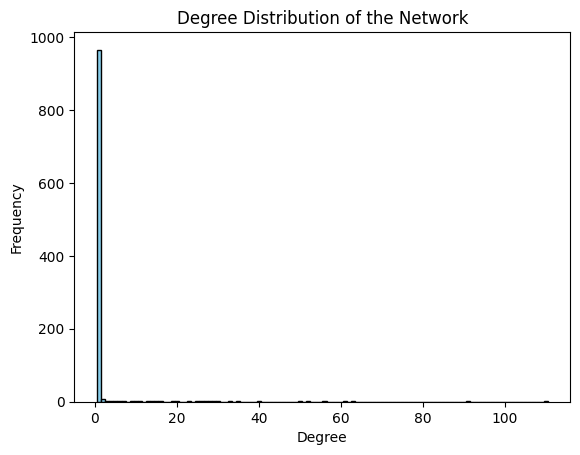

Graph with 1013 nodes and 1009 edges


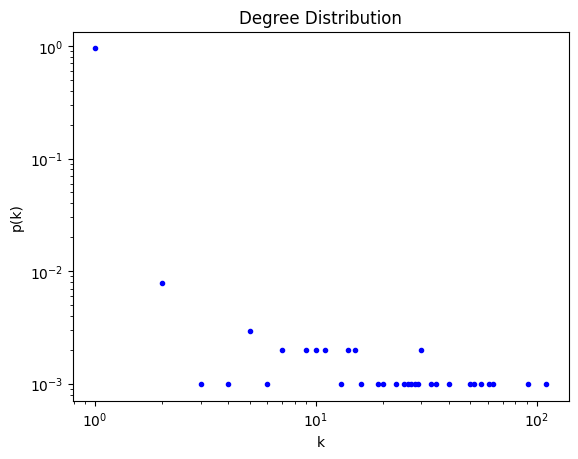

Maximum Degree: 110
Minimum Degree: 1
Average Degree: 1.9921026653504443
Standard Deviation of Degree Distribution: 6.749789717123986


In [13]:
# Assuming 'G1' is the network graph

# Plotting the Degree Distribution

plot_deg_dist_frequency(G1)
plot_deg_distribution(G1)

# Finding Max,Min and Avg Degree
maxi_degree = max_degree(G1)
mini_degree = min_degree(G1)
average_degree = avg_degree(G1)

# Determining Standard Deviation of Degree Distribution
std_dev_degree = std(G1)

print("Maximum Degree:", maxi_degree)
print("Minimum Degree:", mini_degree)
print("Average Degree:", average_degree)
print("Standard Deviation of Degree Distribution:",std_dev_degree)

Degree Centrality for G1

      Node ID  Degree Centrality
0         0.0           0.049407
1         1.0           0.062253
2         2.0           0.010870
3         3.0           0.012846
4         4.0           0.108696
...       ...                ...
1008   1005.0           0.000988
1009   1006.0           0.000988
1010   1007.0           0.000988
1011   1008.0           0.000988
1012   1009.0           0.000988

[1013 rows x 2 columns]
Node: 0 Degree Centrality : 0.04940711462450593
Node: 1 Degree Centrality : 0.062252964426877465
Node: 2 Degree Centrality : 0.010869565217391304
Node: 3 Degree Centrality : 0.01284584980237154
Node: 4 Degree Centrality : 0.10869565217391304
Node: 5 Degree Centrality : 0.018774703557312252
Node: 6 Degree Centrality : 0.028656126482213436
Node: 7 Degree Centrality : 0.05138339920948616
Node: 8 Degree Centrality : 0.01976284584980237
Node: 9 Degree Centrality : 0.03260869565217391
Node: 10 Degree Centrality : 0.03952569169960474
Node: 11 Degree Centrality : 0.029644268774703

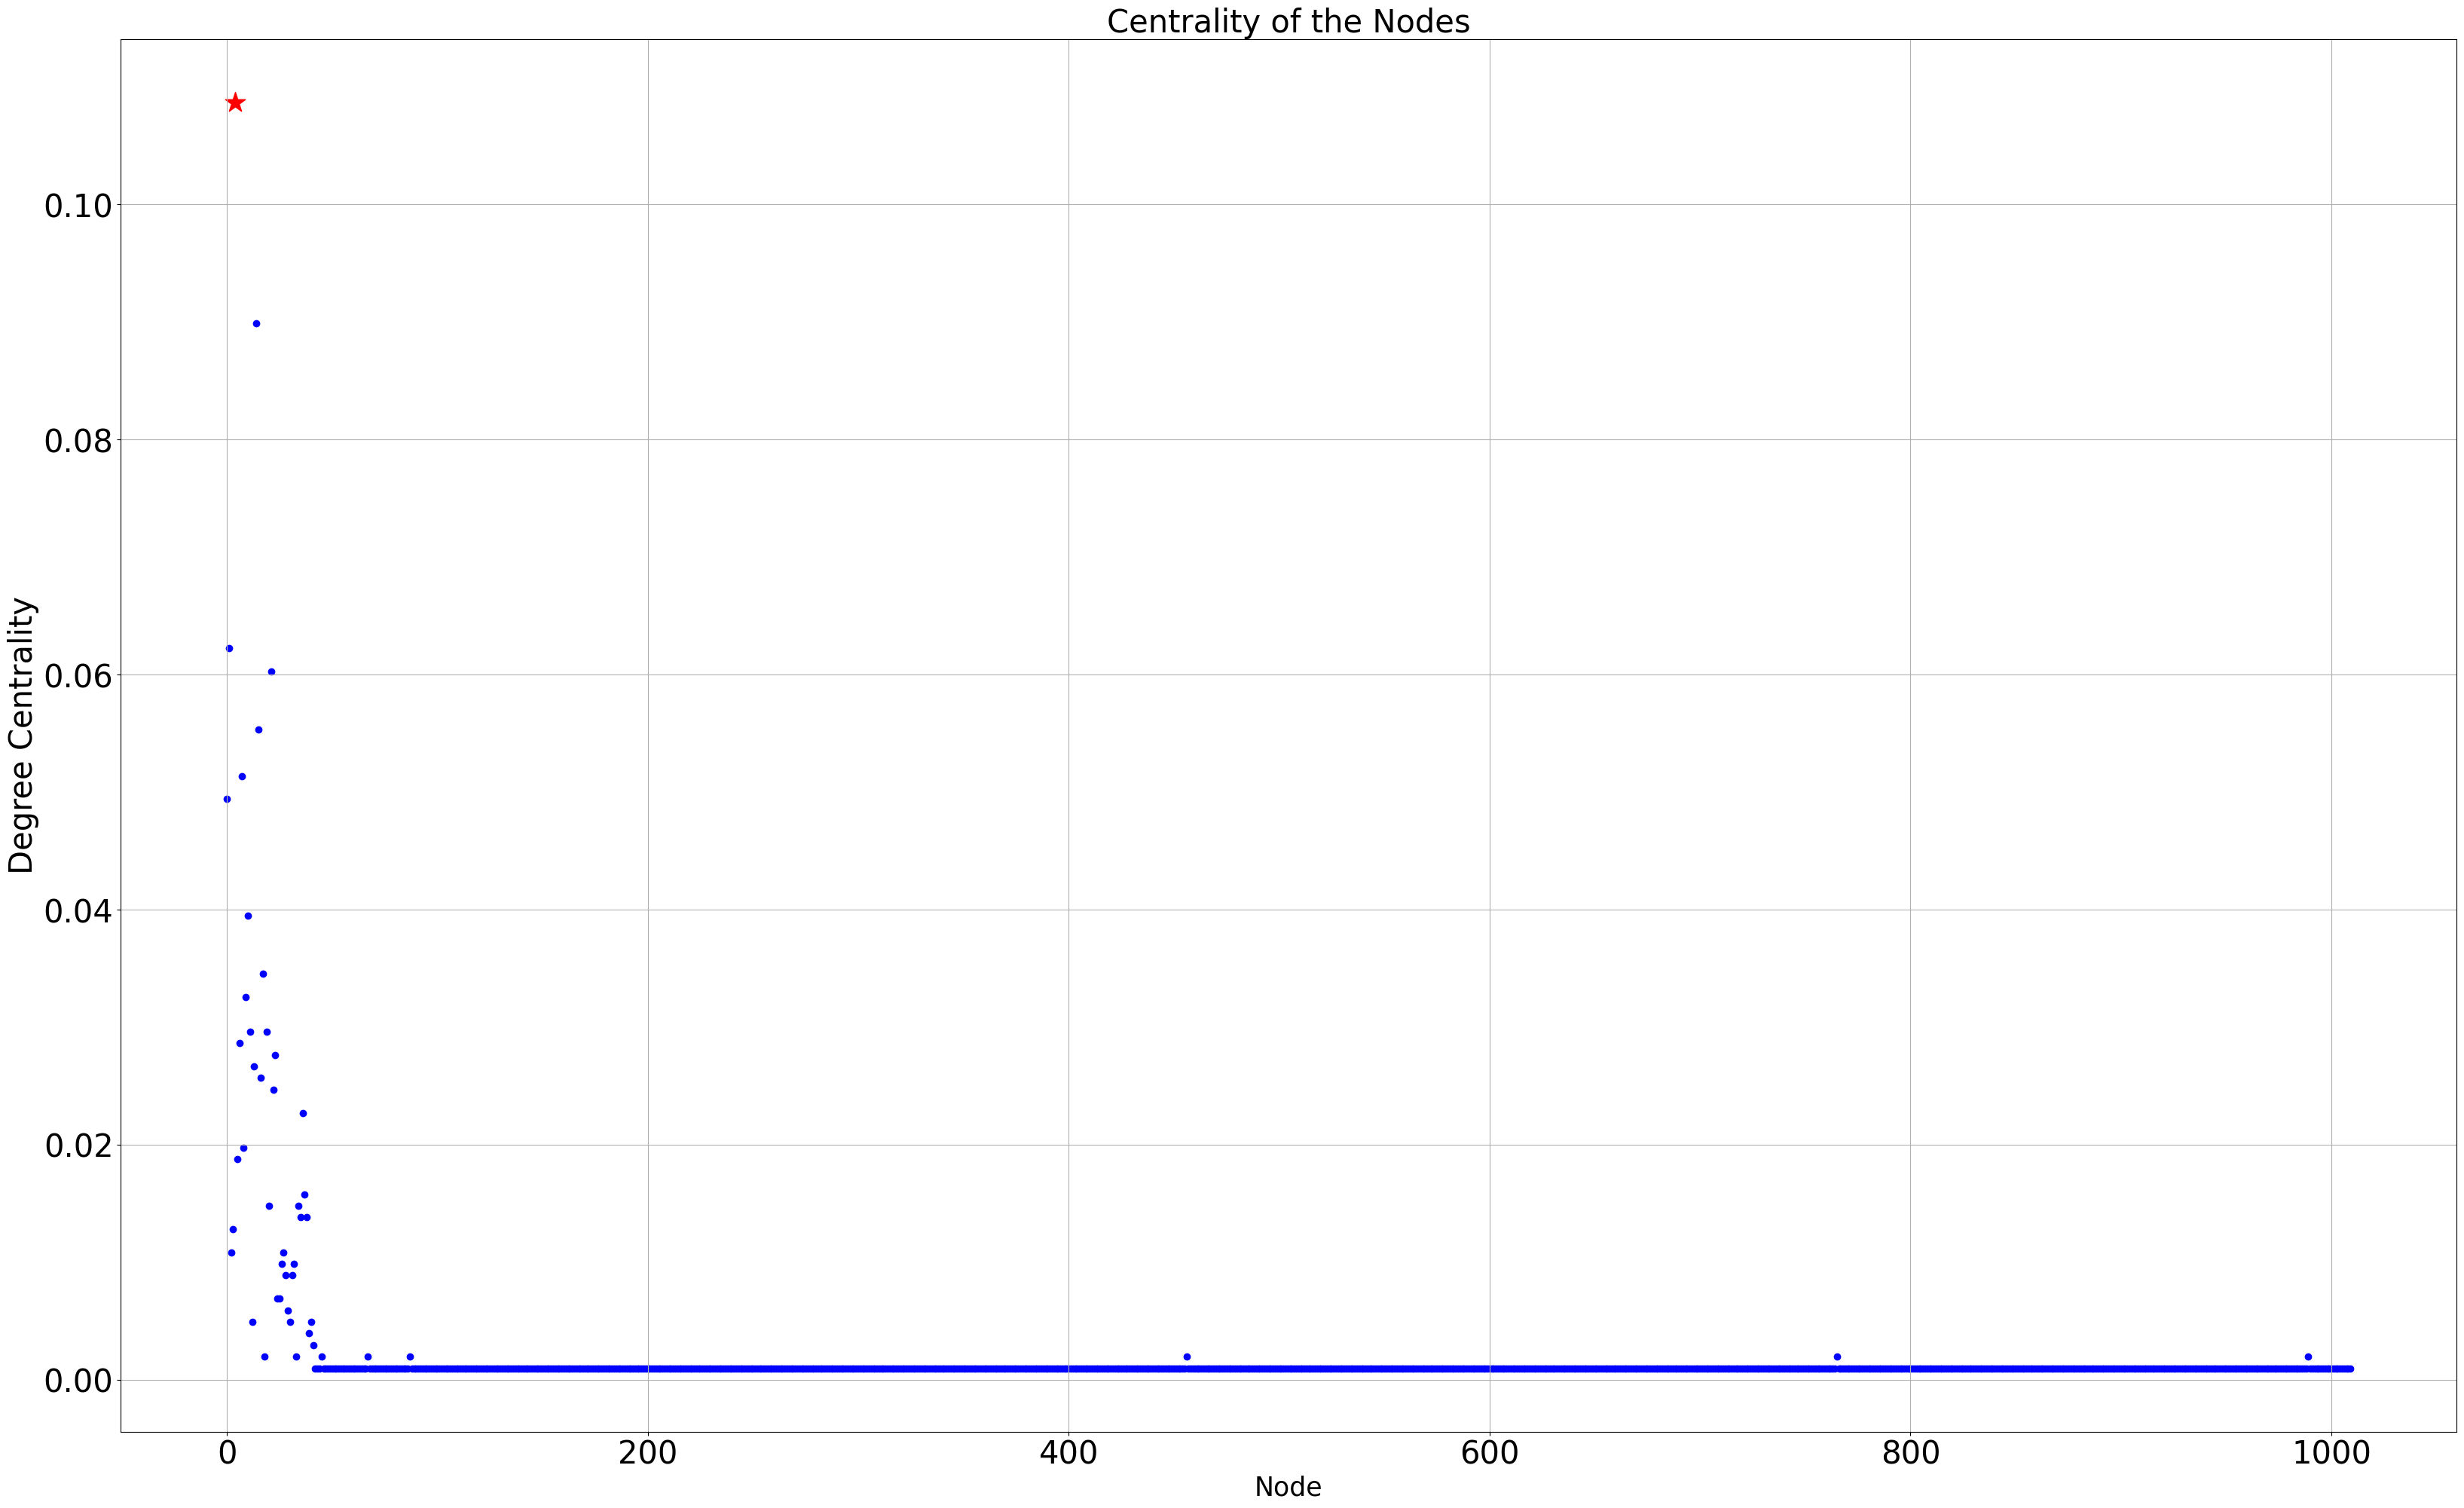

   Node ID  Degree Centrality
0      4.0           0.108696
1     14.0           0.089921
2      1.0           0.062253
3     21.0           0.060277
4     15.0           0.055336
5      7.0           0.051383
6      0.0           0.049407
7     10.0           0.039526
8     17.0           0.034585
9      9.0           0.032609


In [14]:
d1 = nx.degree_centrality(G1)
#d1= {node: d1[node] for node in range(1, 1001)}
centrality_value(d1,0)
visualize_centrality(d1,0)
top10_centrality(d1,0)

EigenVector Centrality for G1

      Node ID  Eigenvector Centrality
0         0.0            6.104005e-07
1         1.0            1.350153e-06
2         2.0            8.636169e-04
3         3.0            8.804115e-04
4         4.0            6.409872e-01
...       ...                     ...
1008   1005.0            5.954360e-09
1009   1006.0            4.269895e-09
1010   1007.0            2.854808e-03
1011   1008.0            7.420914e-05
1012   1009.0            3.190935e-04

[1013 rows x 2 columns]
Node: 0 Eigenvector Centrality : 6.104005211220006e-07
Node: 1 Eigenvector Centrality : 1.3501530795008122e-06
Node: 2 Eigenvector Centrality : 0.0008636169268498806
Node: 3 Eigenvector Centrality : 0.0008804114788936913
Node: 4 Eigenvector Centrality : 0.6409872112775072
Node: 5 Eigenvector Centrality : 2.7850004914883635e-13
Node: 6 Eigenvector Centrality : 5.329247673219116e-13
Node: 7 Eigenvector Centrality : 0.05455034334875366
Node: 8 Eigenvector Centrality : 0.036352392185650645
Node: 9 Eigenvector Centrali

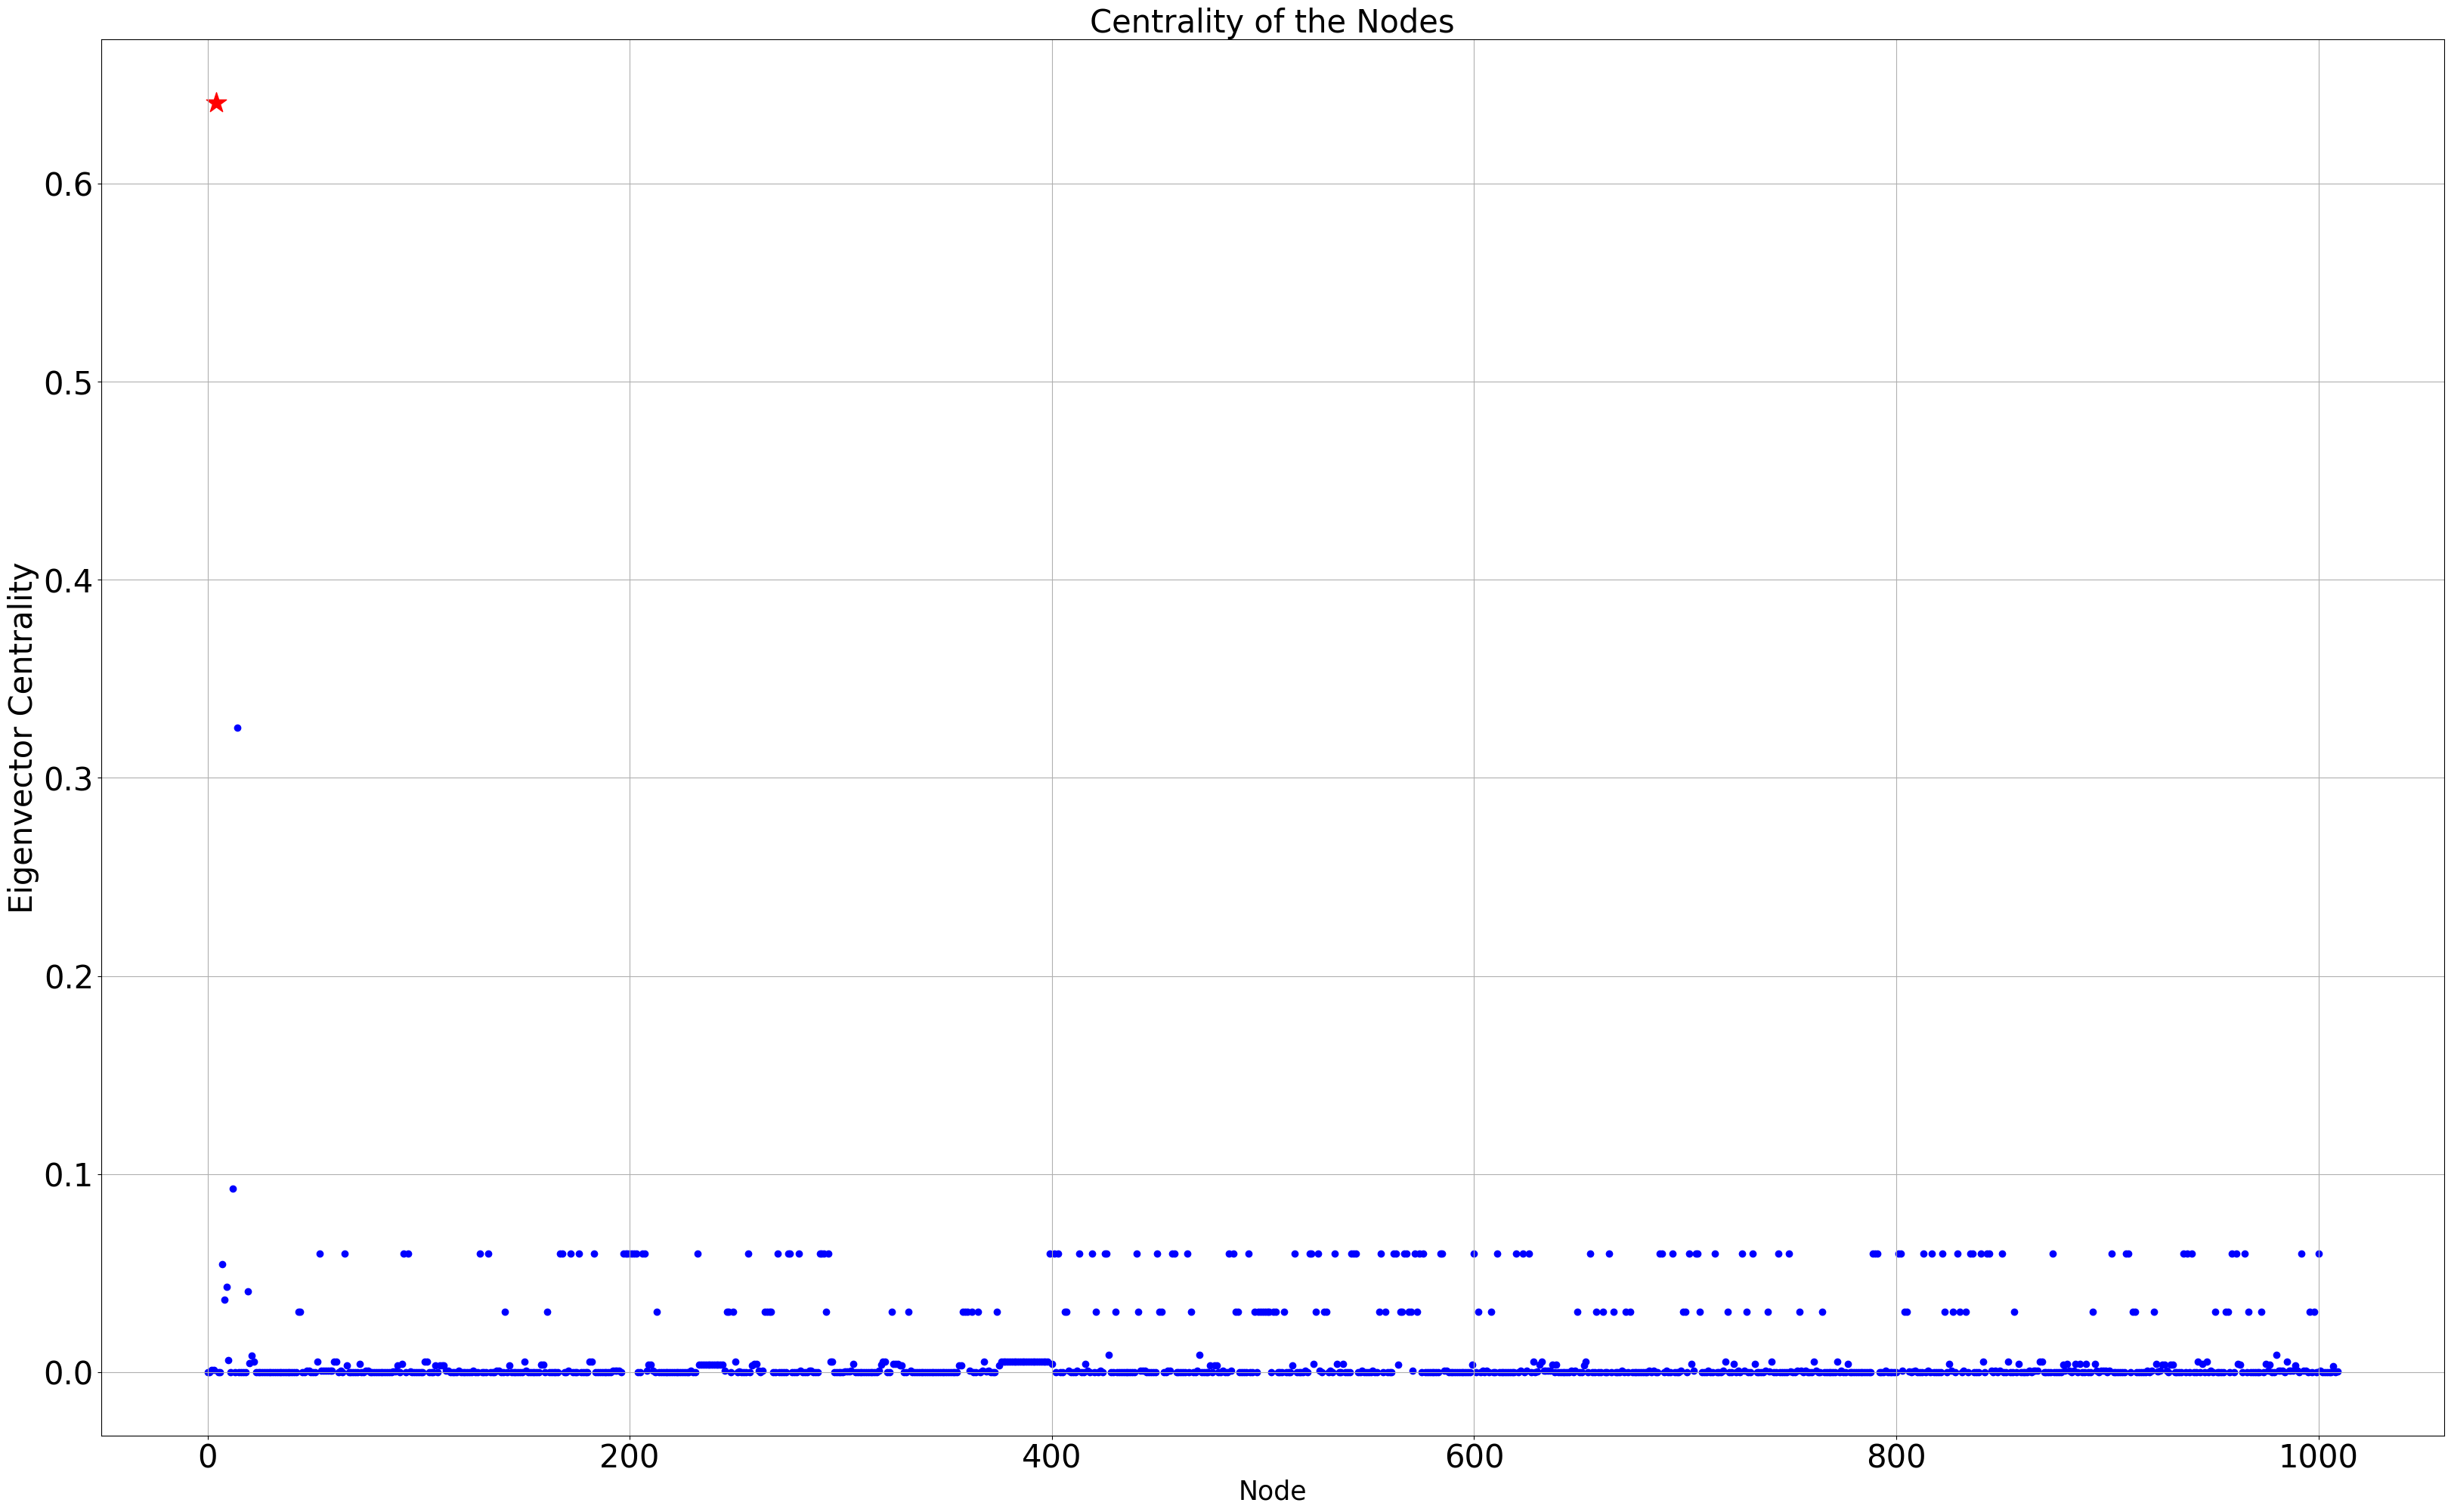

   Node ID  Eigenvector Centrality
0      4.0                0.640987
1     14.0                0.325260
2     12.0                0.092527
3     53.0                0.059773
4     65.0                0.059773
5     93.0                0.059773
6     95.0                0.059773
7    129.0                0.059773
8    133.0                0.059773
9    167.0                0.059773


In [15]:
e1 = nx.eigenvector_centrality(G1)
#e1= {node: e1[node] for node in range(1, 1001)}
centrality_value(e1,1)
visualize_centrality(e1,1)
top10_centrality(e1,1)

Katz Centrality for G1

      Node ID     Katz Centrality
0         0.0  0.000006+0.000000j
1         1.0  0.000006+0.000000j
2         2.0  0.000862+0.000000j
3         3.0  0.000879+0.000000j
4         4.0  0.641184+0.000000j
...       ...                 ...
1008   1005.0  0.000001+0.000000j
1009   1006.0  0.000004+0.000000j
1010   1007.0  0.002846+0.000000j
1011   1008.0  0.000076+0.000000j
1012   1009.0  0.000317+0.000000j

[1013 rows x 2 columns]
Node: 0 Katz Centrality : (6.196320498563737e-06+0j)
Node: 1 Katz Centrality : (5.987080802460343e-06+0j)
Node: 2 Katz Centrality : (0.0008621533586074667+0j)
Node: 3 Katz Centrality : (0.0008785742907359556+0j)
Node: 4 Katz Centrality : (0.6411838956798911+0j)
Node: 5 Katz Centrality : (2.3514707508539978e-07+0j)
Node: 6 Katz Centrality : (-4.238803118280631e-06+0j)
Node: 7 Katz Centrality : (0.054465740579562744+0j)
Node: 8 Katz Centrality : (0.0362987226071509+0j)
Node: 9 Katz Centrality : (0.043035365090668985+0j)
Node: 10 Katz Centrality : (0.0060889285042

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


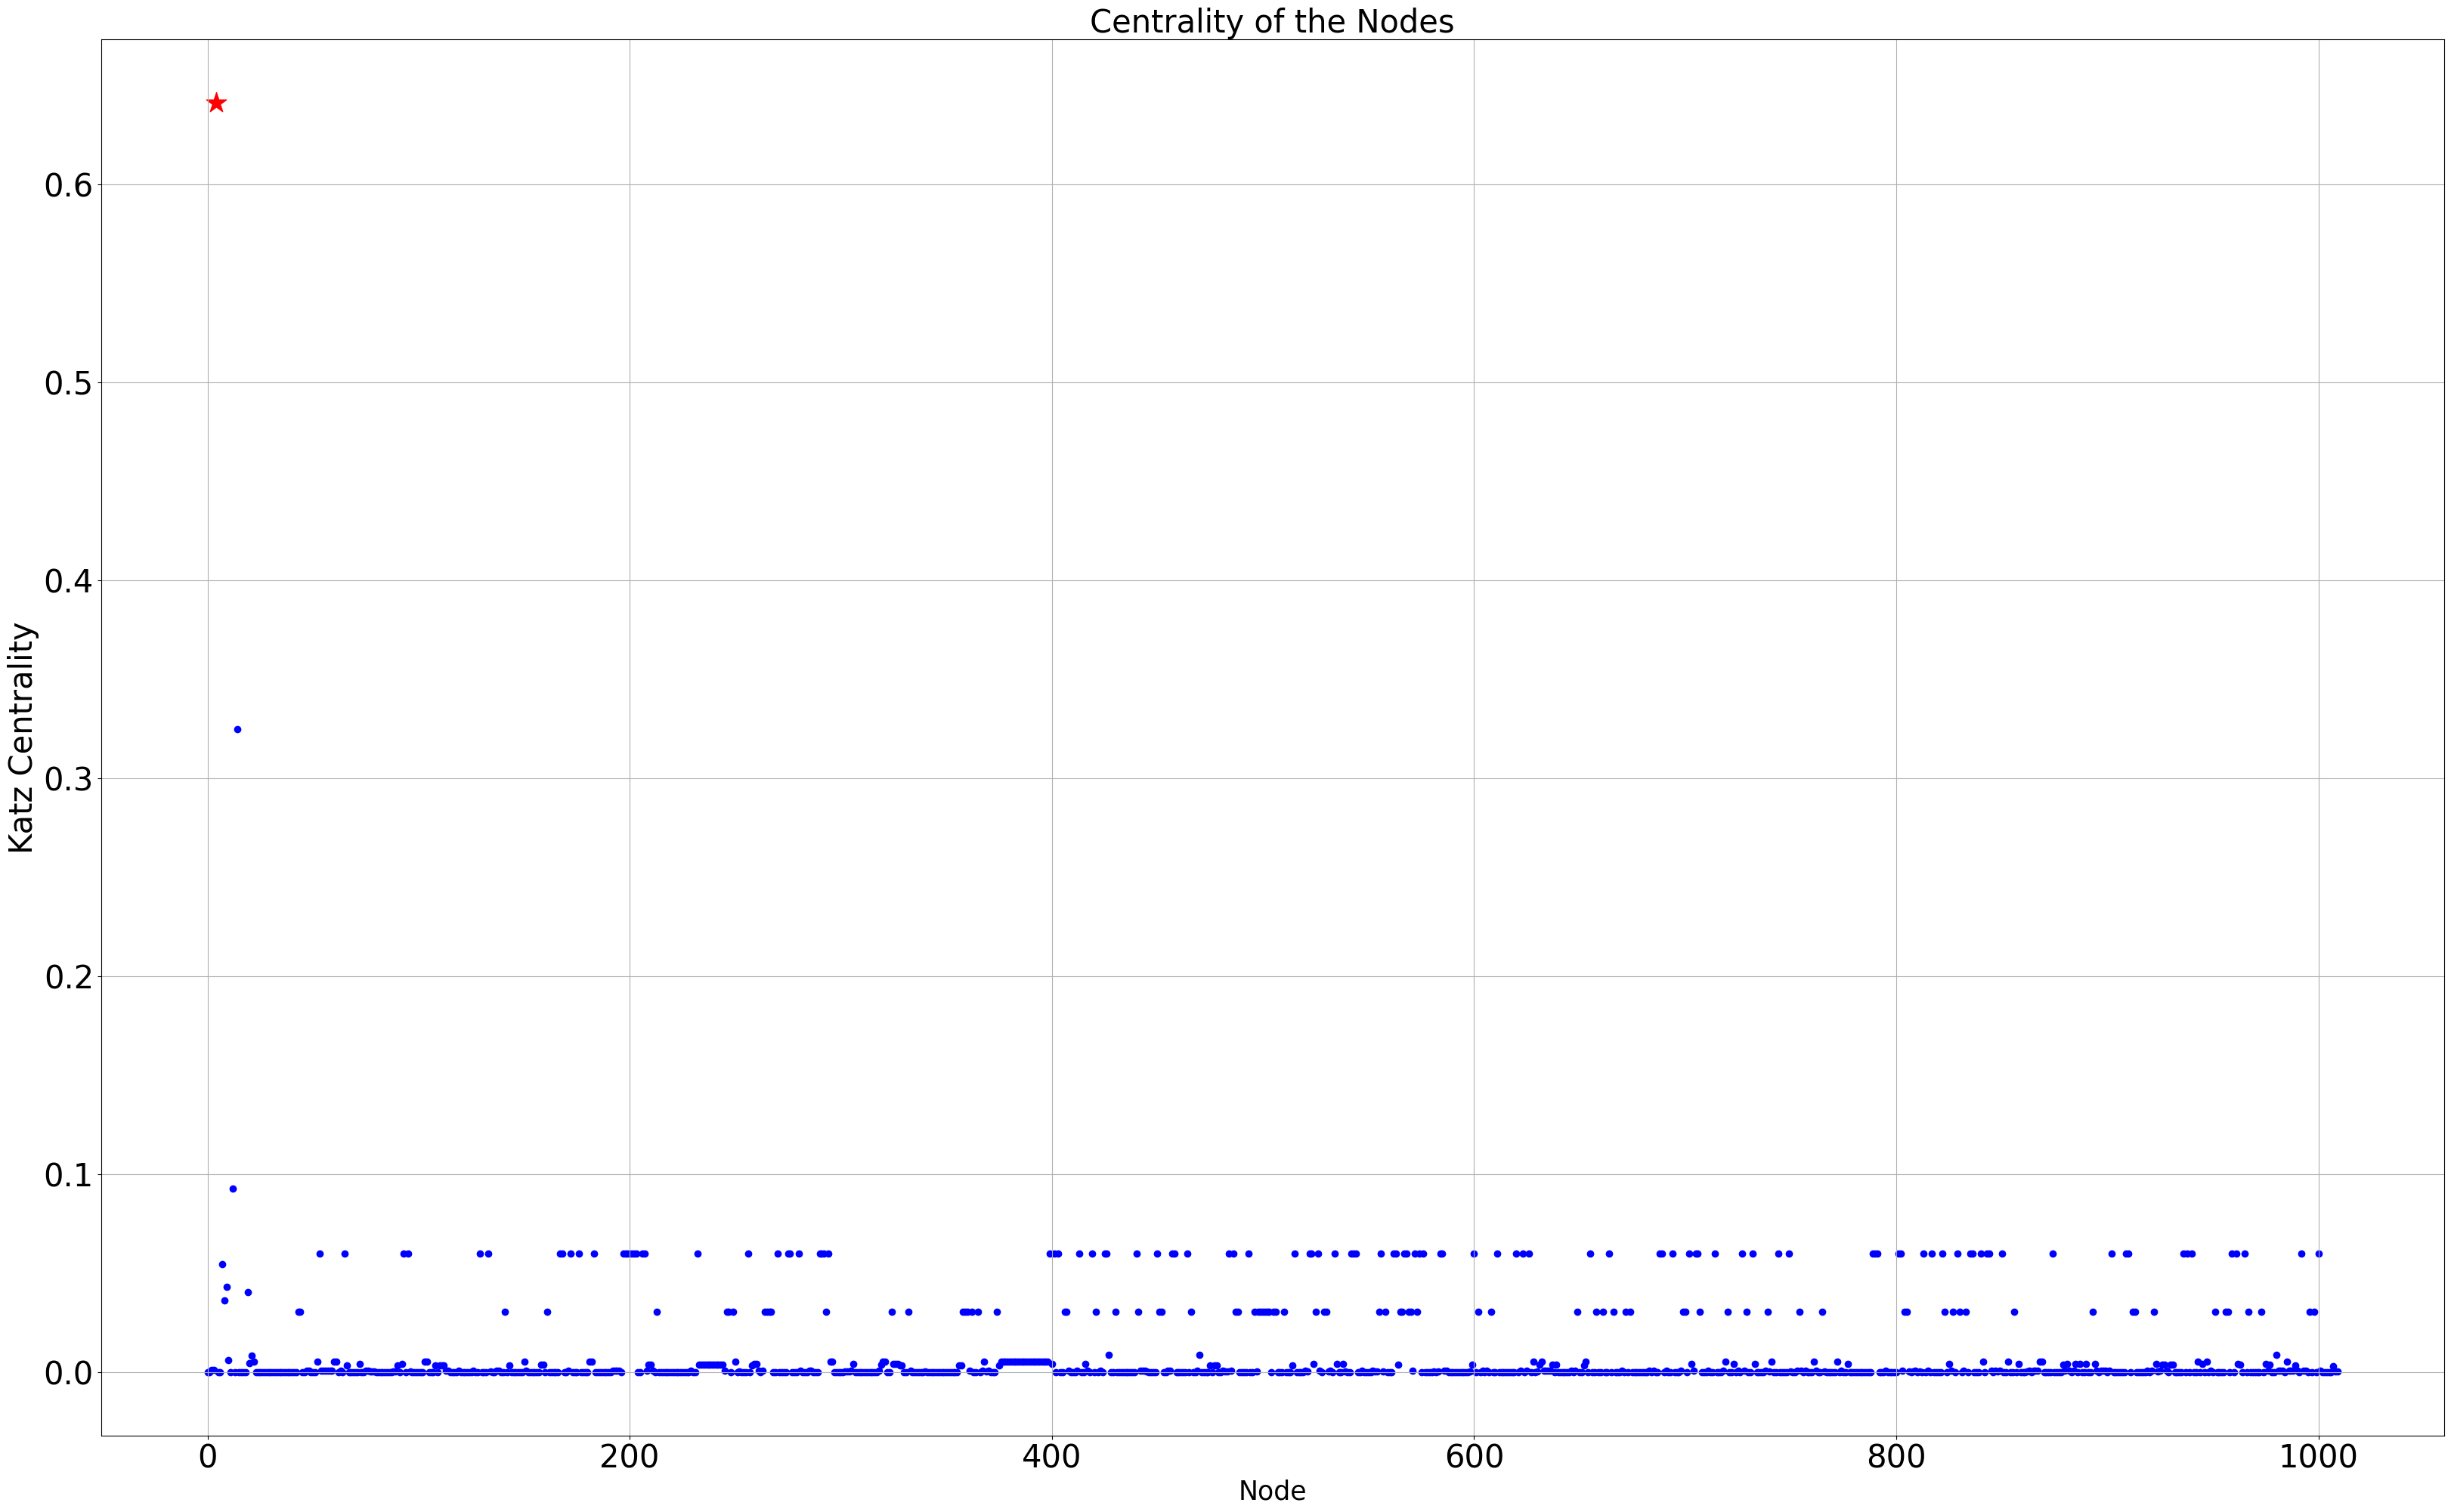

   Node ID     Katz Centrality
0      4.0  0.641184+0.000000j
1     14.0  0.324841+0.000000j
2     12.0  0.092502+0.000000j
3   1000.0  0.059796+0.000000j
4    167.0  0.059796+0.000000j
5    464.0  0.059796+0.000000j
6    399.0  0.059796+0.000000j
7    694.0  0.059796+0.000000j
8    801.0  0.059796+0.000000j
9    556.0  0.059796+0.000000j


In [16]:
from scipy.sparse.linalg import eigs

# Convert the graph to a NumPy matrix with float data type
A = nx.to_numpy_array(G1, dtype=float)

try:
    # Compute the largest eigenvector using power iteration method
    eigenvalues, eigenvectors = eigs(A, k=1, which='LR', maxiter=2000, tol=1e-4)

    # Extract the largest eigenvector
    largest_eigenvector = np.squeeze(np.asarray(eigenvectors))

    # Normalize the largest eigenvector to obtain Katz centrality
    katz_centrality = largest_eigenvector / np.linalg.norm(largest_eigenvector)

    # Convert the result to a dictionary format
    katz_centrality = {node: katz_centrality[i] for i, node in enumerate(G1.nodes())}

    # Print or use the Katz centrality dictionary
    centrality_value(katz_centrality, 3)
    visualize_centrality(katz_centrality, 3)
    top10_centrality(katz_centrality, 3)

except Exception as e:
    print("Error:", e)

Page Rank Centrality for G1

      Node ID  Pagerank
0         0.0  0.022941
1         1.0  0.028572
2         2.0  0.005218
3         3.0  0.006131
4         4.0  0.049874
...       ...       ...
1008   1005.0  0.000587
1009   1006.0  0.000589
1010   1007.0  0.000582
1011   1008.0  0.000585
1012   1009.0  0.000592

[1013 rows x 2 columns]
Node: 0 Pagerank : 0.02294135129071381
Node: 1 Pagerank : 0.028572187370354957
Node: 2 Pagerank : 0.005217541518594019
Node: 3 Pagerank : 0.006131415943227822
Node: 4 Pagerank : 0.049873970884743074
Node: 5 Pagerank : 0.008730535558697182
Node: 6 Pagerank : 0.013352347114747247
Node: 7 Pagerank : 0.023819914177812505
Node: 8 Pagerank : 0.009249338973731445
Node: 9 Pagerank : 0.014515463887559175
Node: 10 Pagerank : 0.018360470340139646
Node: 11 Pagerank : 0.01222451883924053
Node: 12 Pagerank : 0.0022767940207985486
Node: 13 Pagerank : 0.012491044768839296
Node: 14 Pagerank : 0.04045630406697976
Node: 15 Pagerank : 0.02560616556856046
Node: 16 Pagerank : 0.012003271177285684
Nod

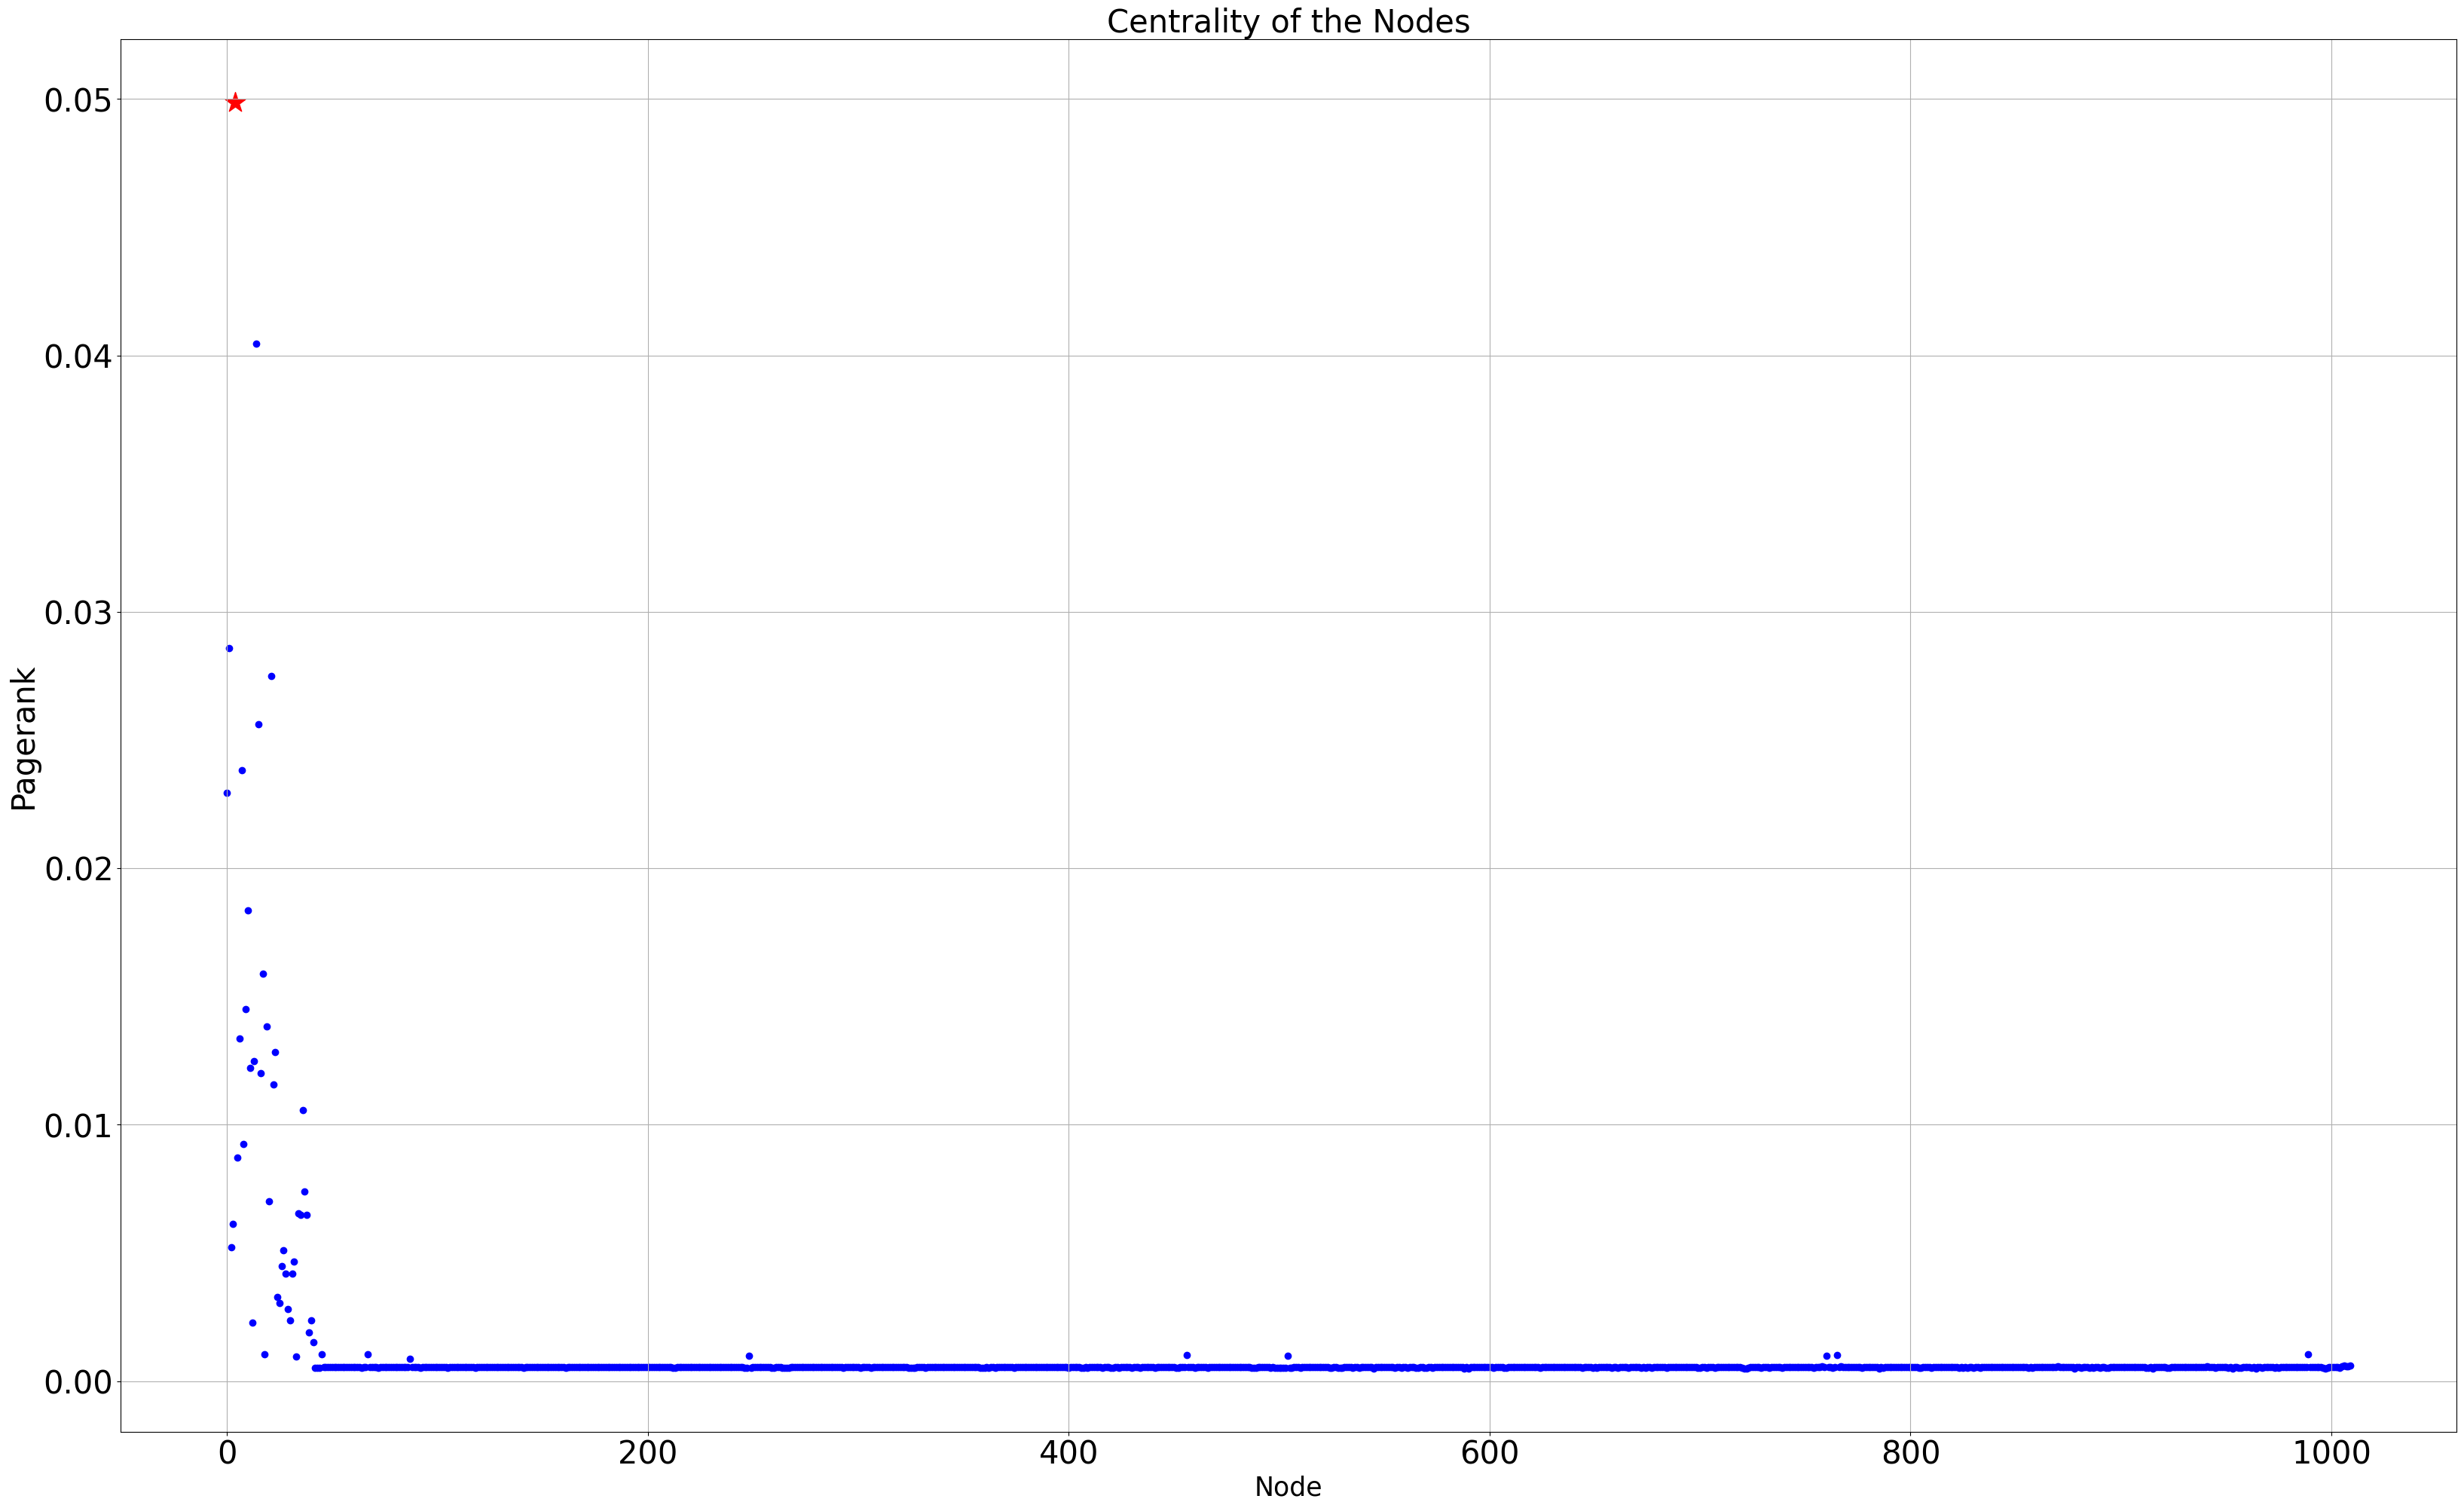

   Node ID  Pagerank
0      4.0  0.049874
1     14.0  0.040456
2      1.0  0.028572
3     21.0  0.027498
4     15.0  0.025606
5      7.0  0.023820
6      0.0  0.022941
7     10.0  0.018360
8     17.0  0.015879
9      9.0  0.014515


In [17]:
# Try to calculate the PageRank centrality for the graph G1.
# Handle the case where power iteration fails to converge.
try:
    p1 = nx.pagerank(G1)
except nx.PowerIterationFailedConvergence as e:
    print("Power iteration failed to converge:", e)
centrality_value(p1,2)
visualize_centrality(p1,2)
top10_centrality(p1,2)

Closeness Centrality for G1

     Node ID  Closeness Centrality
0          1              0.102041
1          2              0.121363
2          3              0.121607
3          4              0.178423
4          5              0.080563
..       ...                   ...
995      996              0.153532
996      997              0.093322
997      998              0.153532
998      999              0.057274
999     1000              0.130805

[1000 rows x 2 columns]
Node: 0 Closeness Centrality : Node not found
Node: 1 Closeness Centrality : 0.1020410164870193
Node: 2 Closeness Centrality : 0.12136319058515854
Node: 3 Closeness Centrality : 0.12160701417247177
Node: 4 Closeness Centrality : 0.17842267149402455
Node: 5 Closeness Centrality : 0.0805626089034998
Node: 6 Closeness Centrality : 0.08170838823012737
Node: 7 Closeness Centrality : 0.16414885777450258
Node: 8 Closeness Centrality : 0.15752736839127607
Node: 9 Closeness Centrality : 0.20295018040016036
Node: 10 Closeness Centrality : 0.15047828789148002


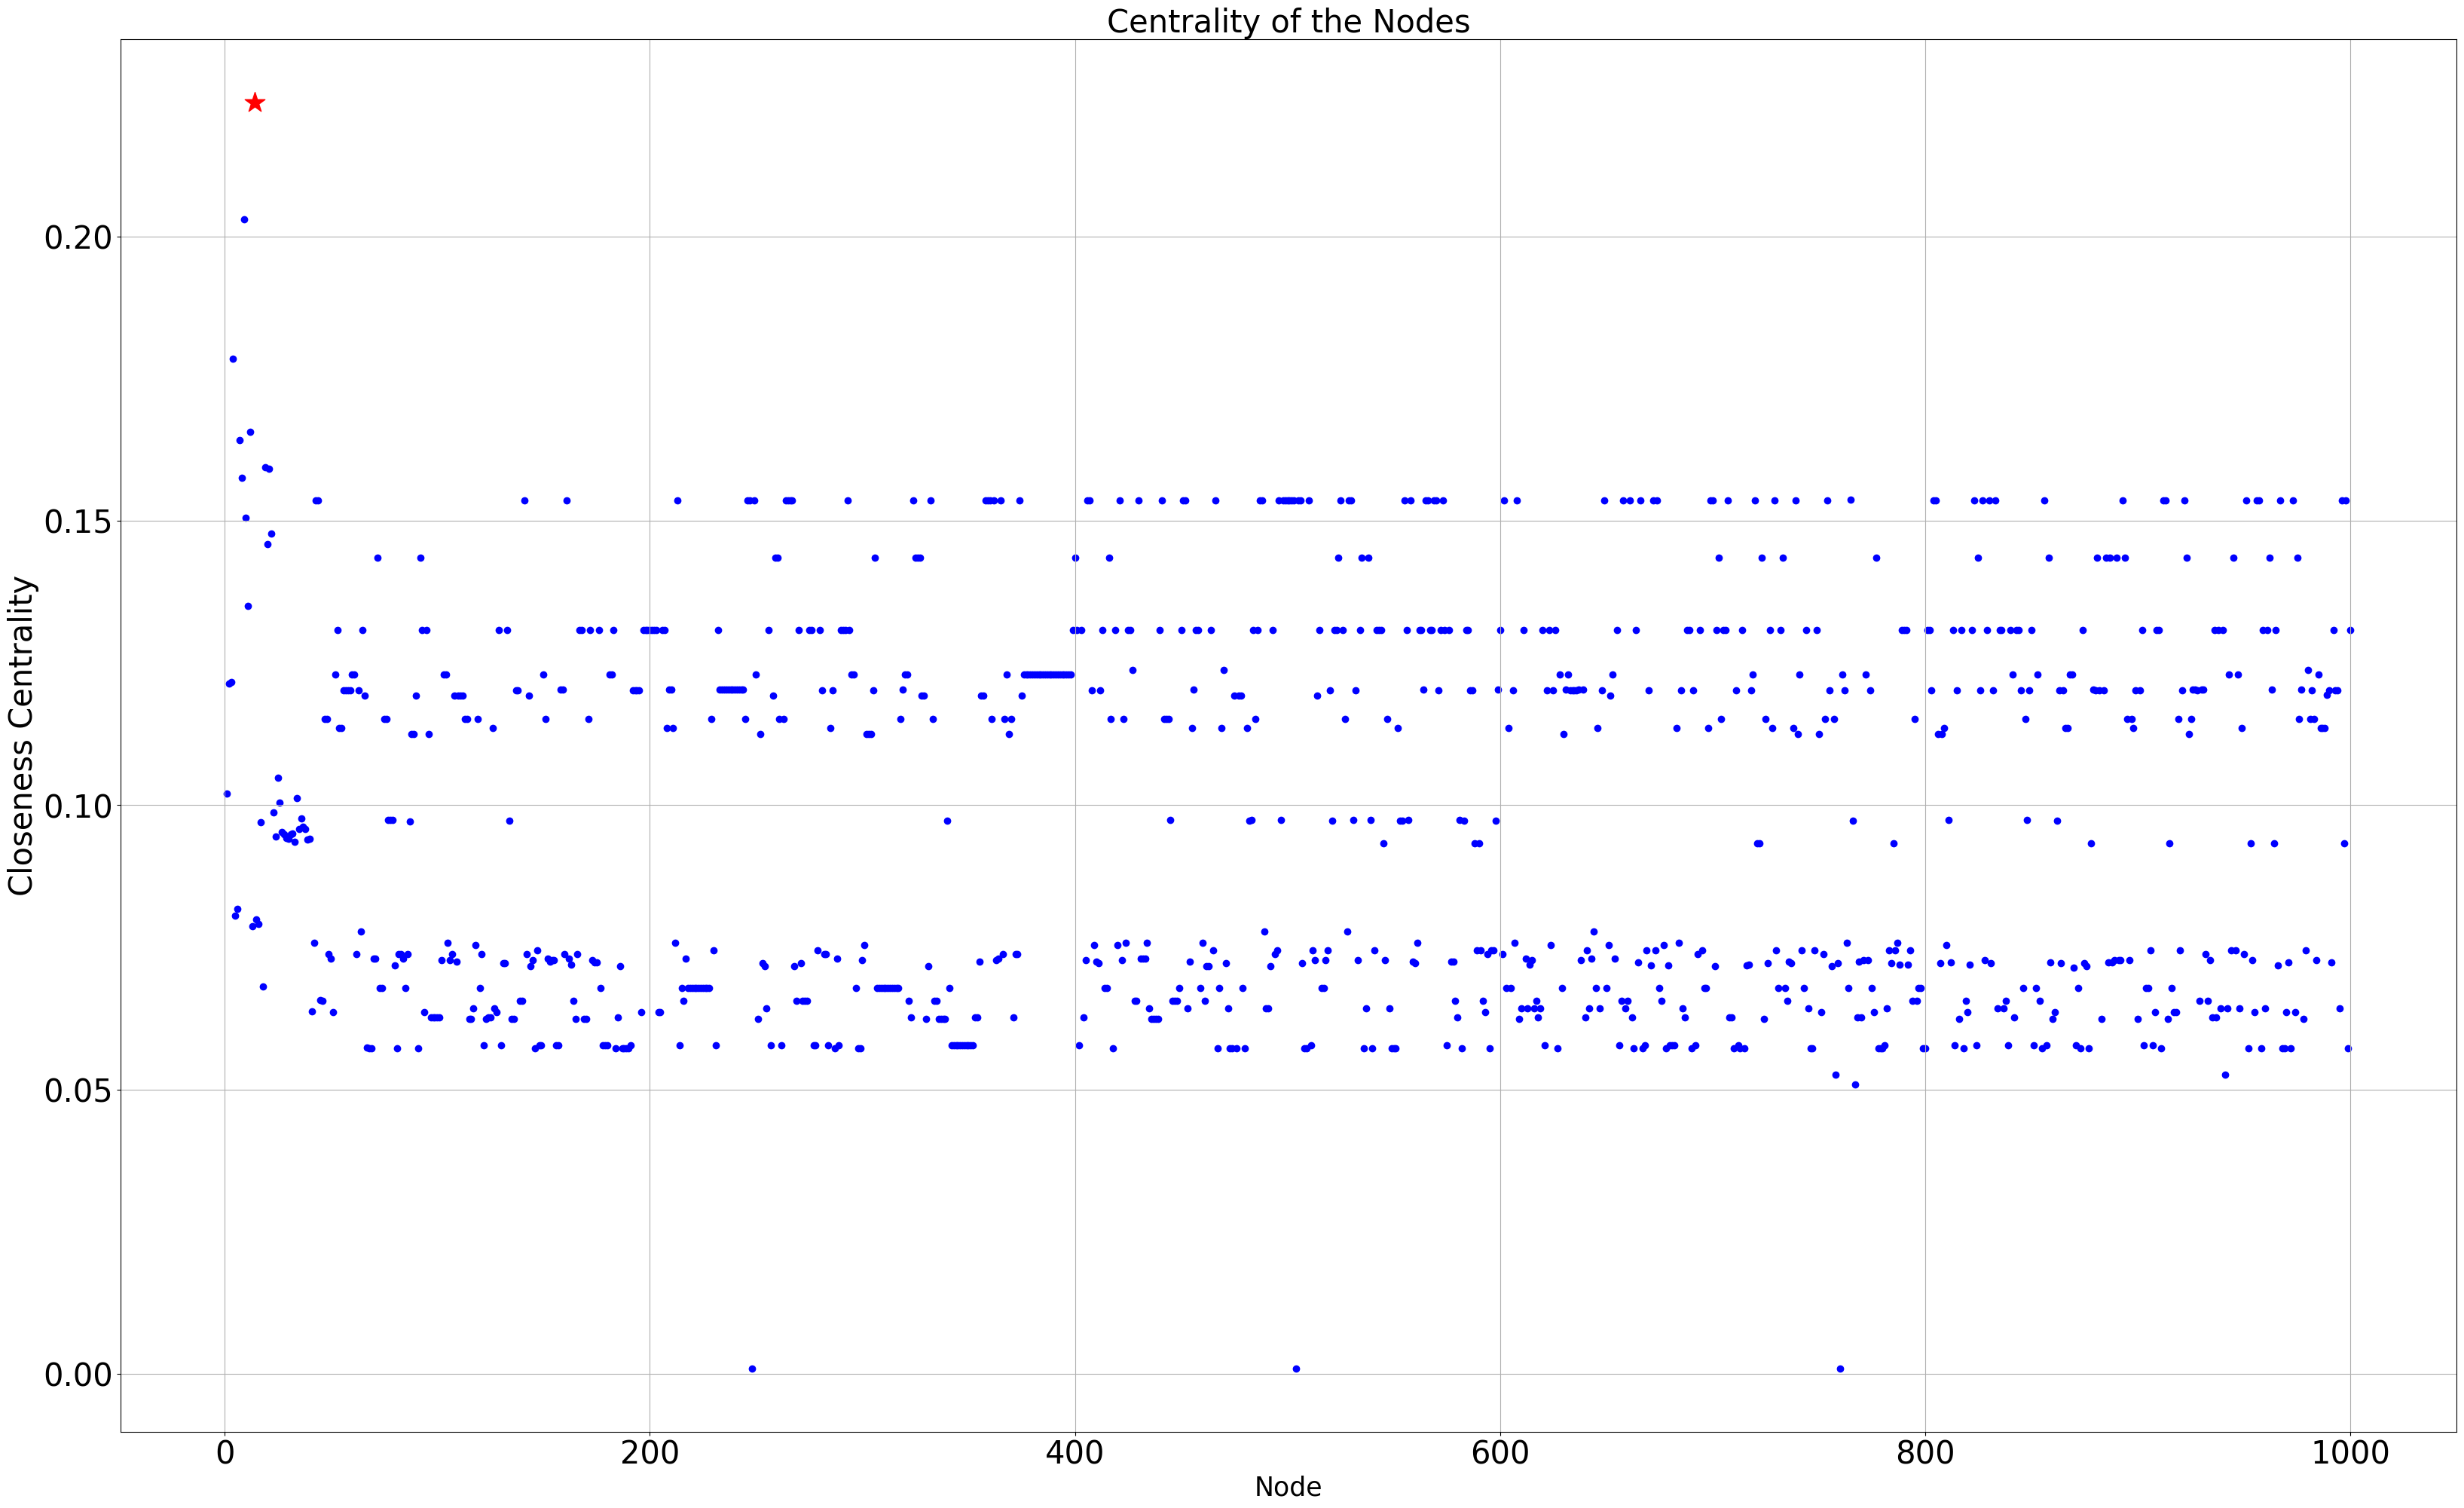

   Node ID  Closeness Centrality
0       14              0.223564
1        9              0.202950
2        4              0.178423
3       12              0.165608
4        7              0.164149
5       19              0.159394
6       21              0.159184
7        8              0.157527
8      765              0.153727
9       43              0.153532


In [18]:
# Calculate closeness centrality for each node from 1 to 1000
c1 = {}
for node in range(1, 1001):
    c1[node] = nx.closeness_centrality(G1, u=node)
centrality_value(c1,4)
visualize_centrality(c1,4)
top10_centrality(c1,4)

Betweeness Centrality for G1

      Node ID  Betweenness Centrality
0         0.0                0.017145
1         1.0                0.029896
2         2.0                0.009569
3         3.0                0.011459
4         4.0                0.092997
...       ...                     ...
1008   1005.0                0.000000
1009   1006.0                0.000000
1010   1007.0                0.000000
1011   1008.0                0.000000
1012   1009.0                0.000000

[1013 rows x 2 columns]
Node: 0 Betweenness Centrality : 0.017145392774343876
Node: 1 Betweenness Centrality : 0.029896435650531895
Node: 2 Betweenness Centrality : 0.009568657807594718
Node: 3 Betweenness Centrality : 0.011458931985315677
Node: 4 Betweenness Centrality : 0.09299679806711157
Node: 5 Betweenness Centrality : 0.011507801534894812
Node: 6 Betweenness Centrality : 0.015900196651067504
Node: 7 Betweenness Centrality : 0.04675643025533362
Node: 8 Betweenness Centrality : 0.01893988263488973
Node: 9 Betweenness Centrality : 0.1

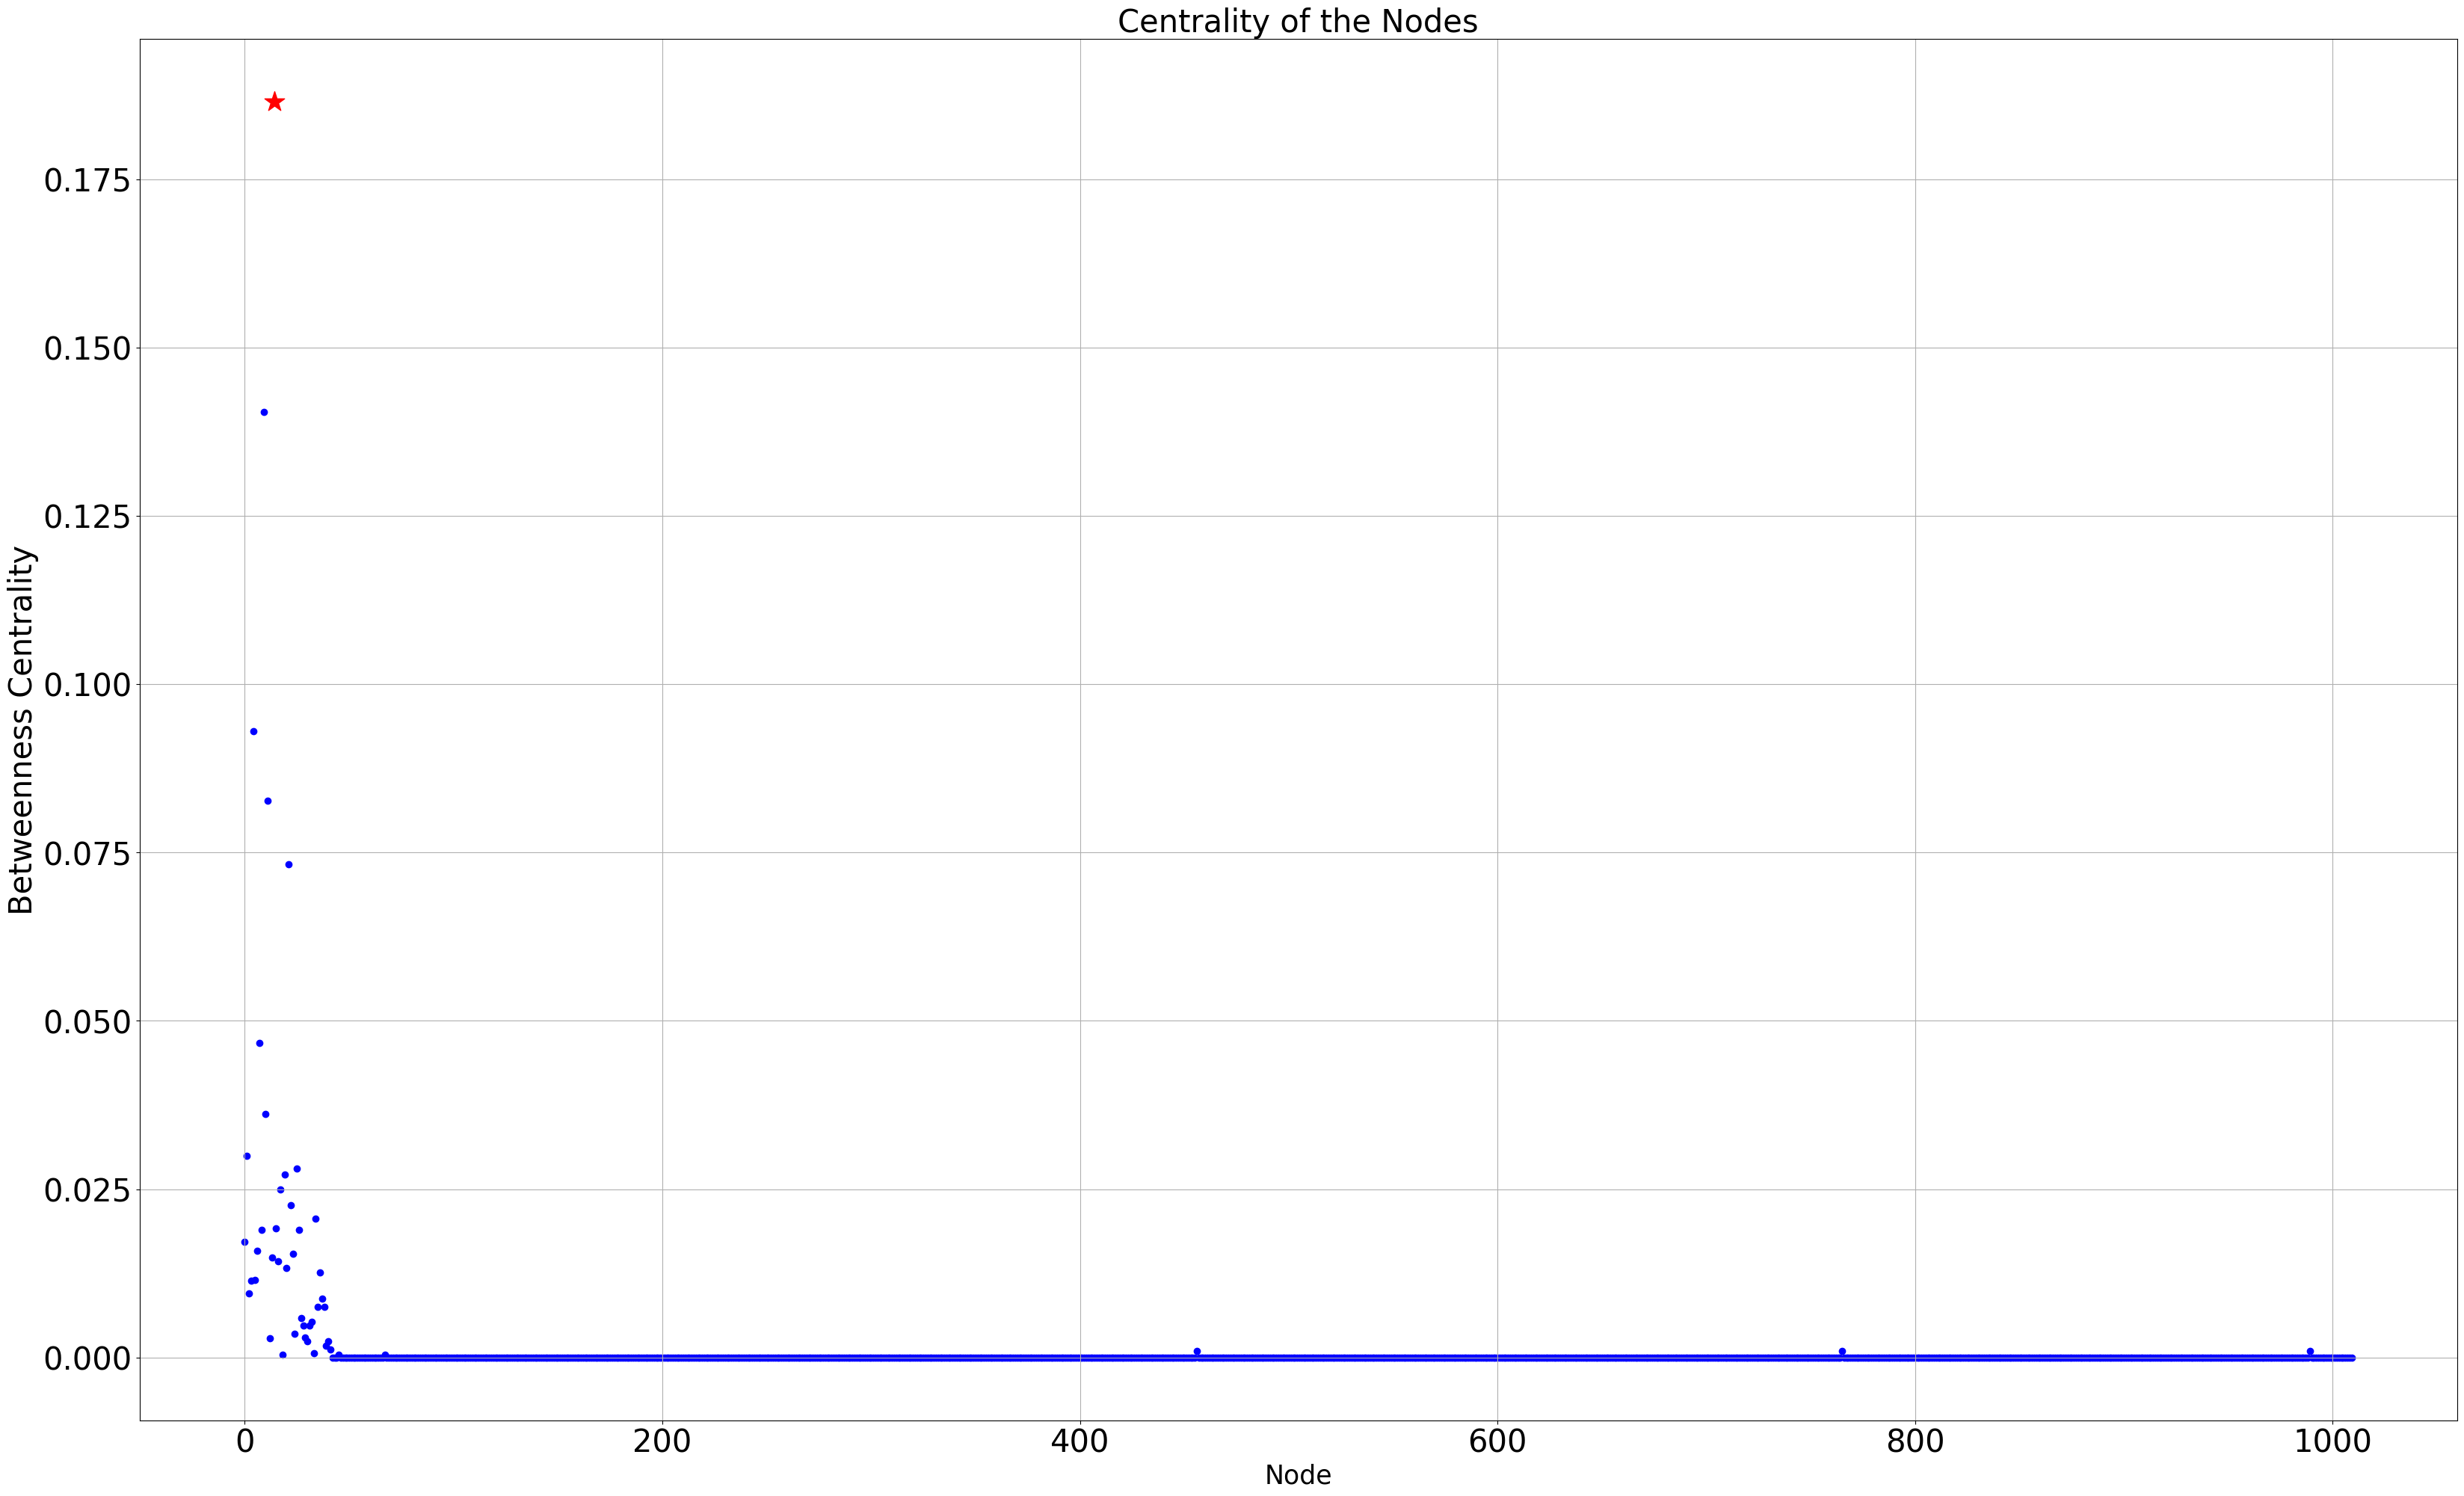

   Node ID  Betweenness Centrality
0     14.0                0.186559
1      9.0                0.140433
2      4.0                0.092997
3     11.0                0.082681
4     21.0                0.073236
5      7.0                0.046756
6     10.0                0.036212
7      1.0                0.029896
8     25.0                0.028088
9     19.0                0.027211


In [19]:
# Try to calculate the betweenness centrality for the graph G1.
# Handle the case where power iteration fails to converge.
try:
    b1 = nx.betweenness_centrality(G1)
except nx.PowerIterationFailedConvergence as e:
    print("Power iteration failed to converge:", e)
centrality_value(b1,5)
visualize_centrality(b1,5)
top10_centrality(b1,5)

      Node ID  Betweenness Centrality
0         0.0                0.017145
1         1.0                0.029896
2         2.0                0.009569
3         3.0                0.011459
4         4.0                0.092997
...       ...                     ...
1008   1005.0                0.000000
1009   1006.0                0.000000
1010   1007.0                0.000000
1011   1008.0                0.000000
1012   1009.0                0.000000

[1013 rows x 2 columns]
Node: 0 Betweenness Centrality : 0.017145392774343876
Node: 1 Betweenness Centrality : 0.029896435650531895
Node: 2 Betweenness Centrality : 0.009568657807594718
Node: 3 Betweenness Centrality : 0.011458931985315677
Node: 4 Betweenness Centrality : 0.09299679806711157
Node: 5 Betweenness Centrality : 0.011507801534894812
Node: 6 Betweenness Centrality : 0.015900196651067504
Node: 7 Betweenness Centrality : 0.04675643025533362
Node: 8 Betweenness Centrality : 0.01893988263488973
Node: 9 Betweenness Centrality : 0.1

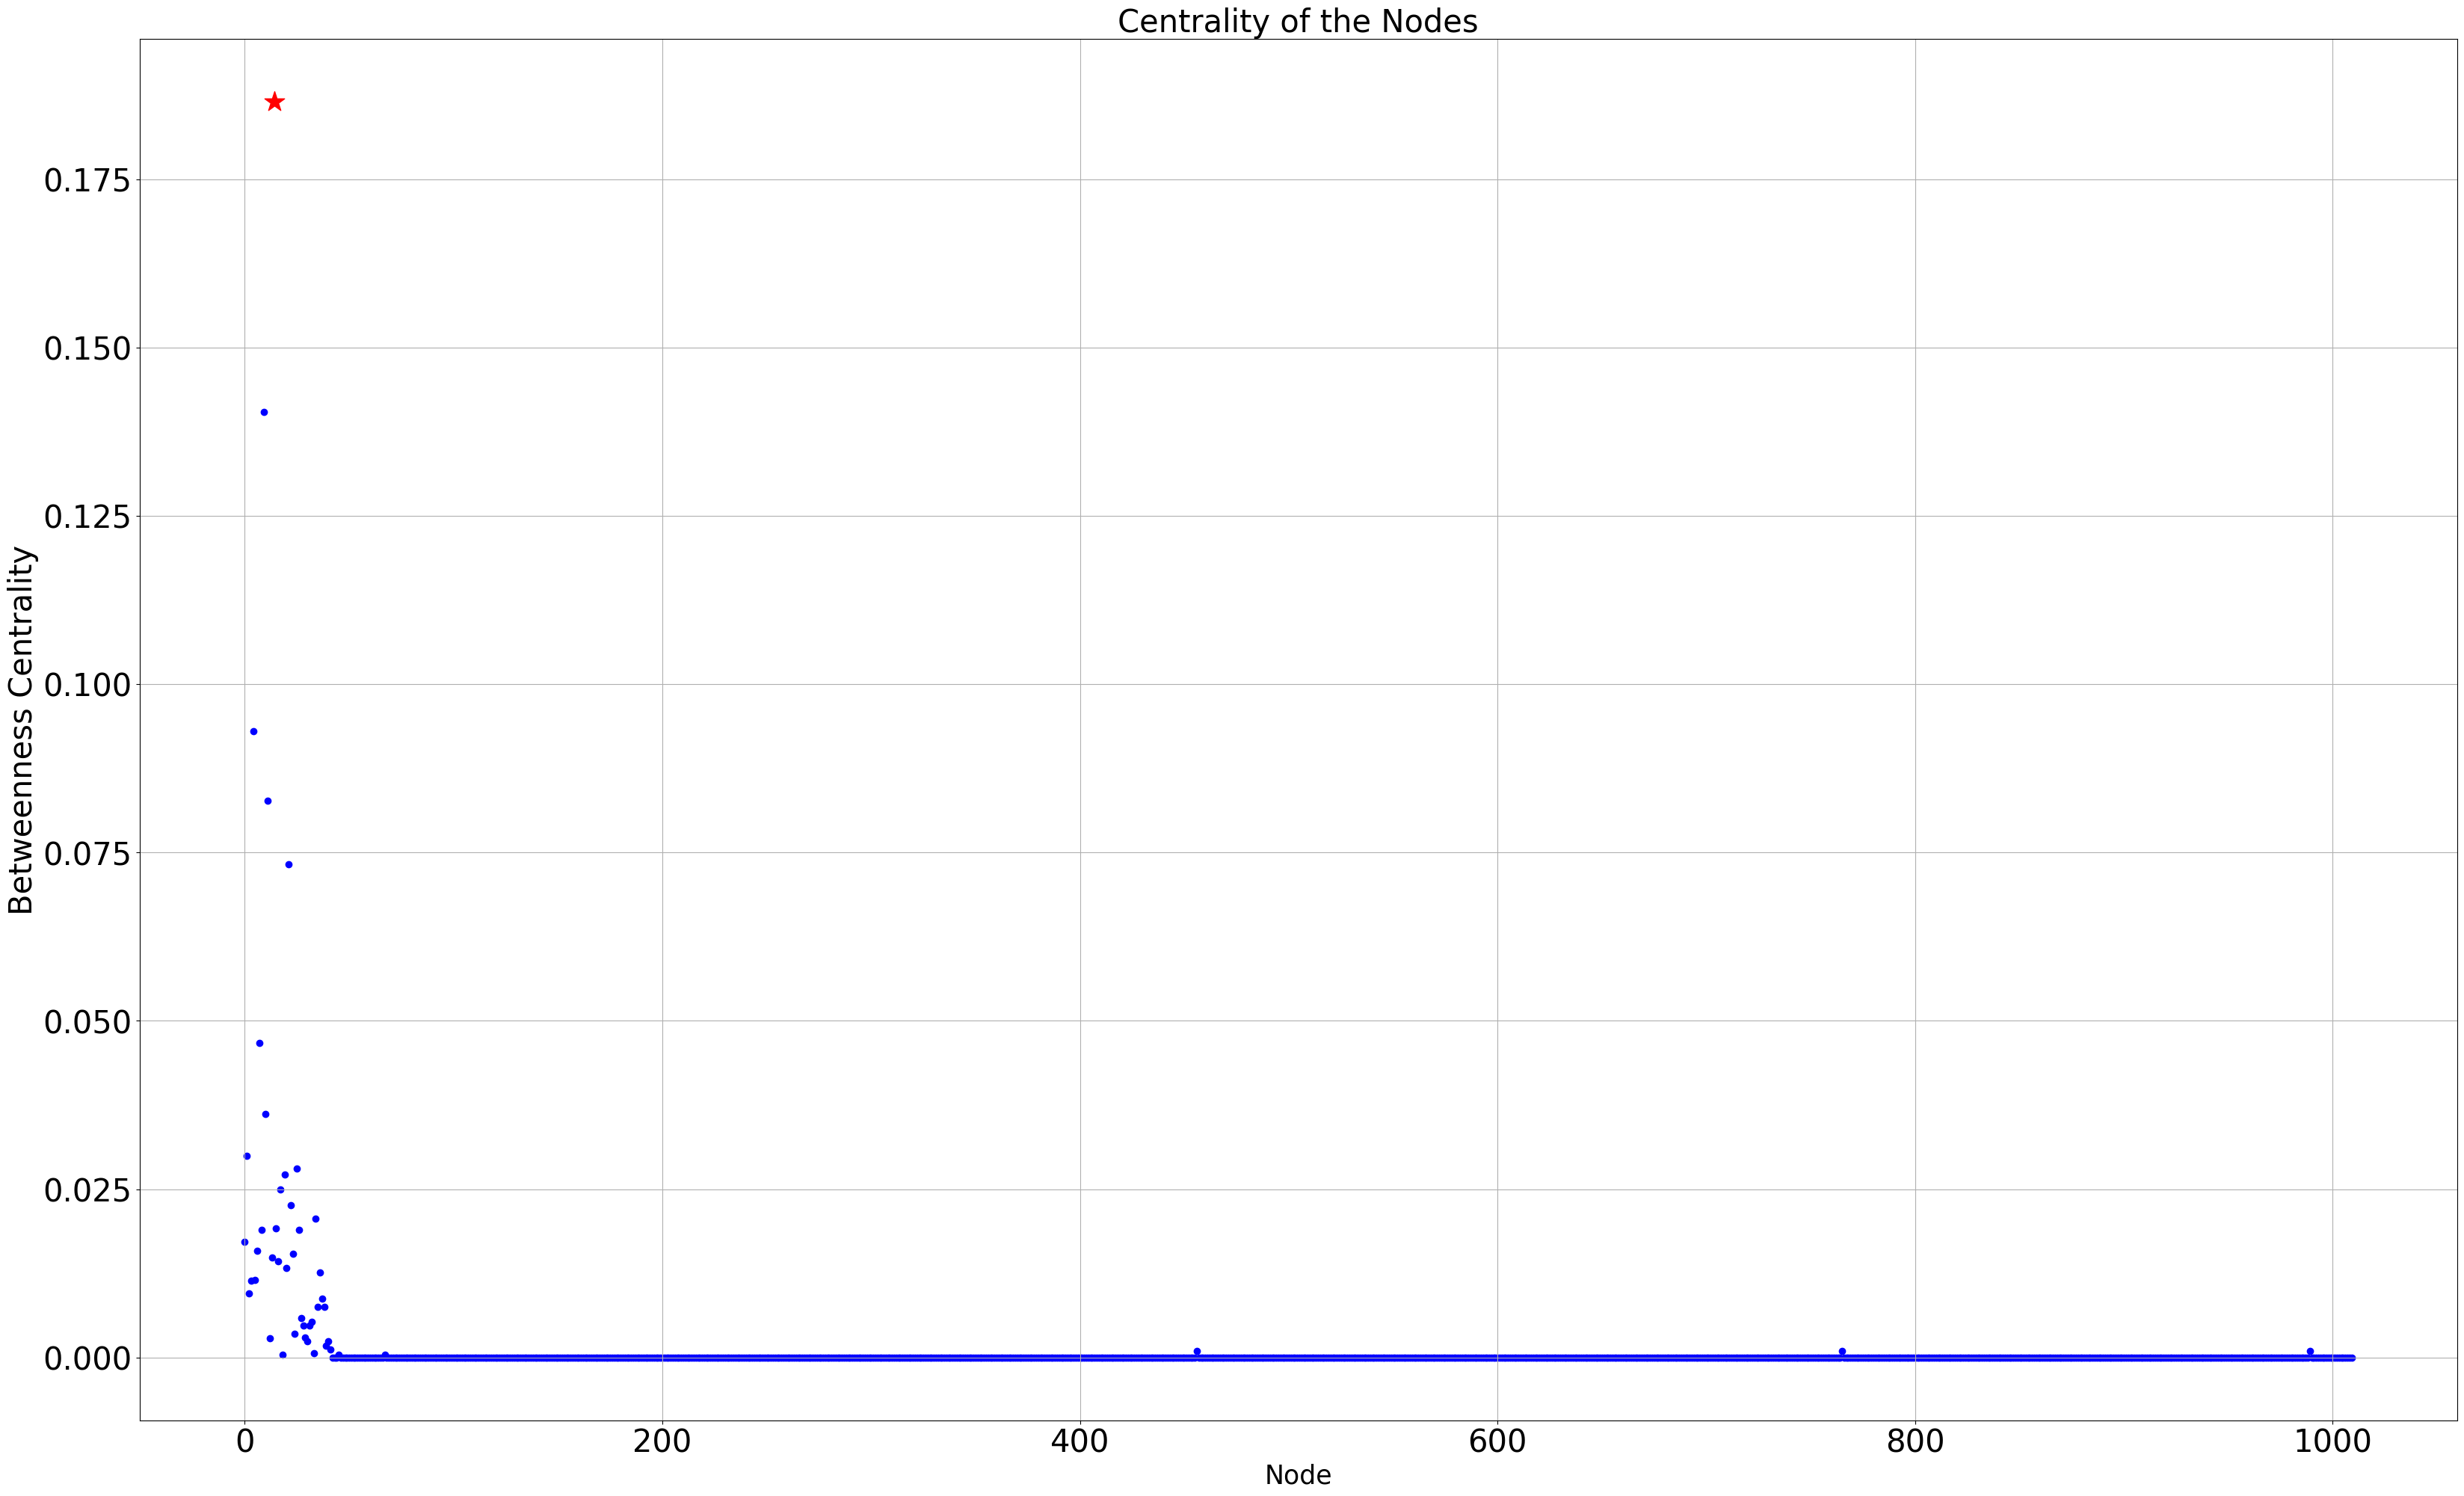

   Node ID  Betweenness Centrality
0     14.0                0.186559
1      9.0                0.140433
2      4.0                0.092997
3     11.0                0.082681
4     21.0                0.073236
5      7.0                0.046756
6     10.0                0.036212
7      1.0                0.029896
8     25.0                0.028088
9     19.0                0.027211


In [20]:
try:
    b2 = nx.betweenness_centrality(G1)
except nx.PowerIterationFailedConvergence as e:
    print("Power iteration failed to converge:", e)
centrality_value(b2,5)
visualize_centrality(b2,5)
top10_centrality(b2,5)

Clustering coefficient G1

      Node ID  Local Clustering Coefficient
0         0.0                      0.000000
1         1.0                      0.000000
2         2.0                      0.000000
3         3.0                      0.000000
4         4.0                      0.000167
...       ...                           ...
1008   1005.0                      0.000000
1009   1006.0                      0.000000
1010   1007.0                      0.000000
1011   1008.0                      0.000000
1012   1009.0                      0.000000

[1013 rows x 2 columns]
Node: 0 Local Clustering Coefficient : 0
Node: 1 Local Clustering Coefficient : 0
Node: 2 Local Clustering Coefficient : 0
Node: 3 Local Clustering Coefficient : 0
Node: 4 Local Clustering Coefficient : 0.00016680567139282736
Node: 5 Local Clustering Coefficient : 0
Node: 6 Local Clustering Coefficient : 0
Node: 7 Local Clustering Coefficient : 0
Node: 8 Local Clustering Coefficient : 0
Node: 9 Local Clustering Coefficient : 0
Node: 10 Local C

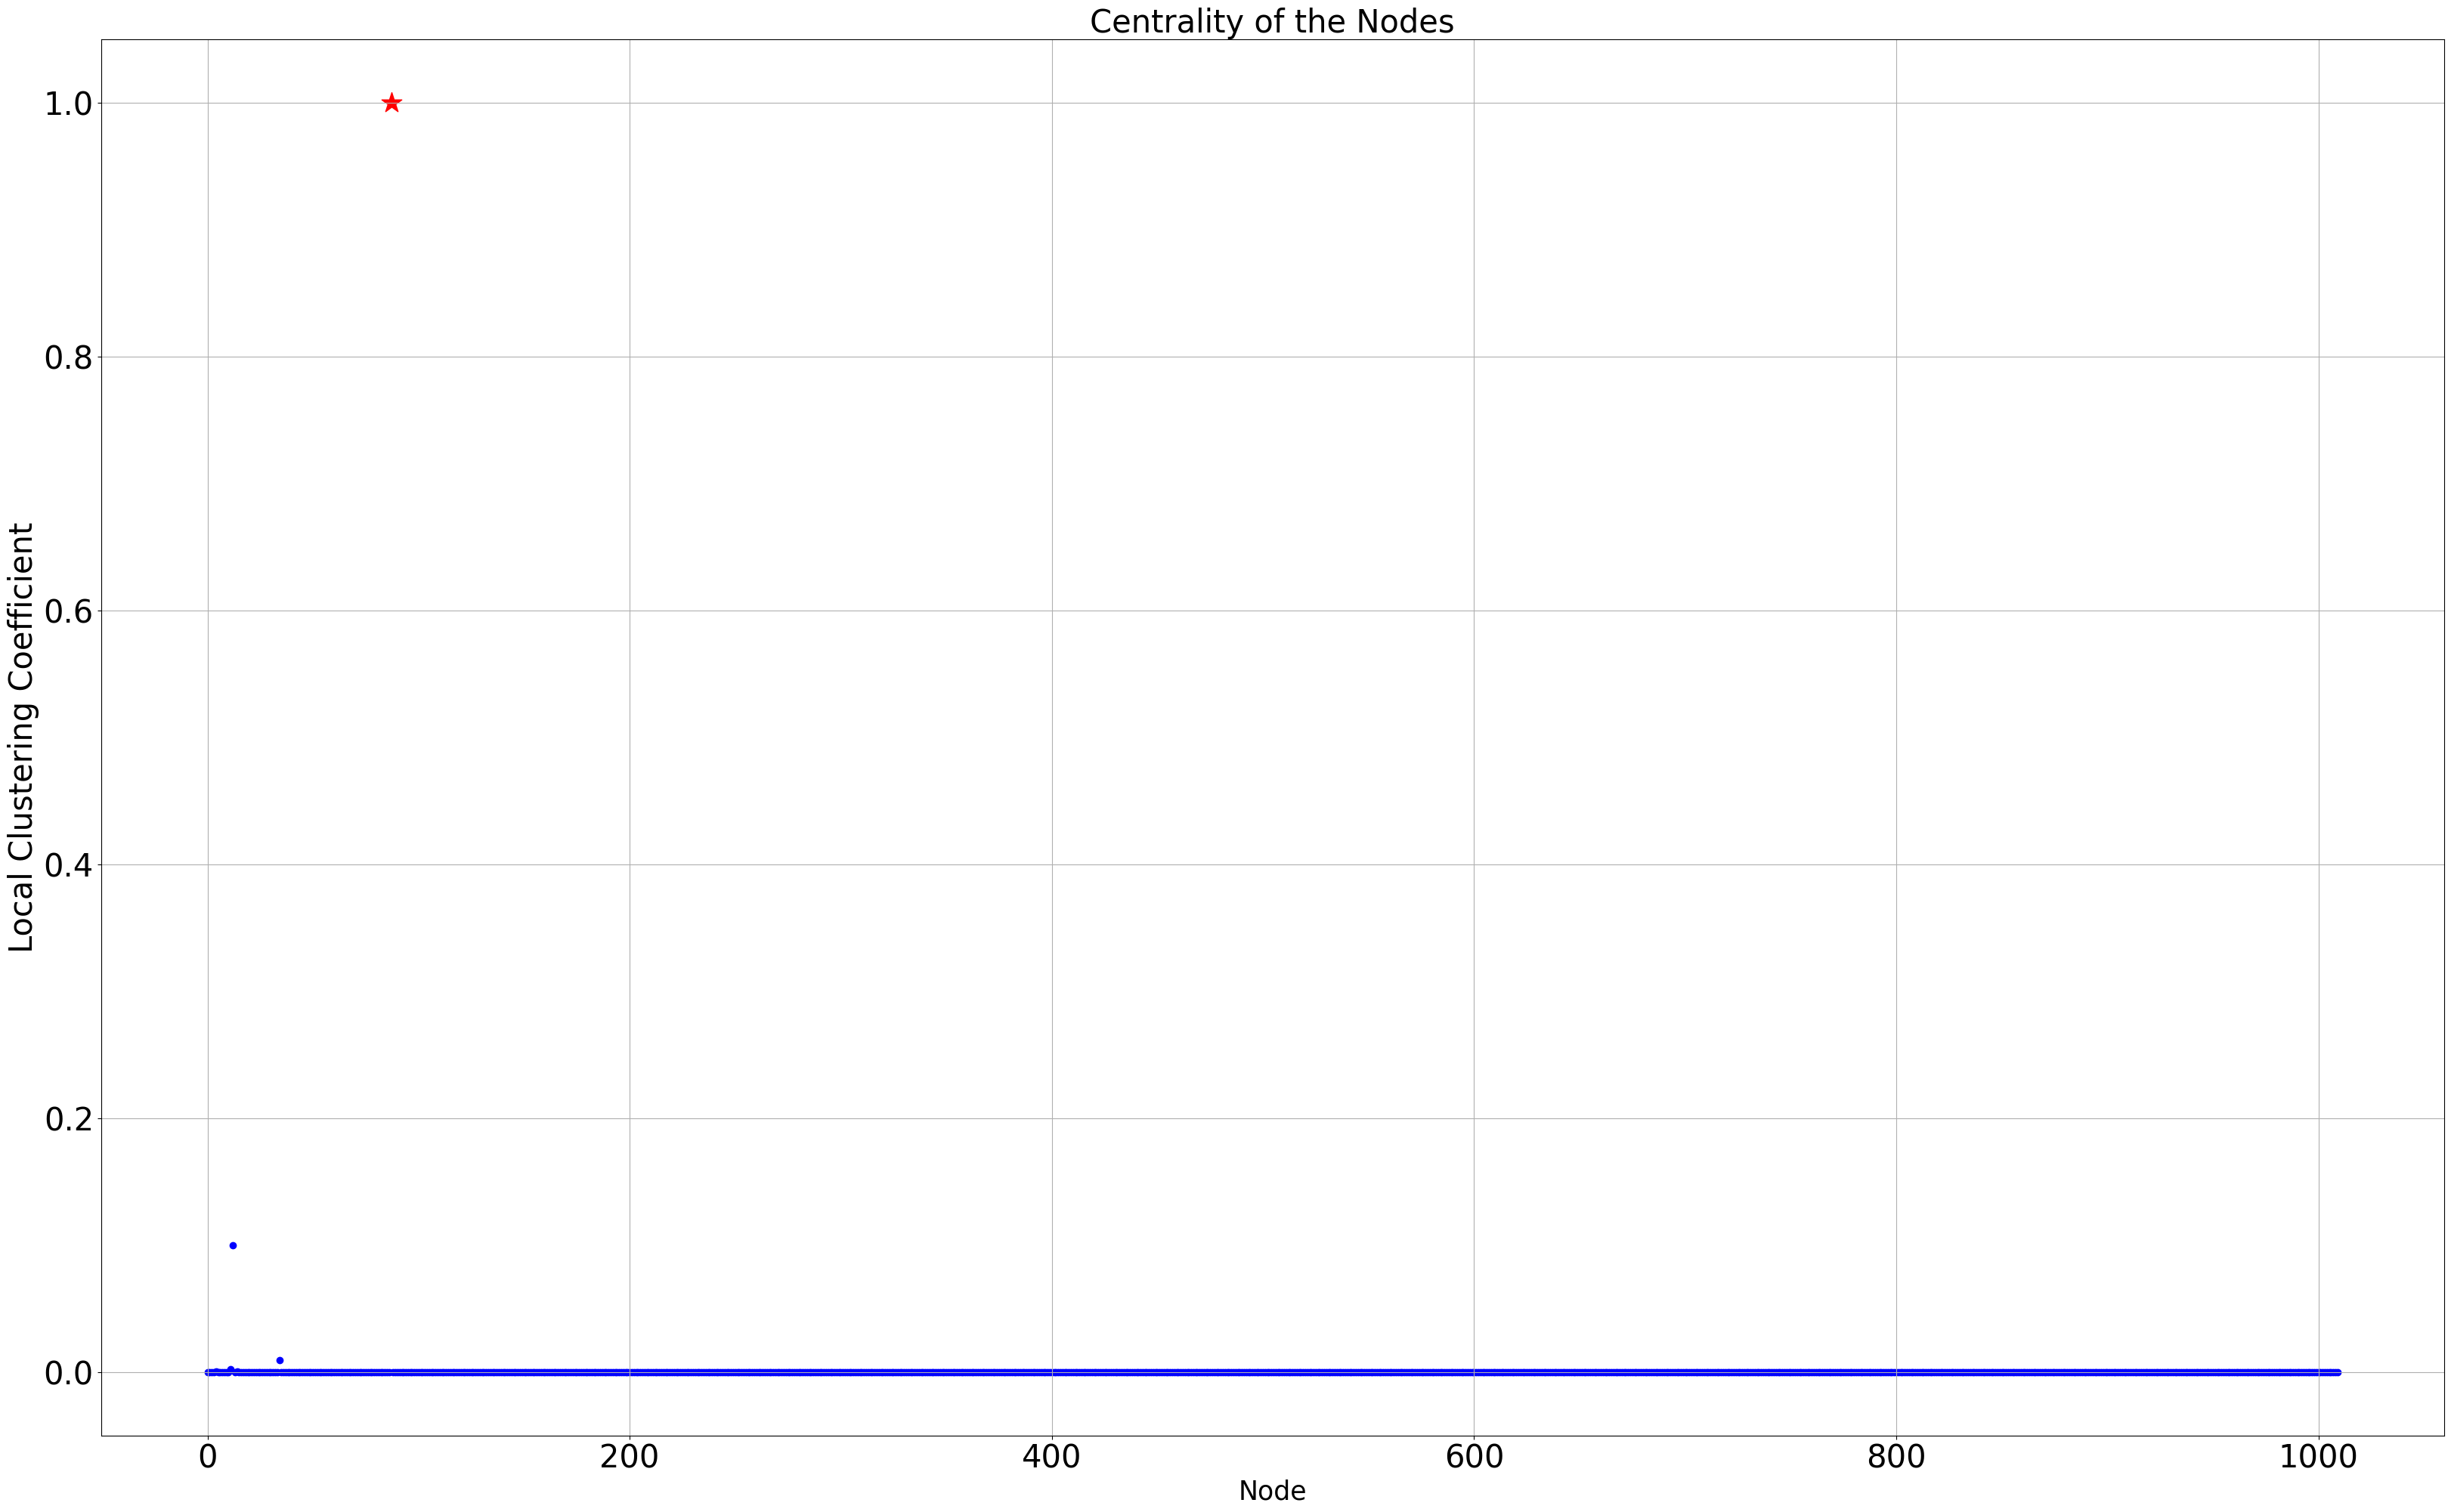

   Node ID  Local Clustering Coefficient
0     87.0                      1.000000
1     12.0                      0.100000
2     34.0                      0.009524
3     11.0                      0.002299
4     14.0                      0.000244
5      4.0                      0.000167
6      0.0                      0.000000
7      1.0                      0.000000
8      2.0                      0.000000
9     21.0                      0.000000


In [21]:
# Calculate the local clustering coefficient for each node in the graph G1.
l1 = nx.clustering(G1)
centrality_value(l1,6)
visualize_centrality(l1,6)
top10_centrality(l1,6)
#clustering coeff isliye 0 aa rha kyuki there are no triangles being formed in the networks and other few reasons

Global & Average coefficient G1

In [22]:
# Calculate the global clustering coefficient of the graph G1 and print it.
g1 = nx.average_clustering(G1)
print("\nGlobal Clustering Coefficient of G1:")
print(g1)

# Calculate the average clustering coefficient of the graph G1 using the previously computed local clustering coefficients and print it.
a1 = sum(l1.values()) / len(l1)
print("\nAverage Clustering Coefficient of G1:")
print(a1)


Global Clustering Coefficient of G1:
0.0010979601836269646

Average Clustering Coefficient of G1:
0.0010979601836269646


Reciprocity of G1

In [23]:
reciprocity1 = nx.reciprocity(G1)
print("\nReciprocity of G1:")
print(reciprocity1)


Reciprocity of G1:
0.0


Tranisitivity of G1

In [24]:
transitivity1 = nx.transitivity(G1)
print("\nTransitivity of G1:")
print(transitivity1)


Transitivity of G1:
0.00024920048178759814


Loading Dataset 2 - Web Google

In [25]:
df2 = pd.read_csv('lastfm_asia_edges.csv')
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(df2, source='node_1', target='node_2')


Plotting G2

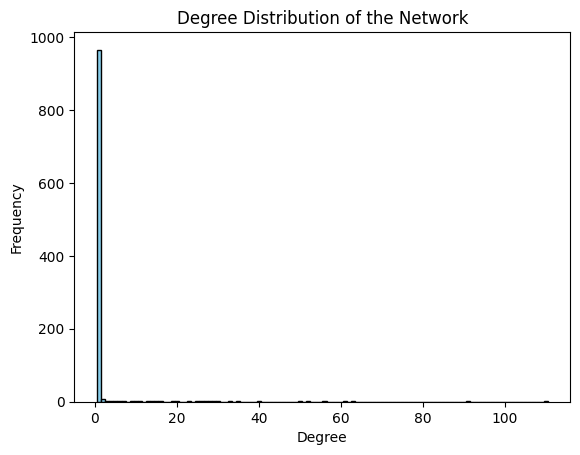

Graph with 7624 nodes and 27806 edges


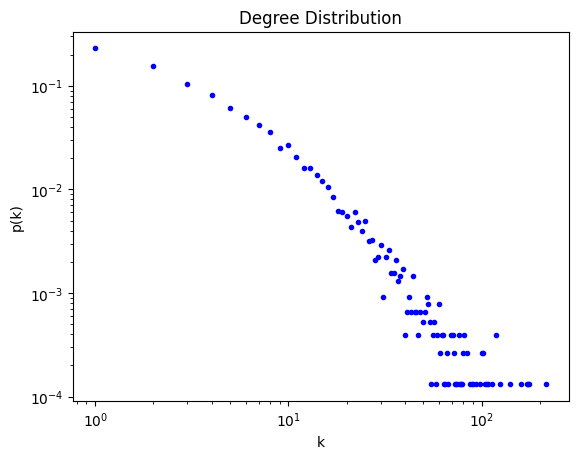

Maximum Degree: 110
Minimum Degree: 1
Average Degree: 1.9921026653504443
Standard Deviation of Degree Distribution: 11.499118968116877


In [26]:
# Assuming 'G2' is the network graph

# Plotting the Degree Distribution

plot_deg_dist_frequency(G2)
plot_deg_distribution(G2)

# Finding Max, Min and Avg Degree
maxi_degree = max_degree(G2)
mini_degree = min_degree(G2)
average_degree = avg_degree(G2)

# Determining Standard Deviation of Degree Distribution
std_dev_degree = std(G2)

print("Maximum Degree:", maxi_degree)
print("Minimum Degree:", mini_degree)
print("Average Degree:", average_degree)
print("Standard Deviation of Degree Distribution:",std_dev_degree)

Degree Centrality for G2

      Node ID  Degree Centrality
0           0           0.000131
1           1           0.001312
2           2           0.000918
3           3           0.002361
4           4           0.000131
...       ...                ...
7619     7619           0.000131
7620     7620           0.000394
7621     7621           0.001837
7622     7622           0.000394
7623     7623           0.001443

[7624 rows x 2 columns]
Node: 0 Degree Centrality : 0.00013118194936376755
Node: 1 Degree Centrality : 0.0013118194936376755
Node: 2 Degree Centrality : 0.0009182736455463728
Node: 3 Degree Centrality : 0.0023612750885478157
Node: 4 Degree Centrality : 0.00013118194936376755
Node: 5 Degree Centrality : 0.00013118194936376755
Node: 6 Degree Centrality : 0.002623638987275351
Node: 7 Degree Centrality : 0.0010494555949101404
Node: 8 Degree Centrality : 0.00013118194936376755
Node: 9 Degree Centrality : 0.0010494555949101404
Node: 10 Degree Centrality : 0.00013118194936376755
Node: 11 Degree Centrali

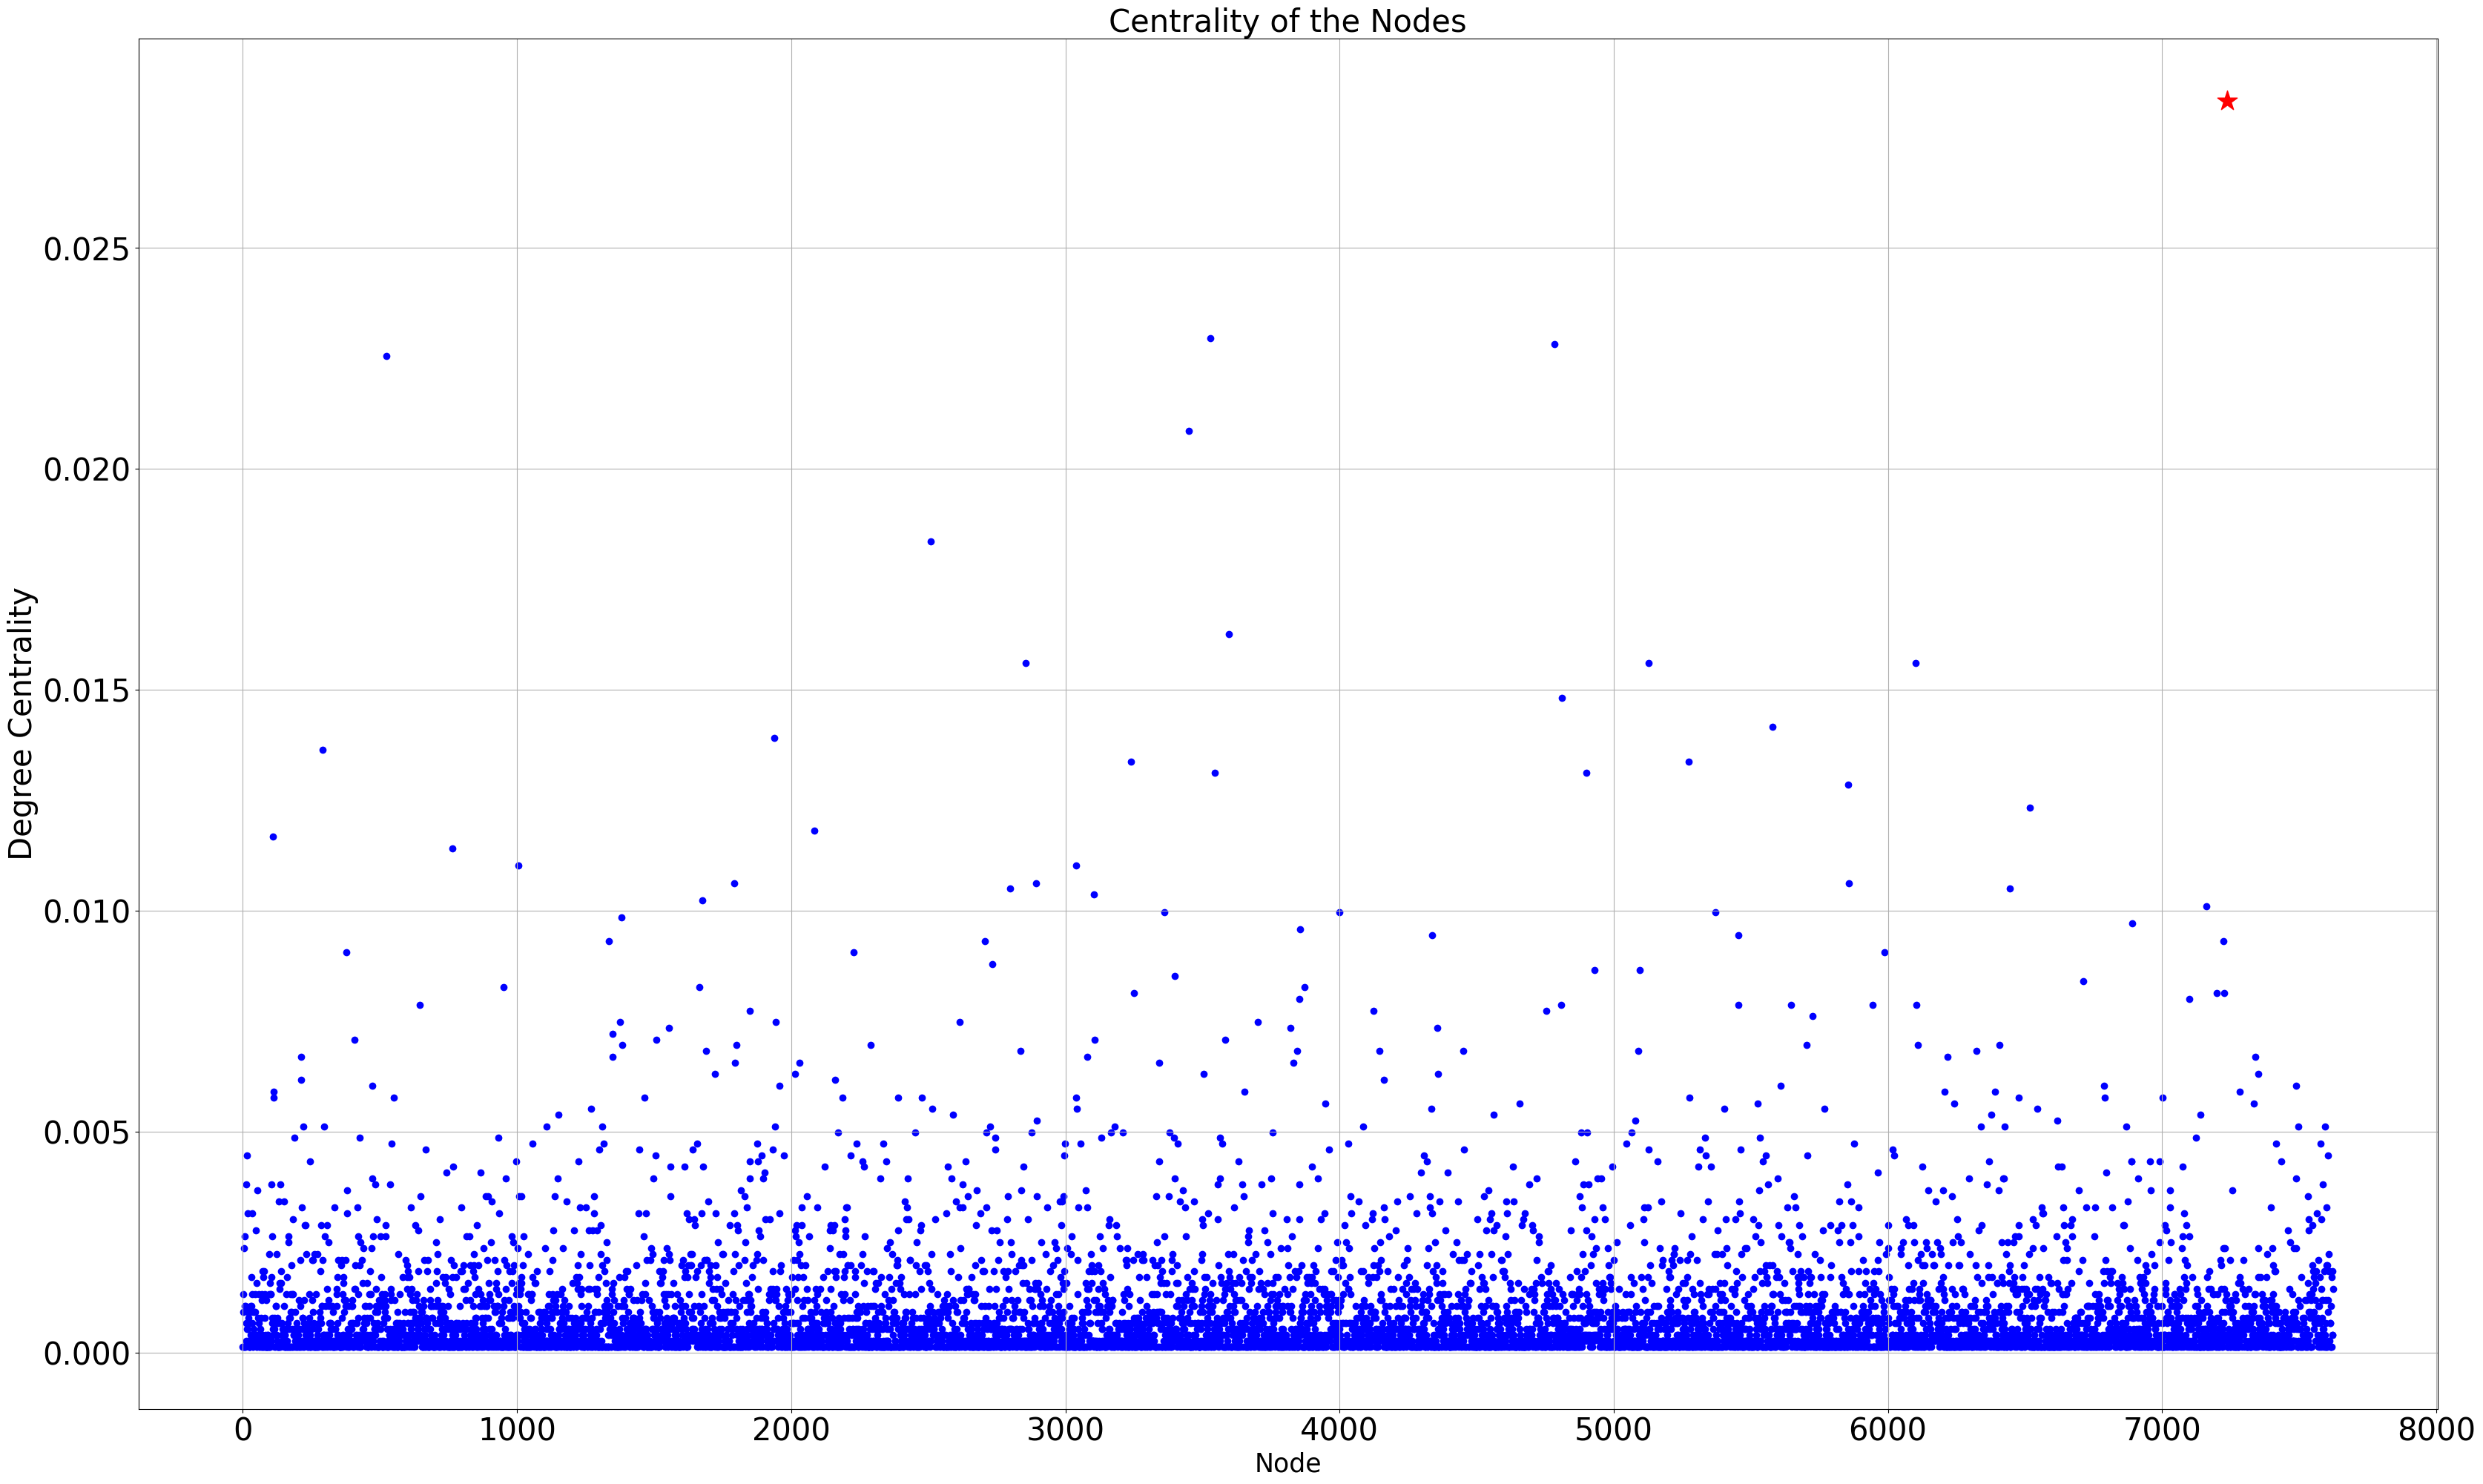

   Node ID  Degree Centrality
0     7237           0.028335
1     3530           0.022957
2     4785           0.022826
3      524           0.022563
4     3450           0.020858
5     2510           0.018365
6     3597           0.016267
7     2854           0.015611
8     6101           0.015611
9     5127           0.015611


In [27]:
# Calculate the degree centrality for the graph G2.
d2 = nx.degree_centrality(G2)
#d2= {node: d2[node] for node in range(1, 1001)}
centrality_value(d2,0)
visualize_centrality(d2,0)
top10_centrality(d2,0)

Eigen Vector Centrality for G2

      Node ID  Eigenvector Centrality
0           0            1.597569e-06
1           1            1.310760e-04
2           2            7.433614e-07
3           3            3.161530e-04
4           4            7.226498e-07
...       ...                     ...
7619     7619            4.073414e-07
7620     7620            3.099512e-06
7621     7621            1.356263e-02
7622     7622            6.830055e-06
7623     7623            5.263825e-06

[7624 rows x 2 columns]
Node: 0 Eigenvector Centrality : 1.5975689365706297e-06
Node: 1 Eigenvector Centrality : 0.00013107597395546663
Node: 2 Eigenvector Centrality : 7.43361375373027e-07
Node: 3 Eigenvector Centrality : 0.00031615295836075907
Node: 4 Eigenvector Centrality : 7.226498244572167e-07
Node: 5 Eigenvector Centrality : 6.227208489708692e-05
Node: 6 Eigenvector Centrality : 1.4681164221796181e-05
Node: 7 Eigenvector Centrality : 0.0011341368149612628
Node: 8 Eigenvector Centrality : 4.943026417490877e-06
Node: 9 Eigenvector C

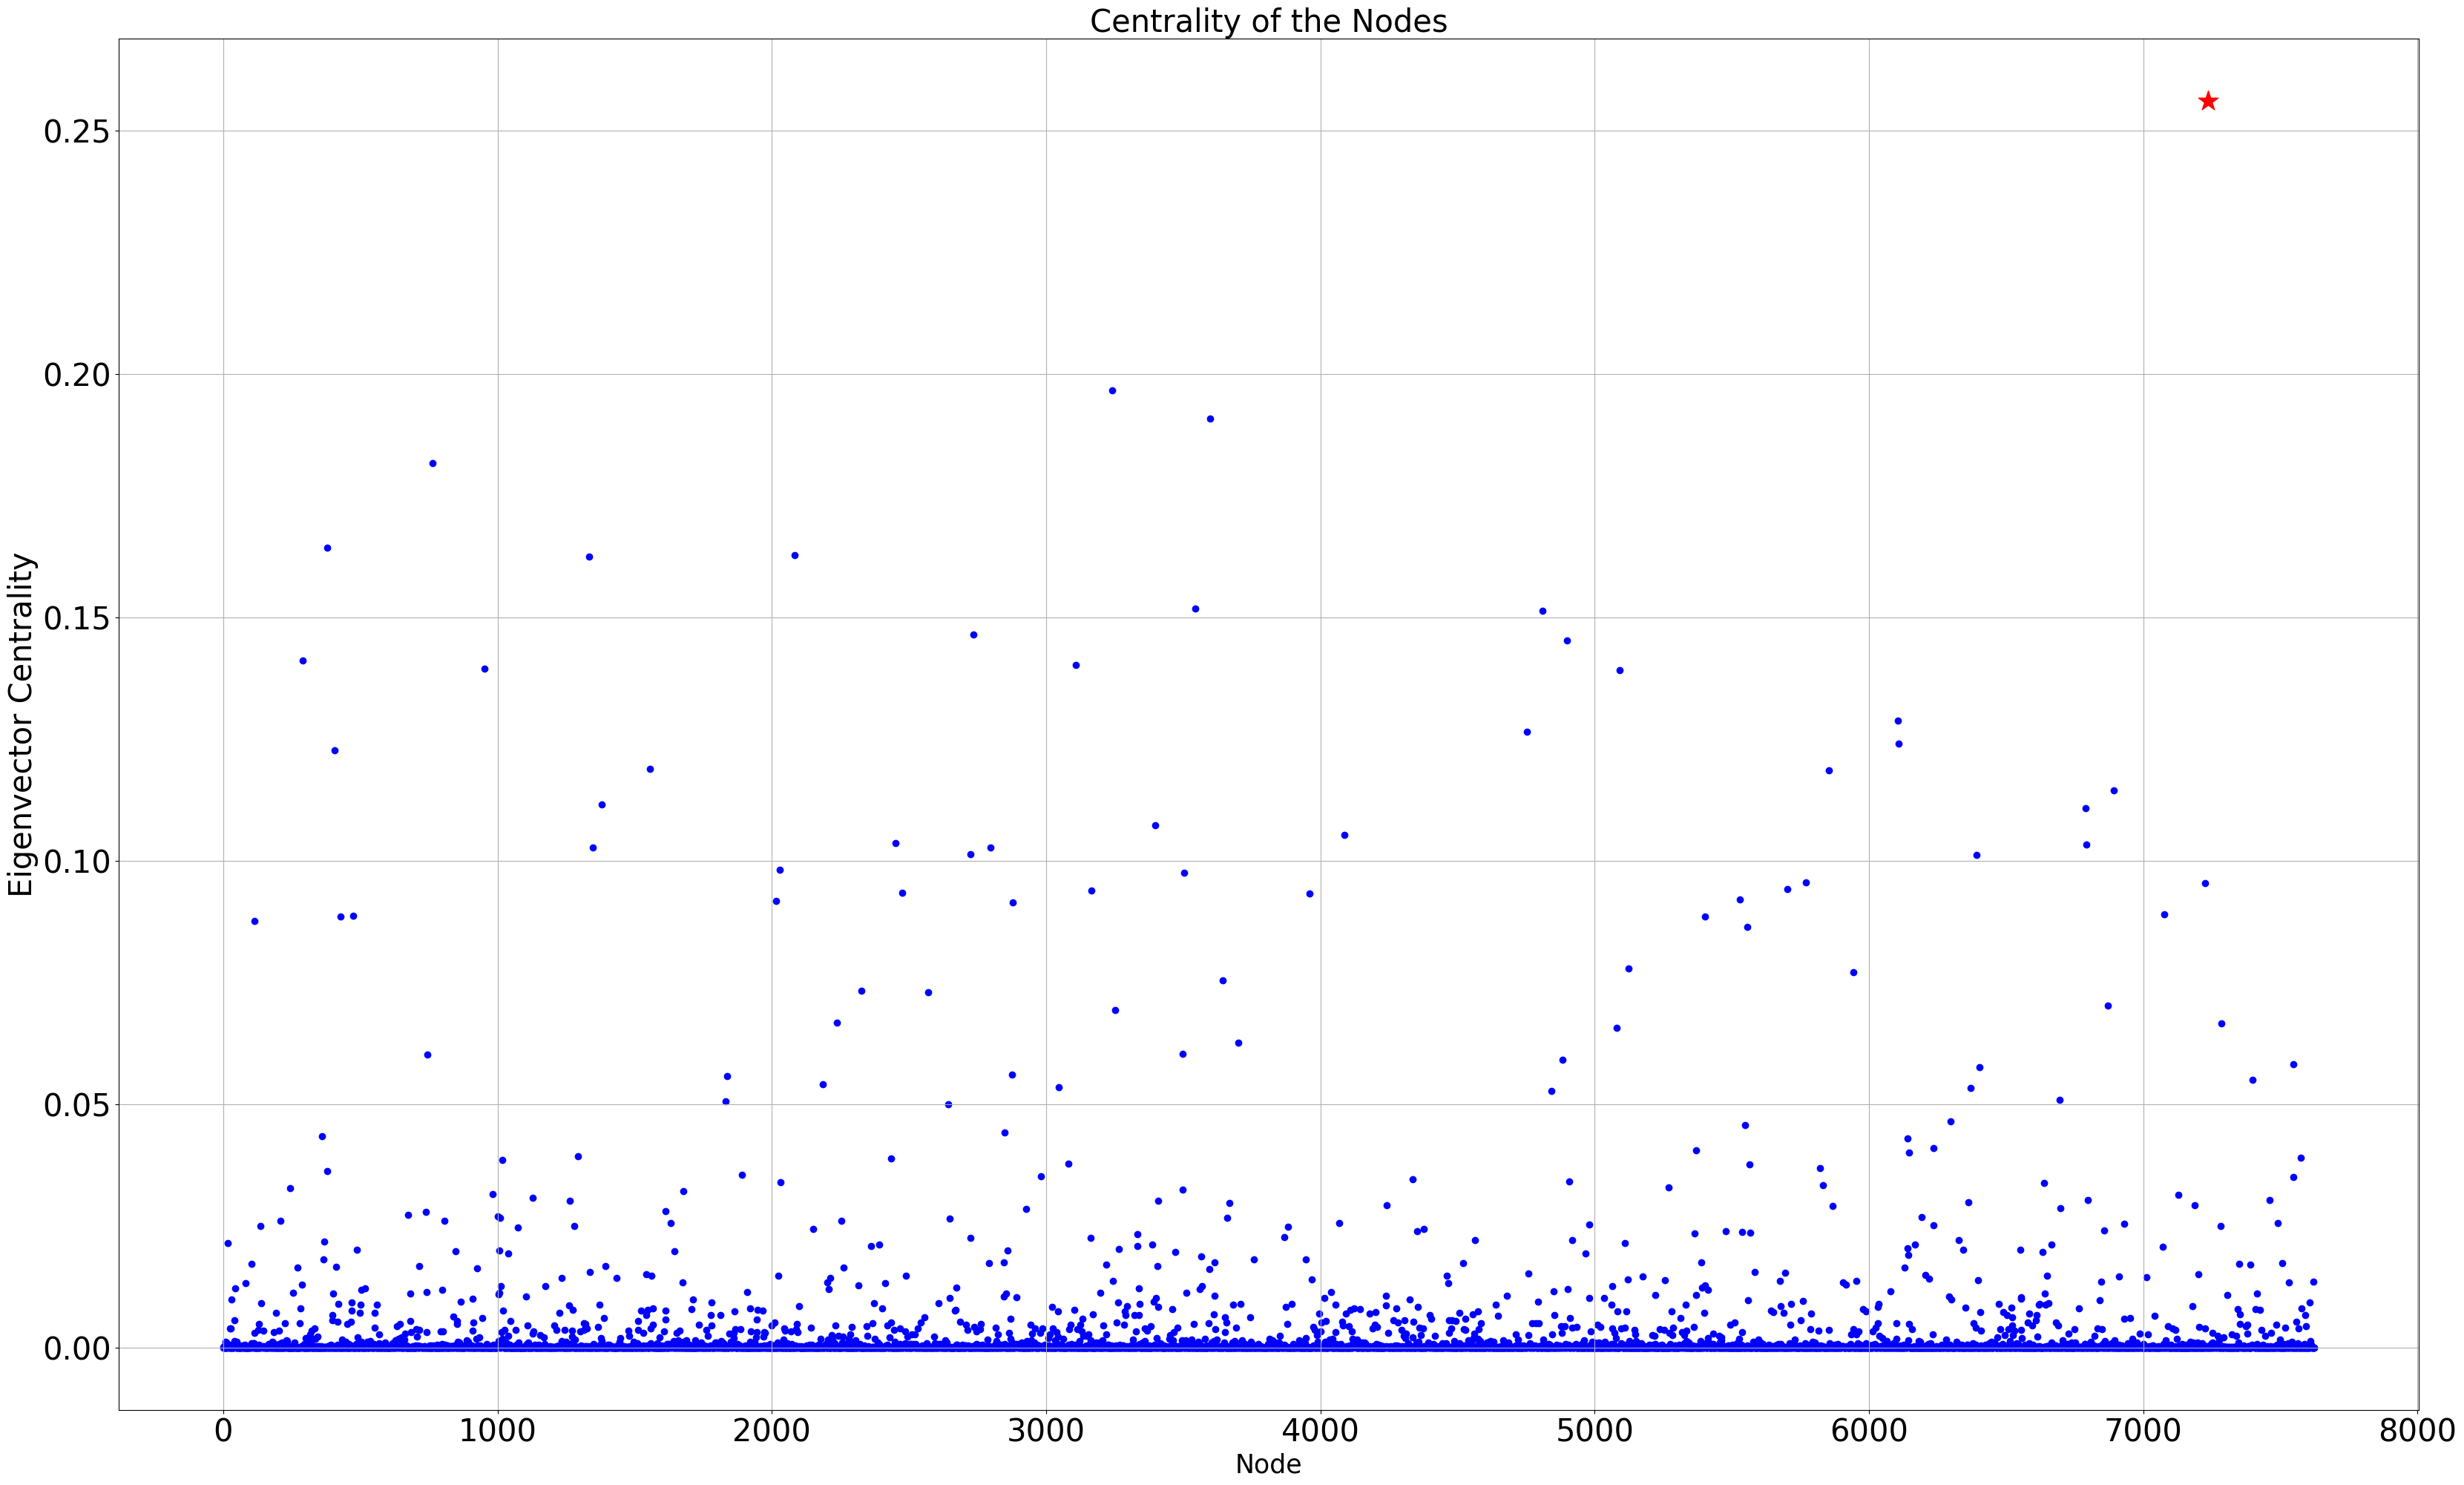

   Node ID  Eigenvector Centrality
0     7237                0.256134
1     3240                0.196578
2     3597                0.190829
3      763                0.181685
4      378                0.164246
5     2083                0.162721
6     1334                0.162531
7     3544                0.151874
8     4809                0.151282
9     2734                0.146488


In [28]:
e2 = nx.eigenvector_centrality(G2)
#e2= {node: e2[node] for node in range(1, 1001)}
centrality_value(e2,1)
visualize_centrality(e2,1)
top10_centrality(e2,1)

Katz Centrality for G2

      Node ID             Katz Centrality
0           0  1.581937e-06+0.000000e+00j
1           1  1.309381e-04+0.000000e+00j
2           2  7.345737e-07+0.000000e+00j
3           3  3.156410e-04+0.000000e+00j
4           4  7.225761e-07+0.000000e+00j
...       ...                         ...
7619     7619  3.825455e-07+0.000000e+00j
7620     7620  3.070484e-06+0.000000e+00j
7621     7621  1.356289e-02+0.000000e+00j
7622     7622  6.794888e-06+0.000000e+00j
7623     7623  4.840866e-06+0.000000e+00j

[7624 rows x 2 columns]
Node: 0 Katz Centrality : (1.581937163642833e-06+0j)
Node: 1 Katz Centrality : (0.00013093813575325256+0j)
Node: 2 Katz Centrality : (7.345736697465153e-07+0j)
Node: 3 Katz Centrality : (0.00031564102039542566+0j)
Node: 4 Katz Centrality : (7.225761046941746e-07+0j)
Node: 5 Katz Centrality : (6.208705300752746e-05+0j)
Node: 6 Katz Centrality : (1.4586698859579824e-05+0j)
Node: 7 Katz Centrality : (0.0011340706065432402+0j)
Node: 8 Katz Centrality : (4.941665907945631

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


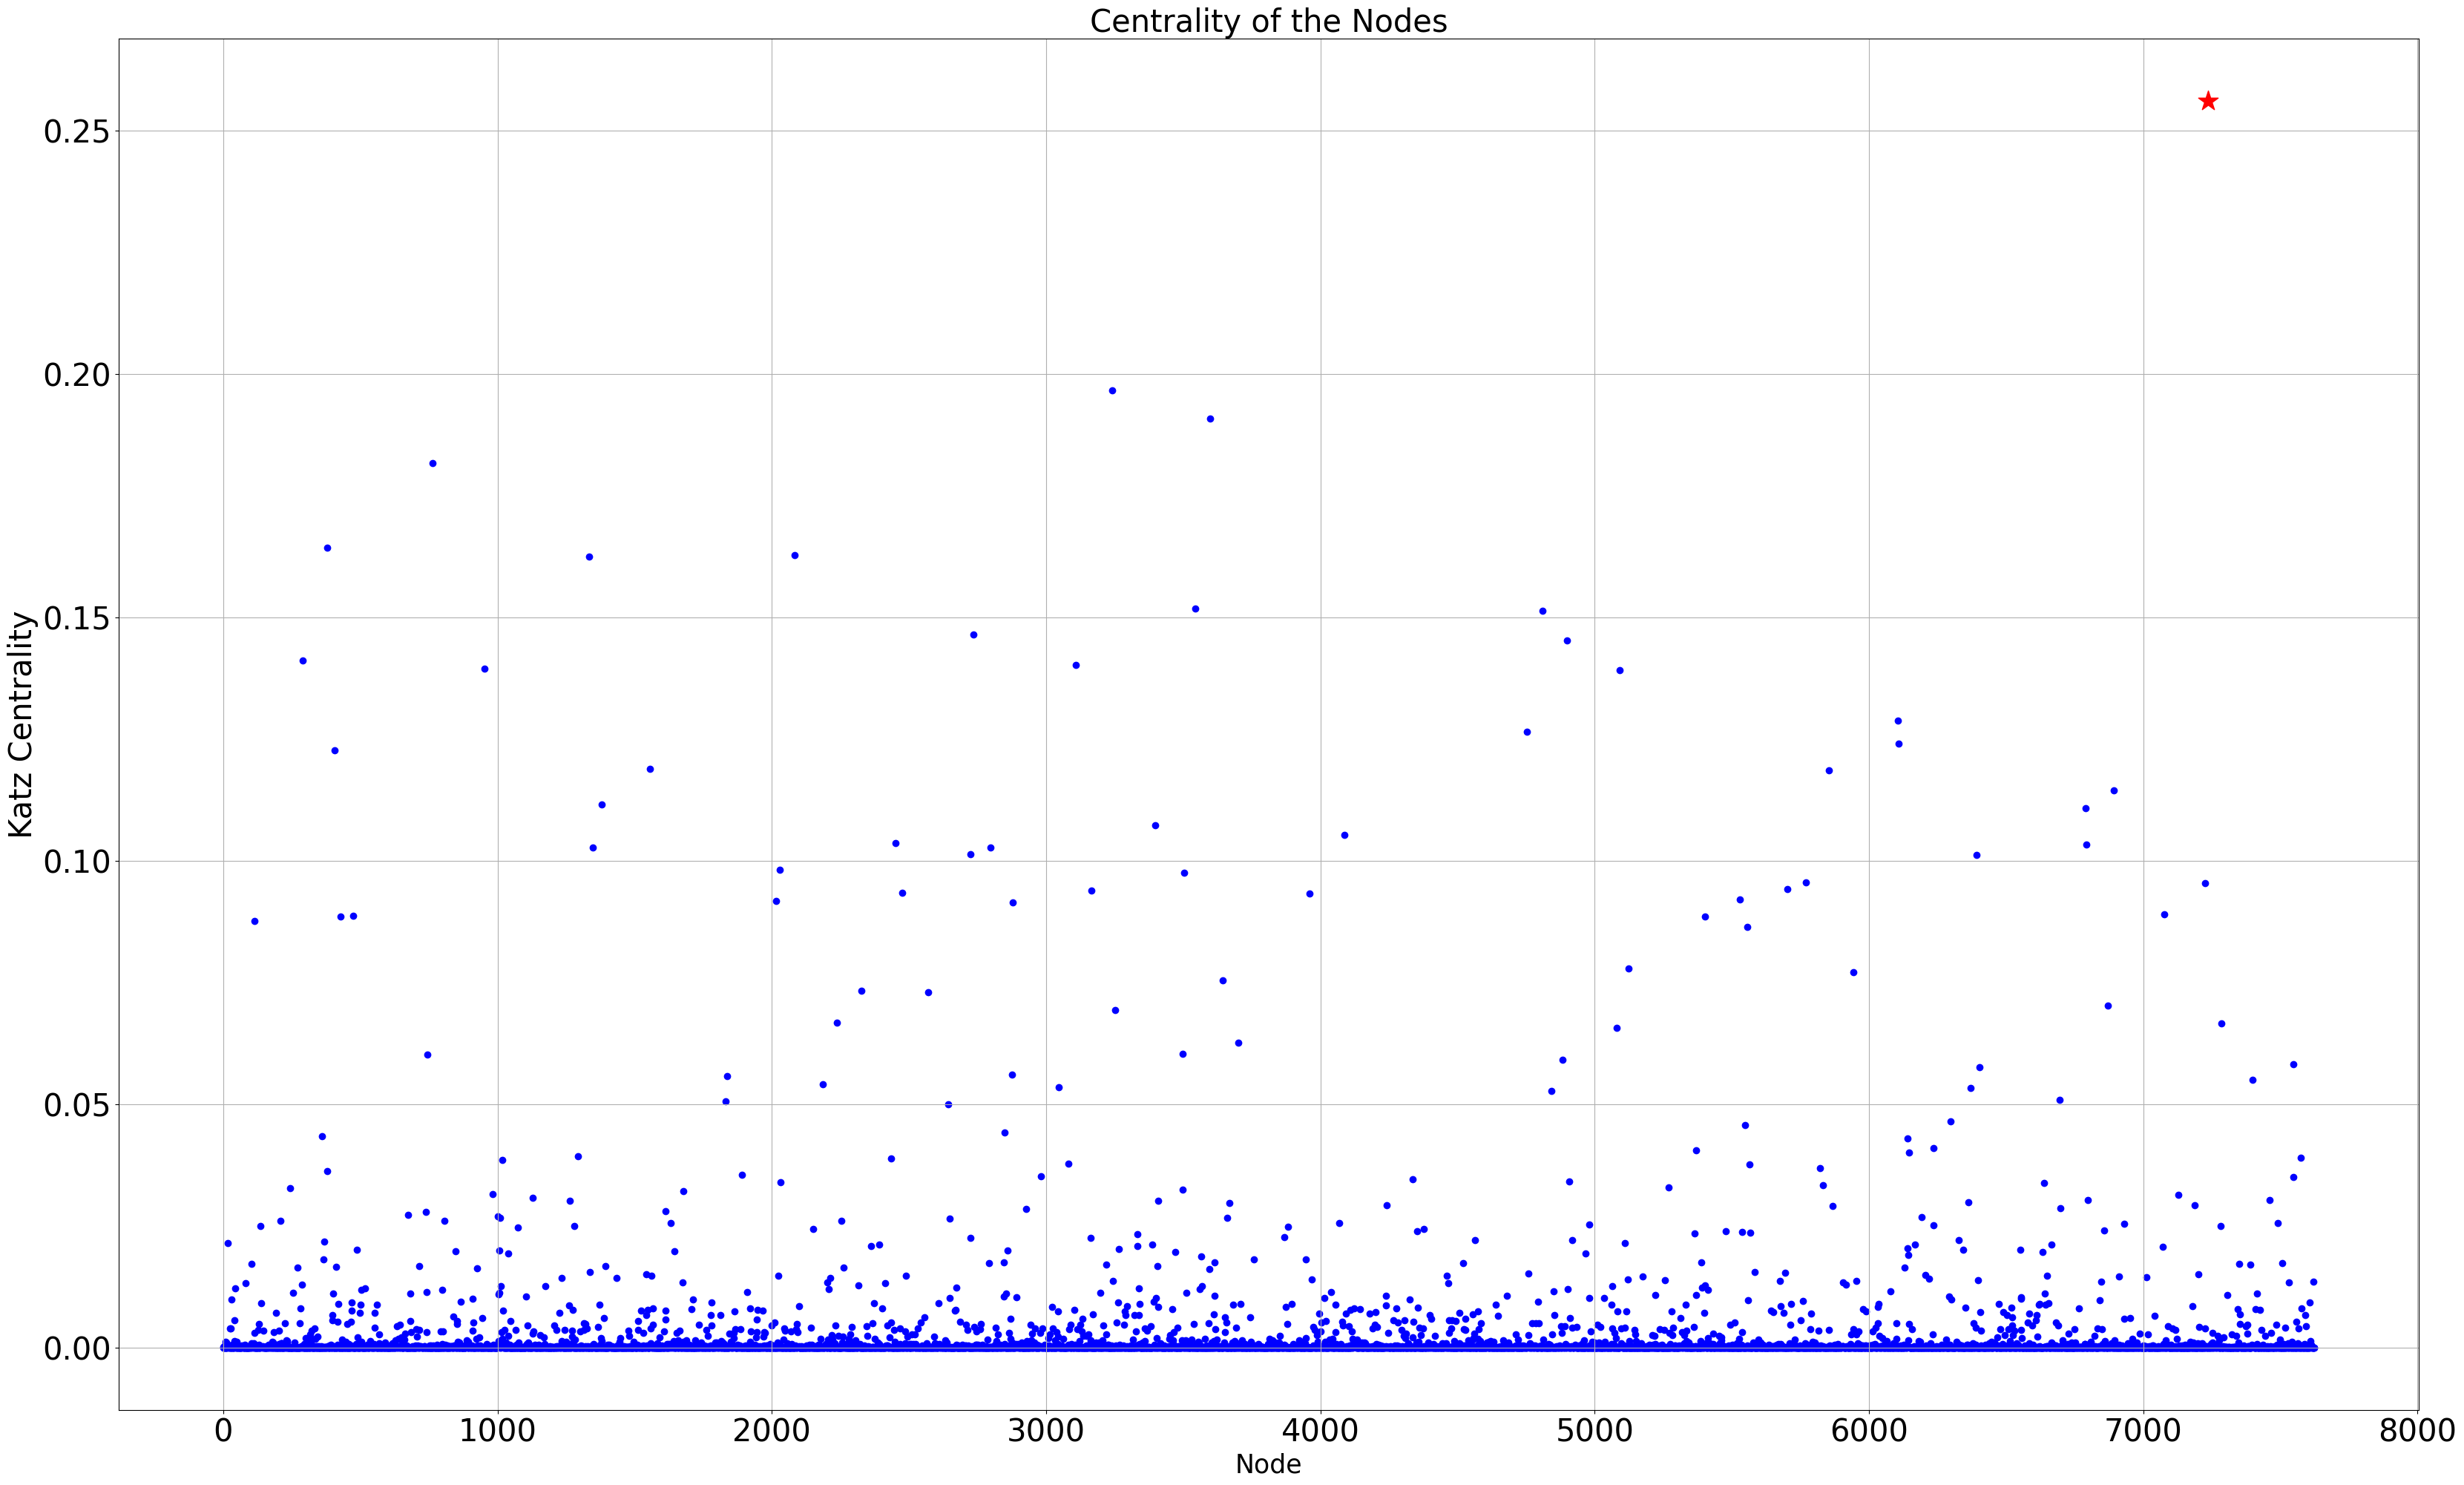

   Node ID     Katz Centrality
0     7237  0.256134+0.000000j
1     3240  0.196581+0.000000j
2     3597  0.190832+0.000000j
3      763  0.181688+0.000000j
4      378  0.164249+0.000000j
5     2083  0.162724+0.000000j
6     1334  0.162533+0.000000j
7     3544  0.151874+0.000000j
8     4809  0.151285+0.000000j
9     2734  0.146490+0.000000j


In [29]:
from scipy.sparse.linalg import eigs

# Convert the graph to a NumPy matrix with float data type
A = nx.to_numpy_array(G2, dtype=float)

try:
    # Compute the largest eigenvector using power iteration method
    eigenvalues, eigenvectors = eigs(A, k=1, which='LR', maxiter=2000, tol=1e-4)

    # Extract the largest eigenvector
    largest_eigenvector = np.squeeze(np.asarray(eigenvectors))

    # Normalize the largest eigenvector to obtain Katz centrality
    katz_centrality = largest_eigenvector / np.linalg.norm(largest_eigenvector)

    # Convert the result to a dictionary format
    katz_centrality = {node: katz_centrality[i] for i, node in enumerate(G2.nodes())}

    # Print or use the Katz centrality dictionary
    centrality_value(katz_centrality, 3)
    visualize_centrality(katz_centrality, 3)
    top10_centrality(katz_centrality, 3)

except Exception as e:
    print("Error:", e)

Page Rank Centrality for G2

      Node ID  Pagerank
0           0  0.000034
1           1  0.000212
2           2  0.000148
3           3  0.000283
4           4  0.000040
...       ...       ...
7619     7619  0.000055
7620     7620  0.000078
7621     7621  0.000193
7622     7622  0.000065
7623     7623  0.000141

[7624 rows x 2 columns]
Node: 0 Pagerank : 3.402880963282788e-05
Node: 1 Pagerank : 0.00021180448197622253
Node: 2 Pagerank : 0.00014798737021849885
Node: 3 Pagerank : 0.00028280729864897777
Node: 4 Pagerank : 3.970010078620619e-05
Node: 5 Pagerank : 3.420529934650004e-05
Node: 6 Pagerank : 0.00036934797356833946
Node: 7 Pagerank : 0.00021764260496935222
Node: 8 Pagerank : 4.763413093293641e-05
Node: 9 Pagerank : 0.00023044761380854498
Node: 10 Pagerank : 3.756753125308294e-05
Node: 11 Pagerank : 9.855348667364902e-05
Node: 12 Pagerank : 5.002603051900713e-05
Node: 13 Pagerank : 0.0003297781161746249
Node: 14 Pagerank : 6.913134113457262e-05
Node: 15 Pagerank : 0.00010605695757298533
Node: 16 Pagerank 

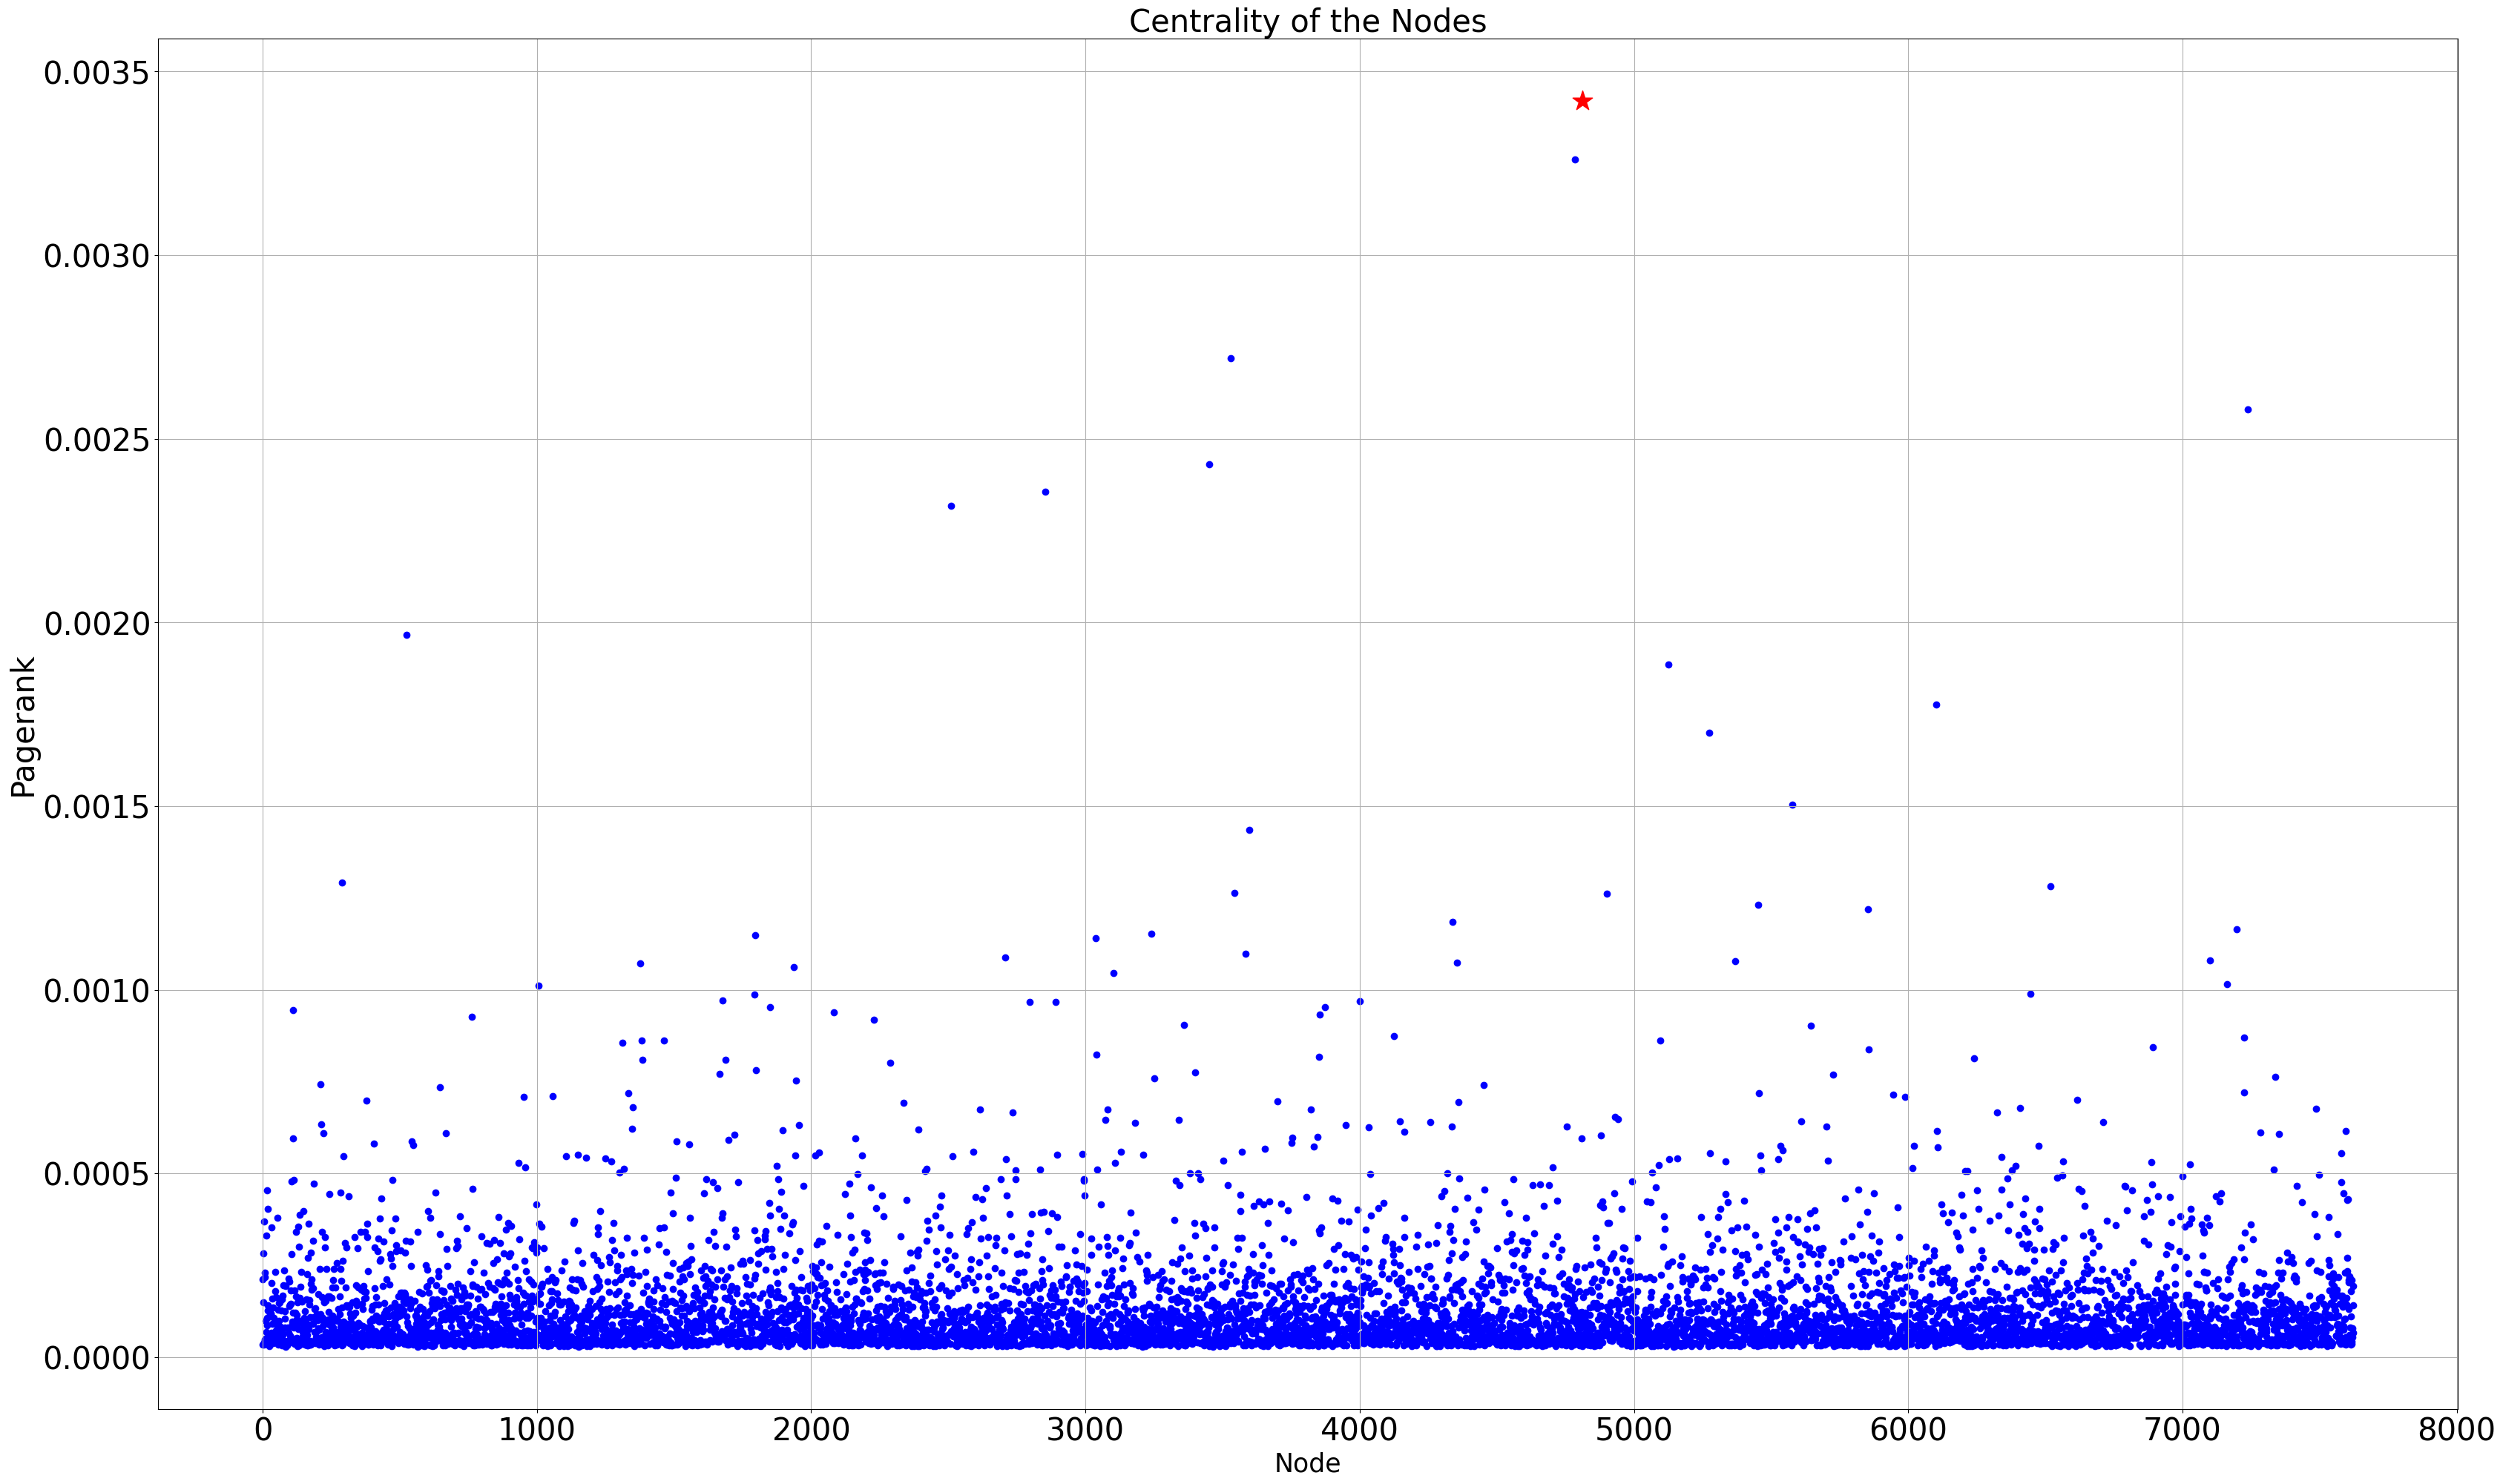

   Node ID  Pagerank
0     4811  0.003421
1     4785  0.003261
2     3530  0.002719
3     7237  0.002581
4     3450  0.002431
5     2854  0.002356
6     2510  0.002317
7      524  0.001967
8     5127  0.001886
9     6101  0.001776


In [30]:
p2 = nx.pagerank(G2)
centrality_value(p2,2)
visualize_centrality(p2,2)
top10_centrality(p2,2)


Closeness Centrality for G2

     Node ID  Closeness Centrality
0          1              0.210621
1          2              0.169088
2          3              0.217365
3          4              0.143136
4          5              0.218650
..       ...                   ...
995      996              0.196373
996      997              0.204452
997      998              0.222569
998      999              0.210941
999     1000              0.180341

[1000 rows x 2 columns]
Node: 0 Closeness Centrality : Node not found
Node: 1 Closeness Centrality : 0.210620838283646
Node: 2 Closeness Centrality : 0.1690881263447419
Node: 3 Closeness Centrality : 0.21736526946107784
Node: 4 Closeness Centrality : 0.1431361135625364
Node: 5 Closeness Centrality : 0.21864960991280405
Node: 6 Closeness Centrality : 0.1959237174874062
Node: 7 Closeness Centrality : 0.2237583656216978
Node: 8 Closeness Centrality : 0.16003274971658898
Node: 9 Closeness Centrality : 0.20372547971564486
Node: 10 Closeness Centrality : 0.19160006032272658
Node

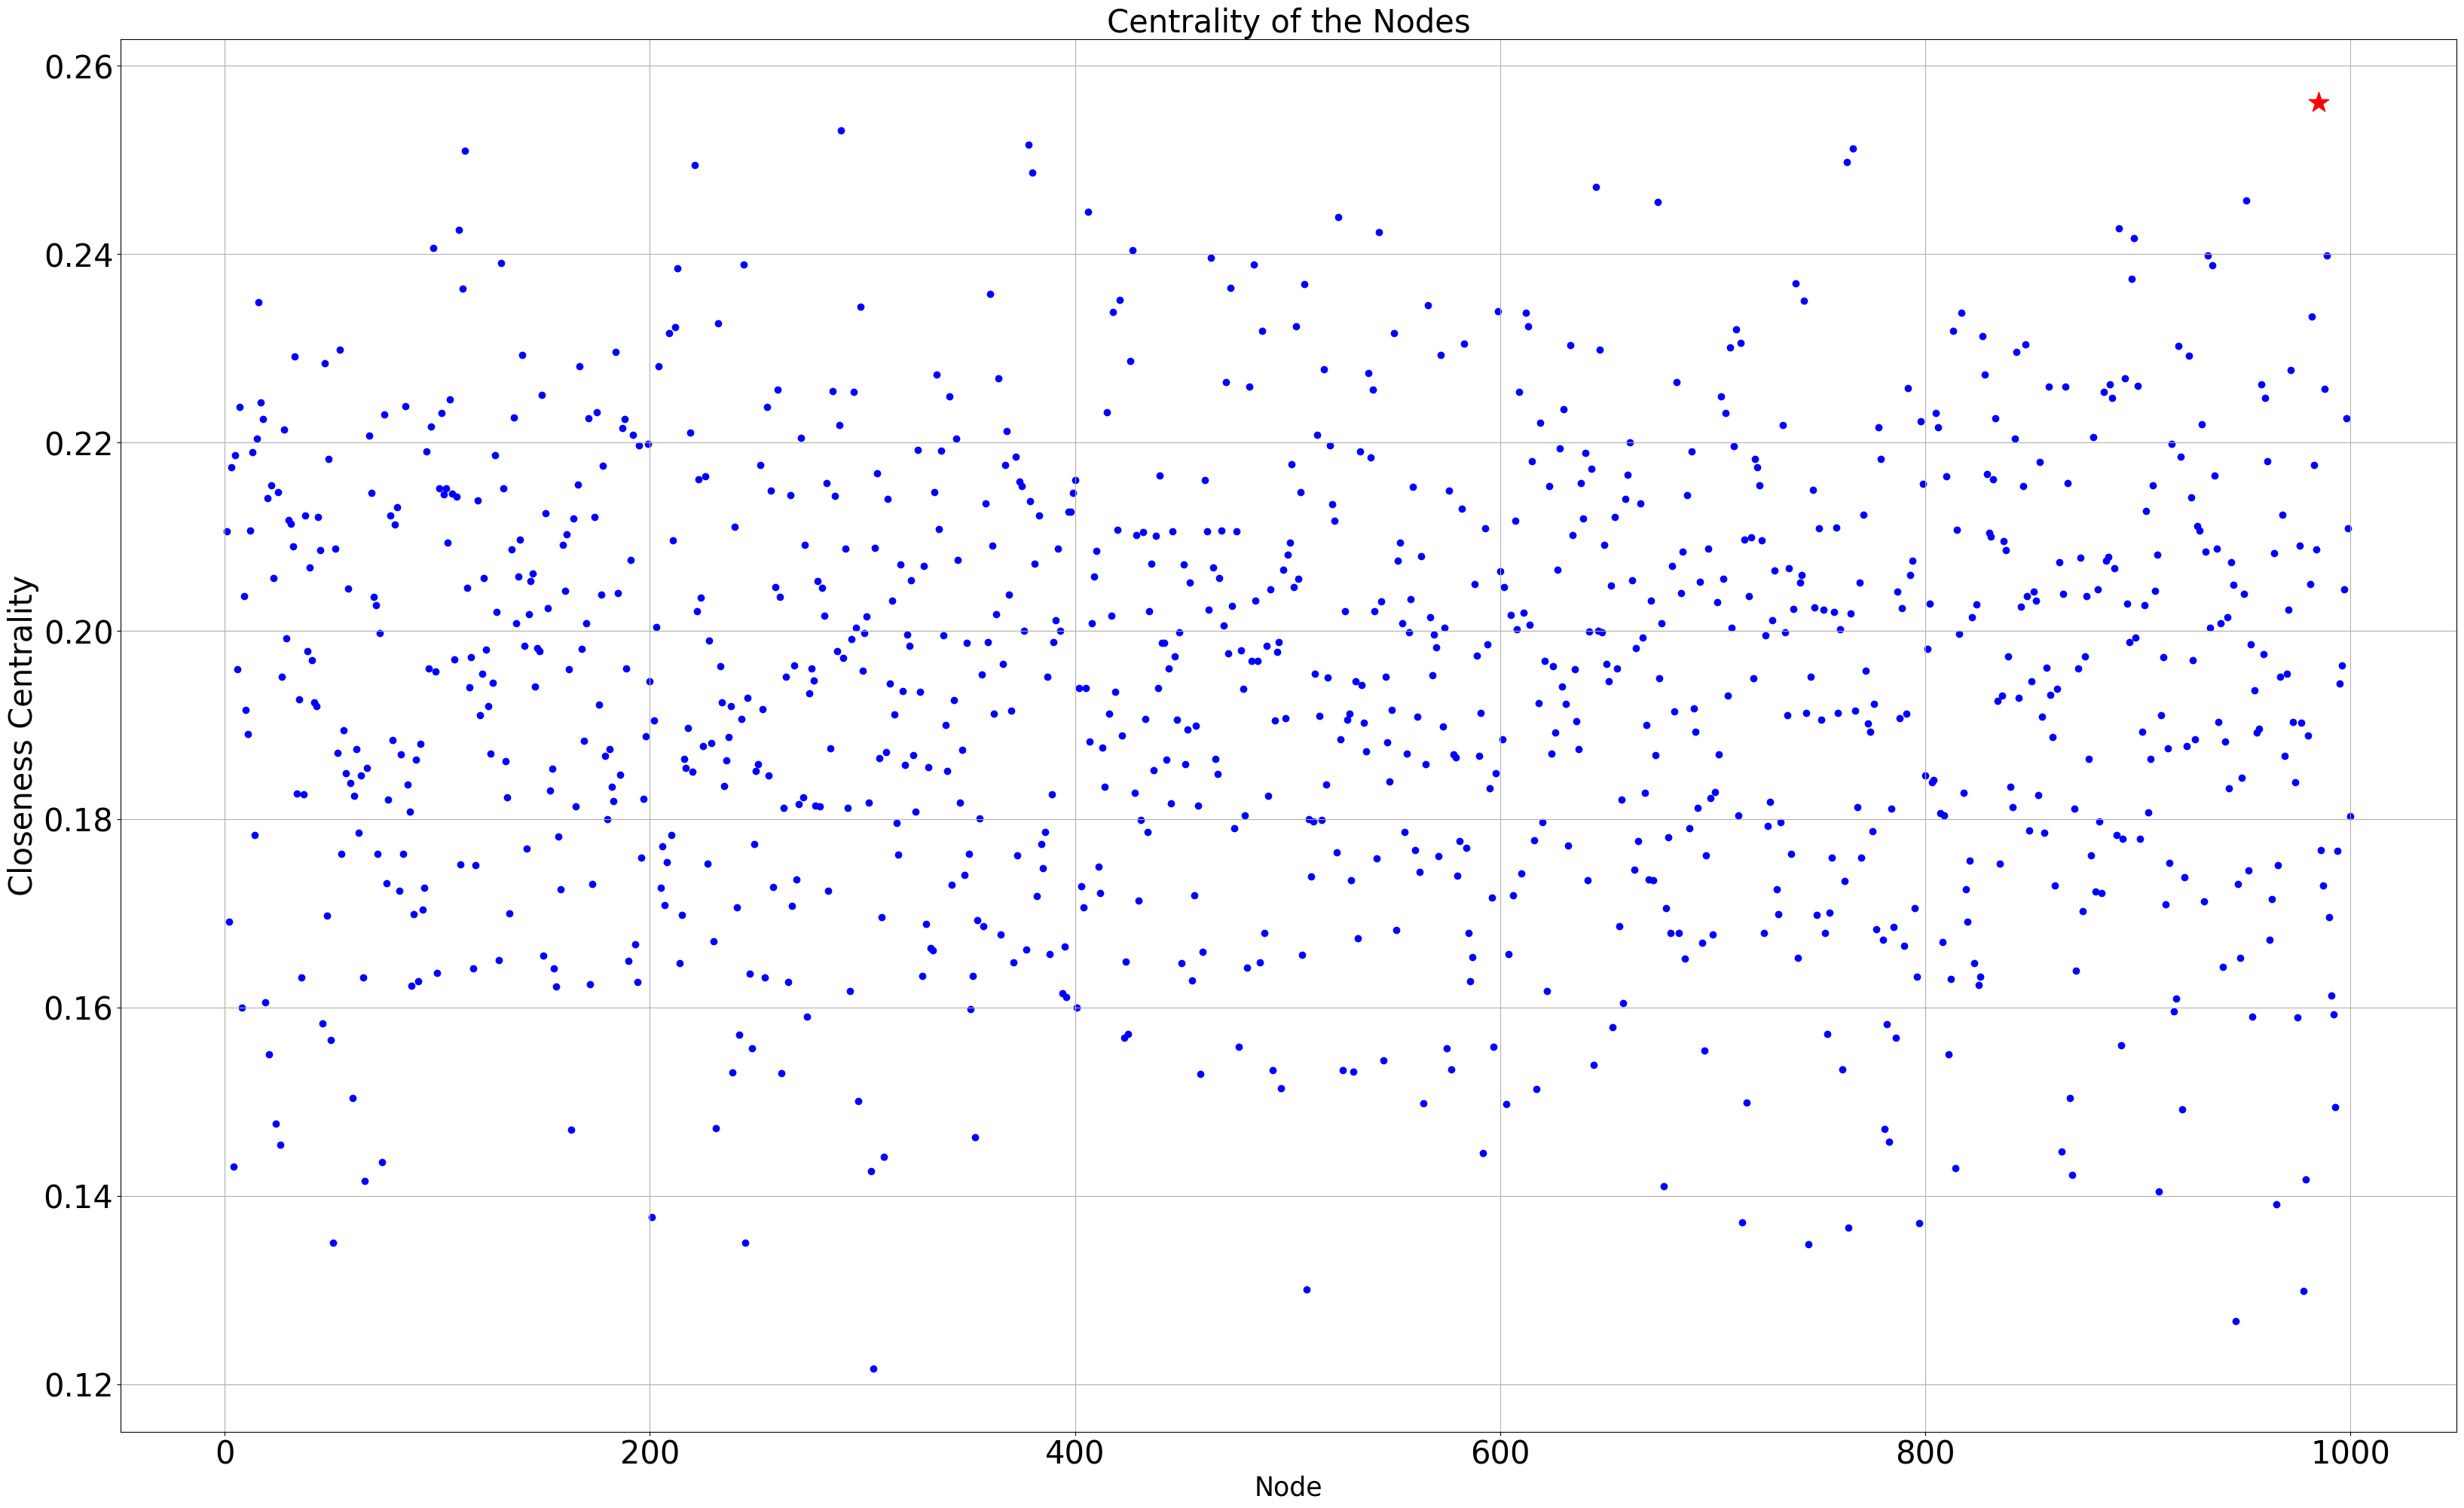

   Node ID  Closeness Centrality
0      985              0.256141
1      290              0.253138
2      378              0.251601
3      766              0.251203
4      113              0.251004
5      763              0.249820
6      221              0.249444
7      380              0.248638
8      645              0.247187
9      951              0.245721


In [31]:
# Calculate closeness centrality for each node from 1 to 1000
c2 = {}
for node in range(1, 1001):
    c2[node] = nx.closeness_centrality(G2, u=node)
centrality_value(c2,4)
visualize_centrality(c2,4)
top10_centrality(c2,4)


Betweeness Centrality for G2

      Node ID  Betweenness Centrality
0           1                0.000007
1           2                0.000651
2           3                0.000968
3           4                0.000000
4           5                0.000000
...       ...                     ...
1995     1996                0.000000
1996     1997                0.000000
1997     1998                0.000000
1998     1999                0.000000
1999     2000                0.000000

[2000 rows x 2 columns]
Node: 0 Betweenness Centrality : Node not found
Node: 1 Betweenness Centrality : 7.0105122631385765e-06
Node: 2 Betweenness Centrality : 0.0006505234026770124
Node: 3 Betweenness Centrality : 0.000967951443189062
Node: 4 Betweenness Centrality : 0.0
Node: 5 Betweenness Centrality : 0.0
Node: 6 Betweenness Centrality : 0.004774614231693836
Node: 7 Betweenness Centrality : 2.003003503753879e-06
Node: 8 Betweenness Centrality : 0.0
Node: 9 Betweenness Centrality : 0.0009674506923131236
Node: 10 Betweenness Centrality

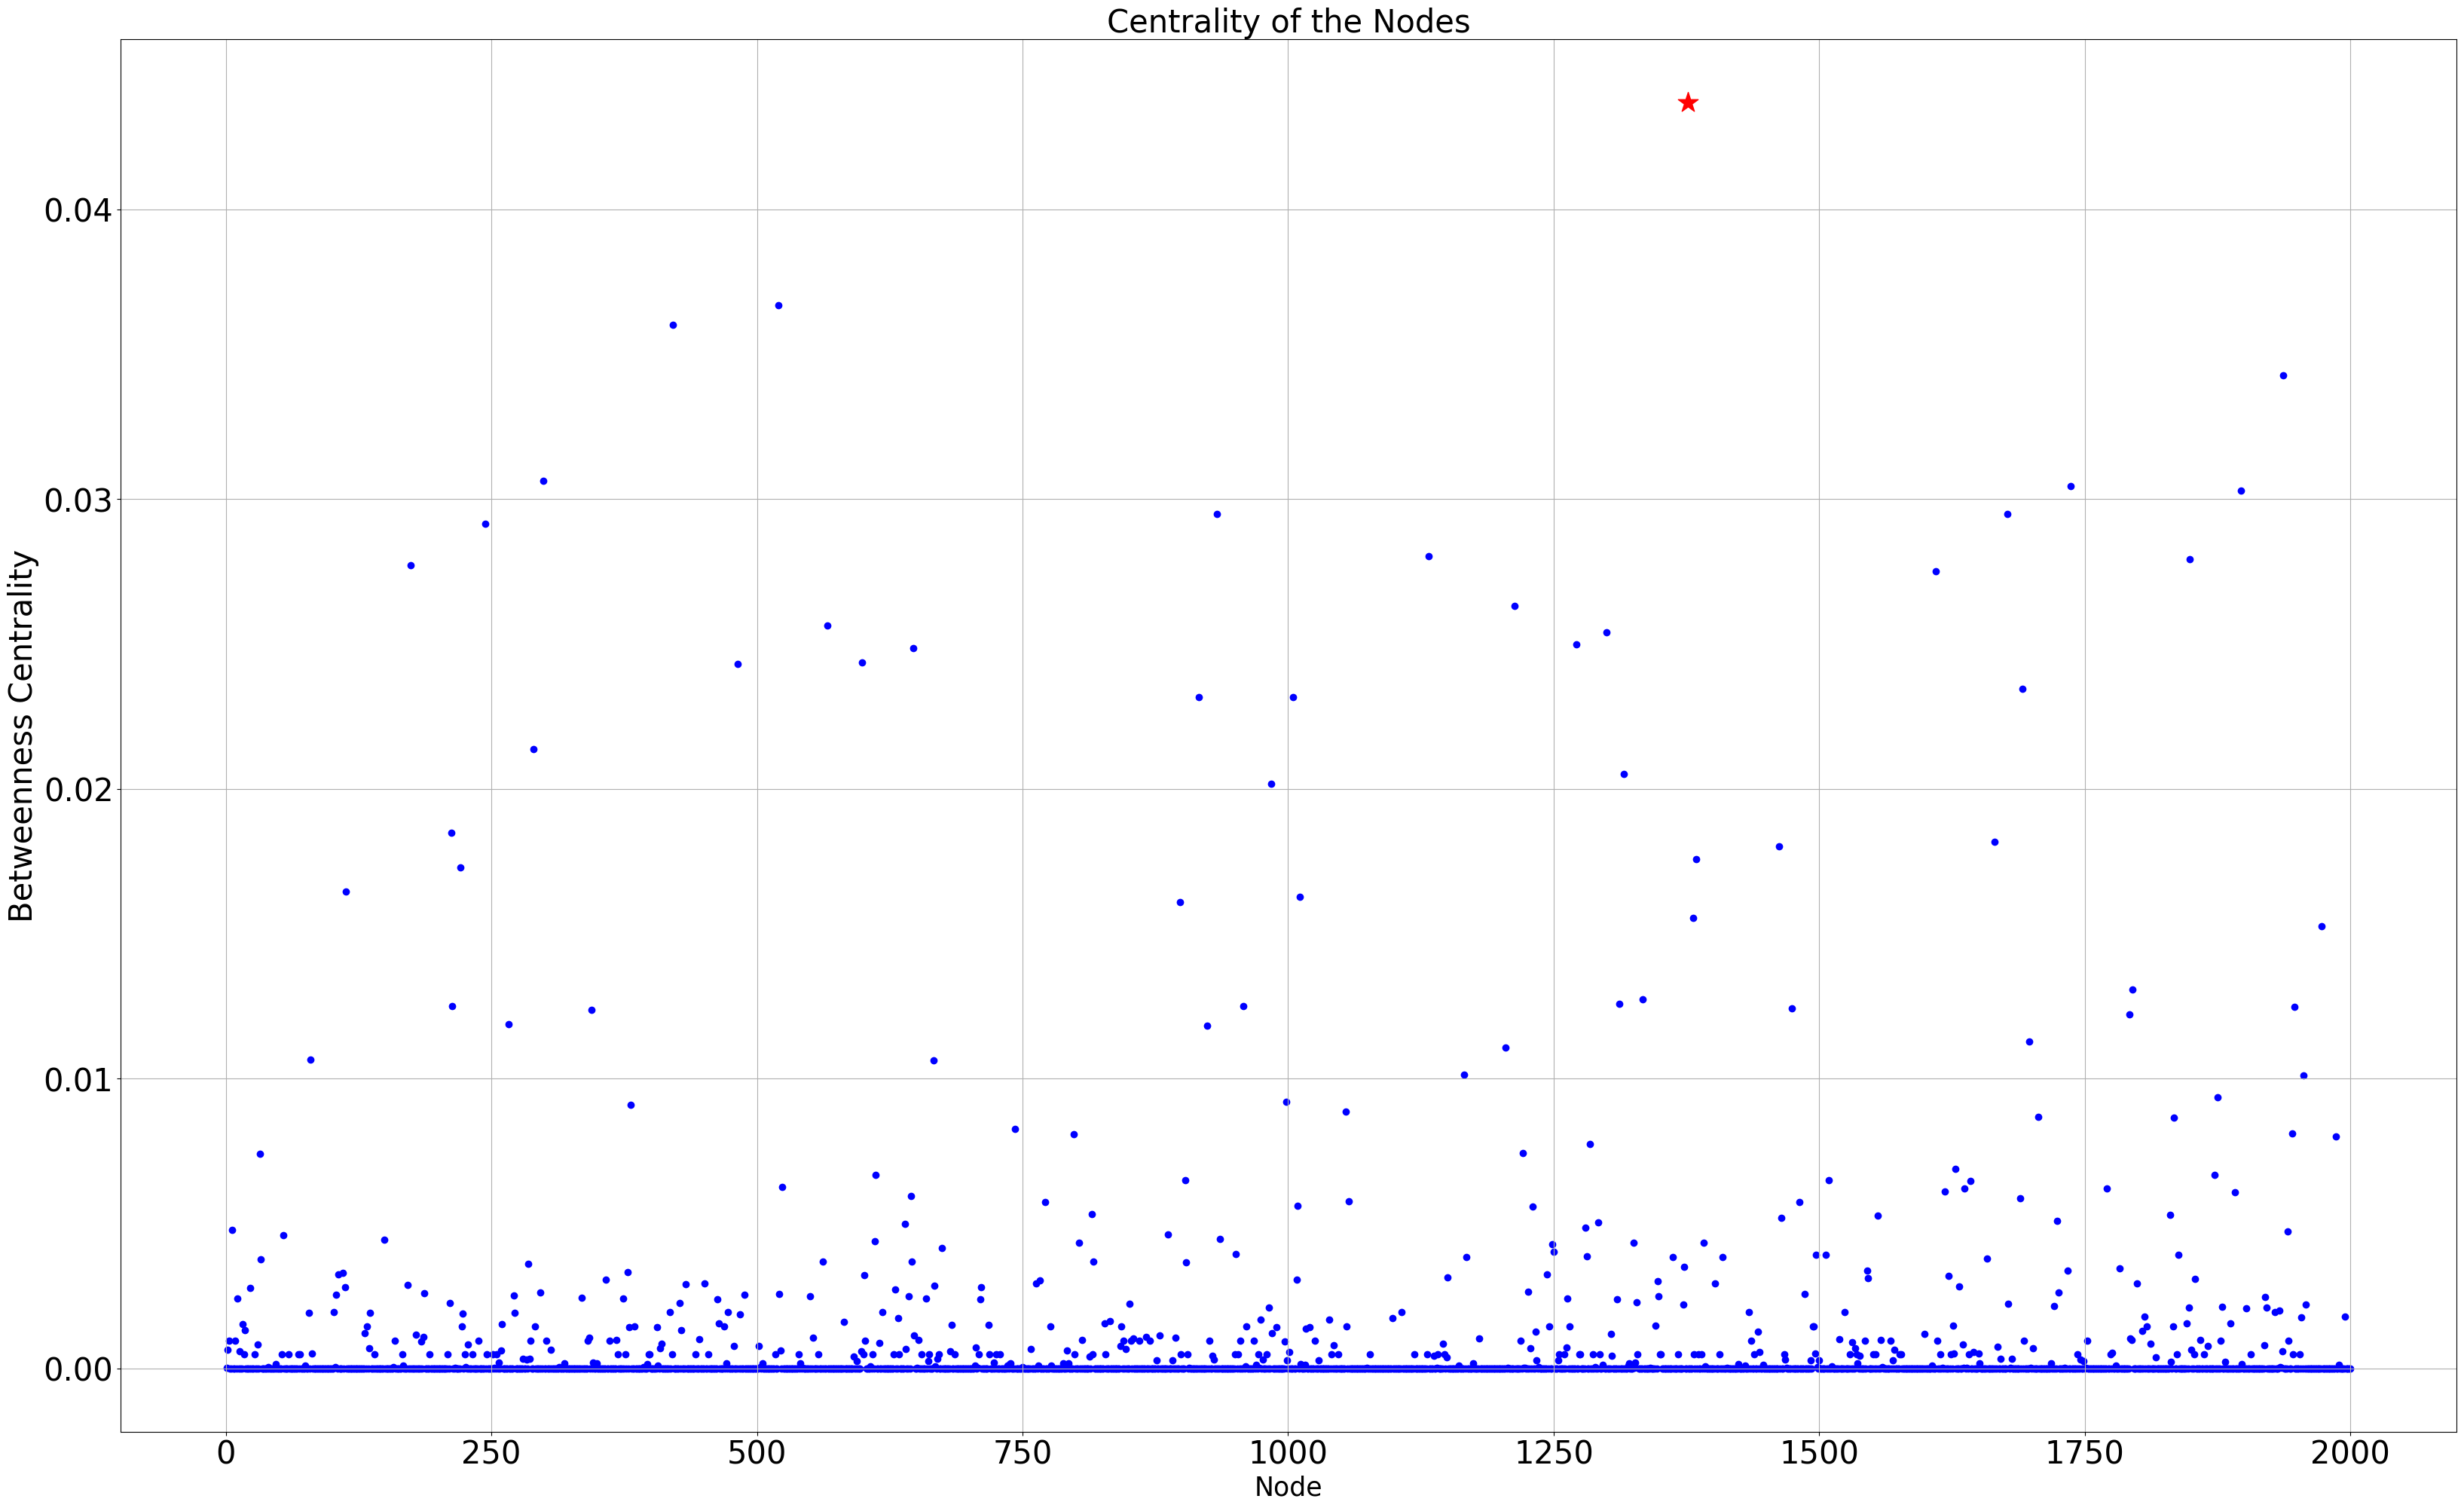

   Node ID  Betweenness Centrality
0     1376                0.043698
1      520                0.036700
2      421                0.036016
3     1937                0.034275
4      299                0.030623
5     1737                0.030460
6     1897                0.030306
7      933                0.029500
8     1677                0.029497
9      244                0.029142


In [32]:
# Extracting nodes from 1 to 2000 and creating a subgraph G_sub
subgraph_nodes = [node for node in G2.nodes() if 1 <= node <= 2000]
G_sub = G2.subgraph(subgraph_nodes)
# Attempting to calculate the betweenness centrality for the subgraph G_sub
try:
    b1 = nx.betweenness_centrality(G_sub)
except nx.PowerIterationFailedConvergence as e:
    print("Power iteration failed to converge:", e)

node_to_check = 5
centrality_value(b1, node_to_check)
visualize_centrality(b1, node_to_check)
top10_centrality(b1, node_to_check)

Clustering coefficient G2

      Node ID  Local Clustering Coefficient
0           0                      0.000000
1           1                      0.022222
2           2                      0.190476
3           3                      0.241830
4           4                      0.000000
...       ...                           ...
7619     7619                      0.000000
7620     7620                      1.000000
7621     7621                      0.208791
7622     7622                      1.000000
7623     7623                      0.581818

[7624 rows x 2 columns]
Node: 0 Local Clustering Coefficient : 0
Node: 1 Local Clustering Coefficient : 0.022222222222222223
Node: 2 Local Clustering Coefficient : 0.19047619047619047
Node: 3 Local Clustering Coefficient : 0.24183006535947713
Node: 4 Local Clustering Coefficient : 0
Node: 5 Local Clustering Coefficient : 0
Node: 6 Local Clustering Coefficient : 0.18947368421052632
Node: 7 Local Clustering Coefficient : 0.03571428571428571
Node: 8 Local Clustering Coe

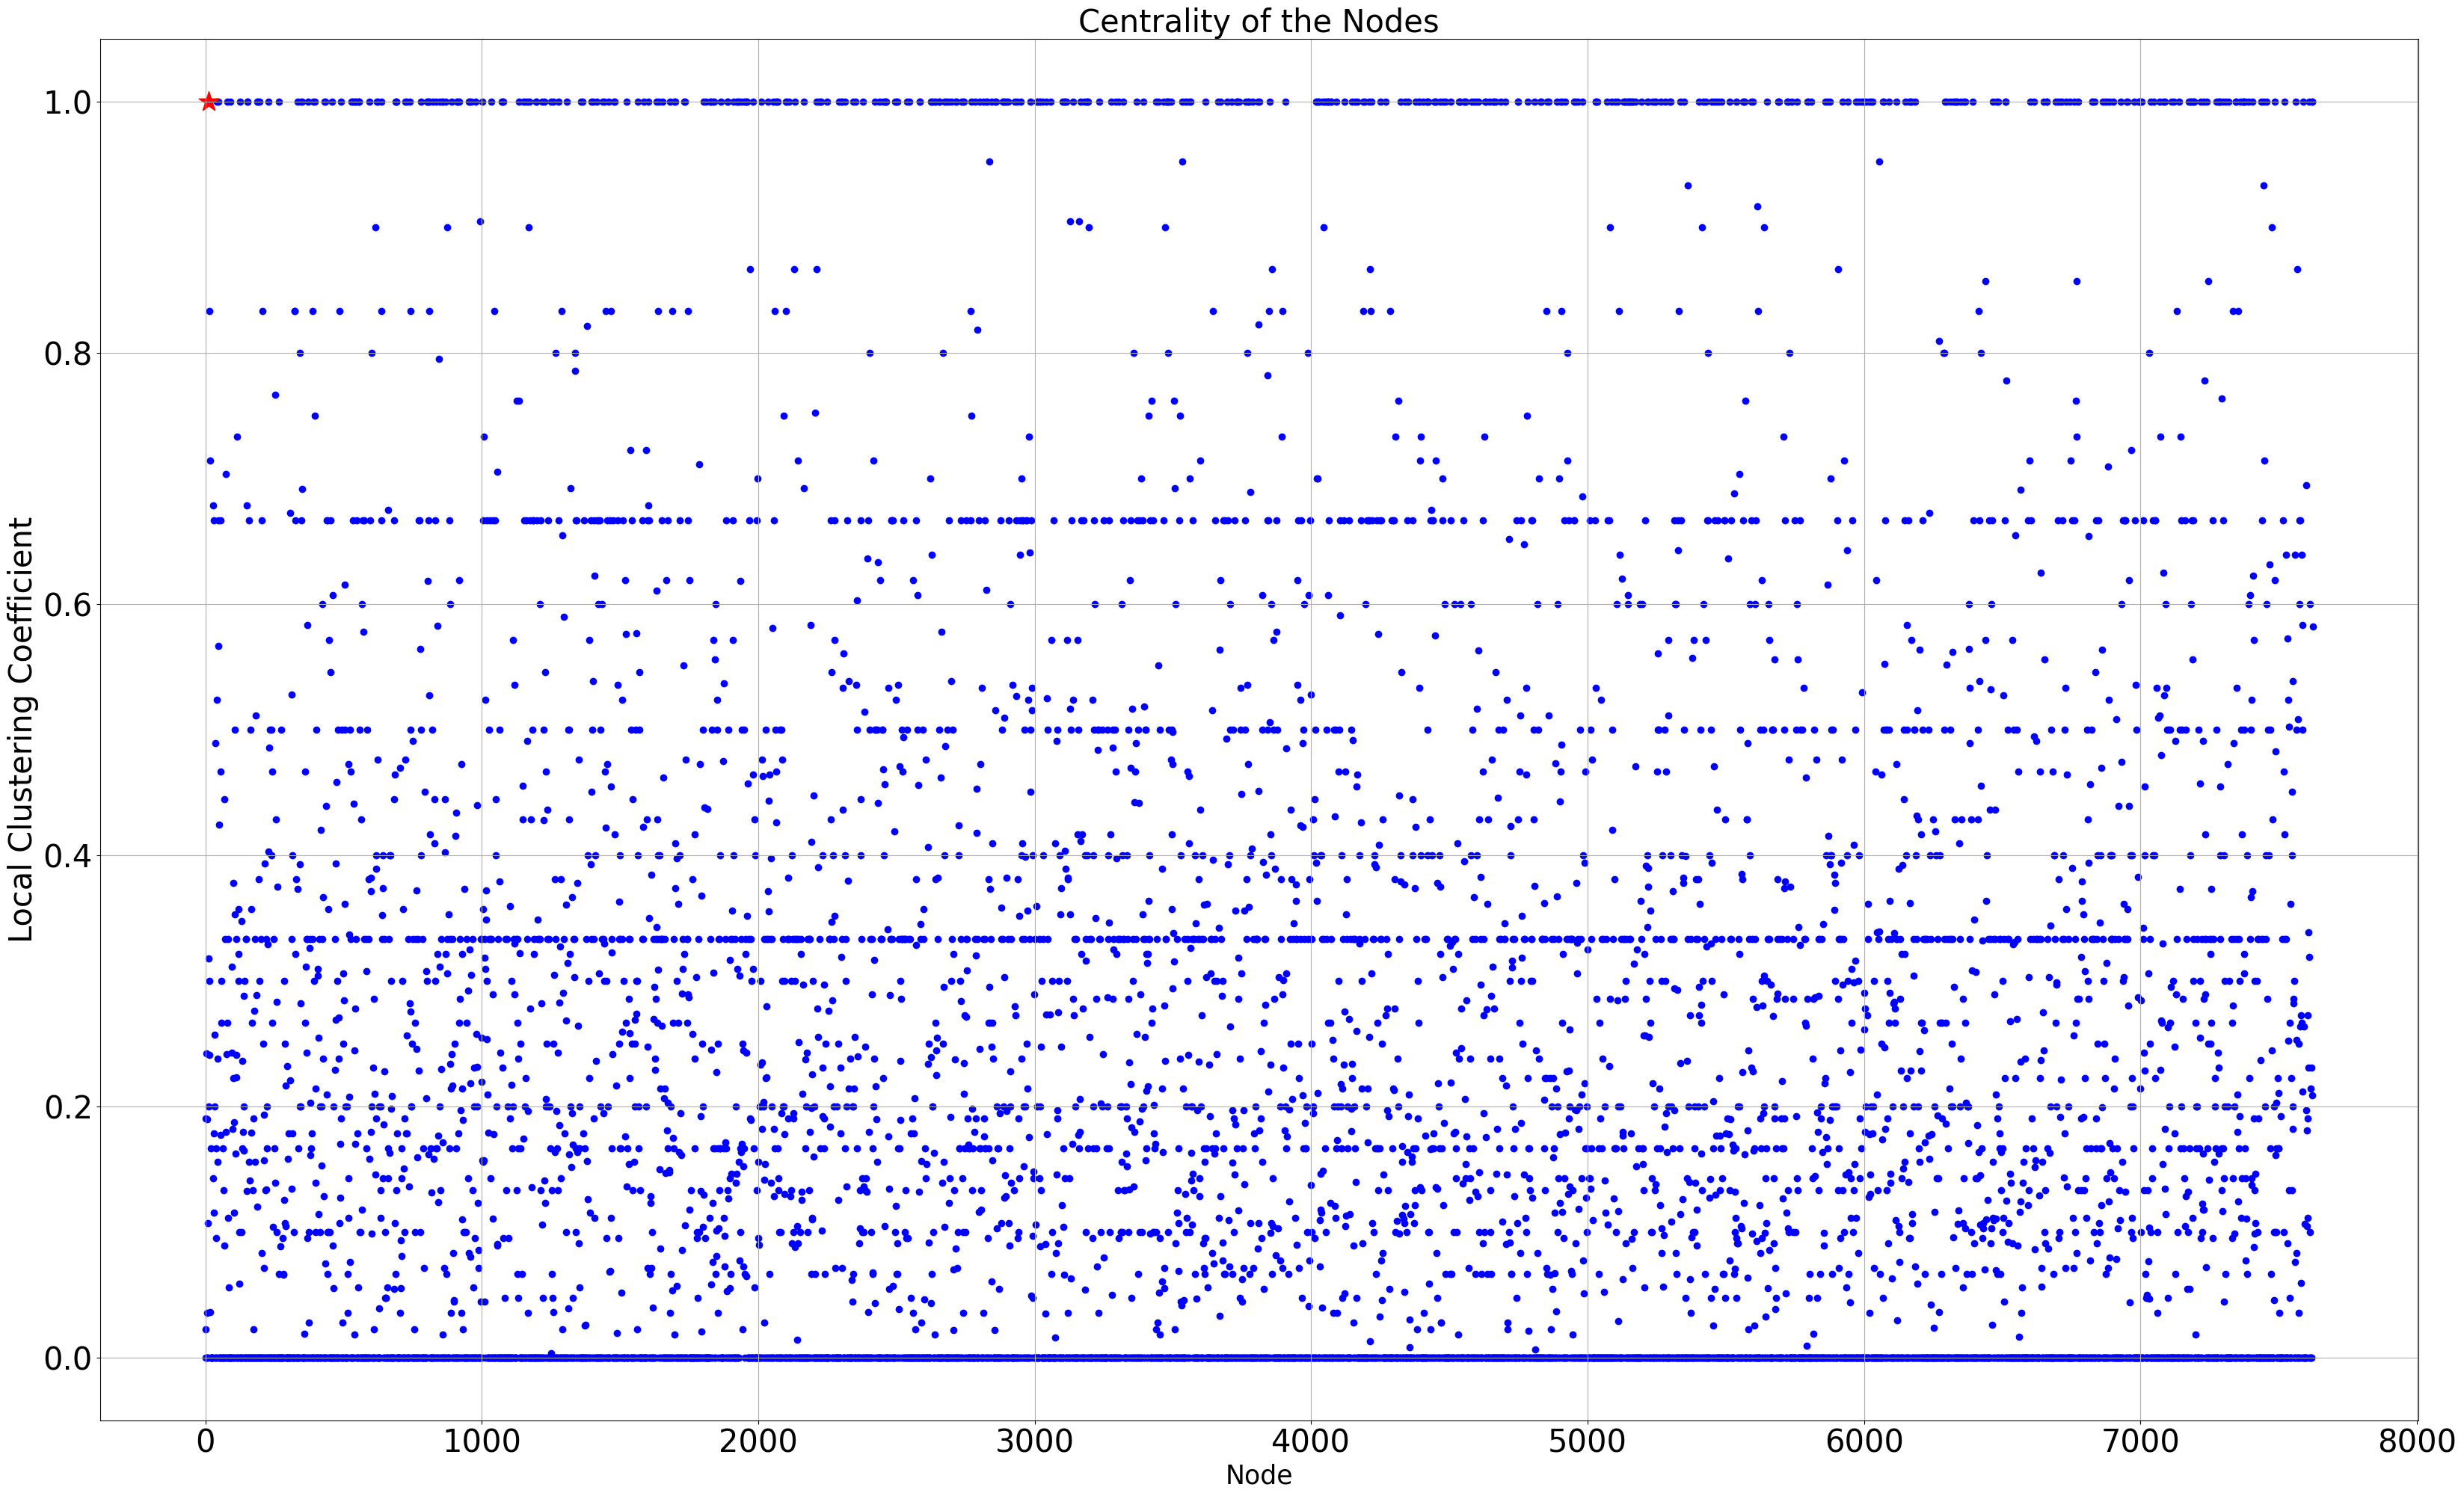

   Node ID  Local Clustering Coefficient
0       12                           1.0
1     2625                           1.0
2     3740                           1.0
3     2301                           1.0
4     3562                           1.0
5       42                           1.0
6       46                           1.0
7     5195                           1.0
8     5474                           1.0
9     3008                           1.0


In [33]:
l2 = nx.clustering(G2)
centrality_value(l2,6)
visualize_centrality(l2,6)
top10_centrality(l2,6)

Global & Average coefficient G2

In [34]:
g2= nx.average_clustering(G2)
print("\nGlobal Clustering Coefficient of G2:")
print(g2)
a2 = sum(l2.values()) / len(l2)
print("\n Average Clustering Coefficient of G2")
print(a2)


Global Clustering Coefficient of G2:
0.2194184243270858

 Average Clustering Coefficient of G2
0.2194184243270858


Reciprocity of G2

In [35]:
reciprocity2 = nx.reciprocity(G2)
print("\nReciprocity of G2:")
print(reciprocity2)


Reciprocity of G2:
0.0


Transitivity of G2

In [36]:
transitivity2 = nx.transitivity(G2)
print("\nTransitivity of G2:")
print(transitivity2)


Transitivity of G2:
0.178622548153384


      Node ID  Katz Centrality
0         0.0     1.714539e-02
1         1.0     2.989644e-02
2         2.0     9.568658e-03
3         3.0     1.145893e-02
4         4.0     9.299680e-02
...       ...              ...
1008   1007.0     0.000000e+00
1009   1008.0     0.000000e+00
1010      NaN     9.773910e-07
1011      NaN     9.773910e-07
1012   1009.0     0.000000e+00

[1013 rows x 2 columns]
Node: 0 Katz Centrality : 0.017145392774343876
Node: 1 Katz Centrality : 0.029896435650531895
Node: 2 Katz Centrality : 0.009568657807594718
Node: 3 Katz Centrality : 0.011458931985315677
Node: 4 Katz Centrality : 0.09299679806711157
Node: 5 Katz Centrality : 0.011507801534894812
Node: 6 Katz Centrality : 0.015900196651067504
Node: 7 Katz Centrality : 0.04675643025533362
Node: 8 Katz Centrality : 0.01893988263488973
Node: 9 Katz Centrality : 0.14043349245258674
Node: 10 Katz Centrality : 0.03621233623813935
Node: 11 Katz Centrality : 0.08268141354194766
Node: 12 Katz Centrality : 0.00289112255310

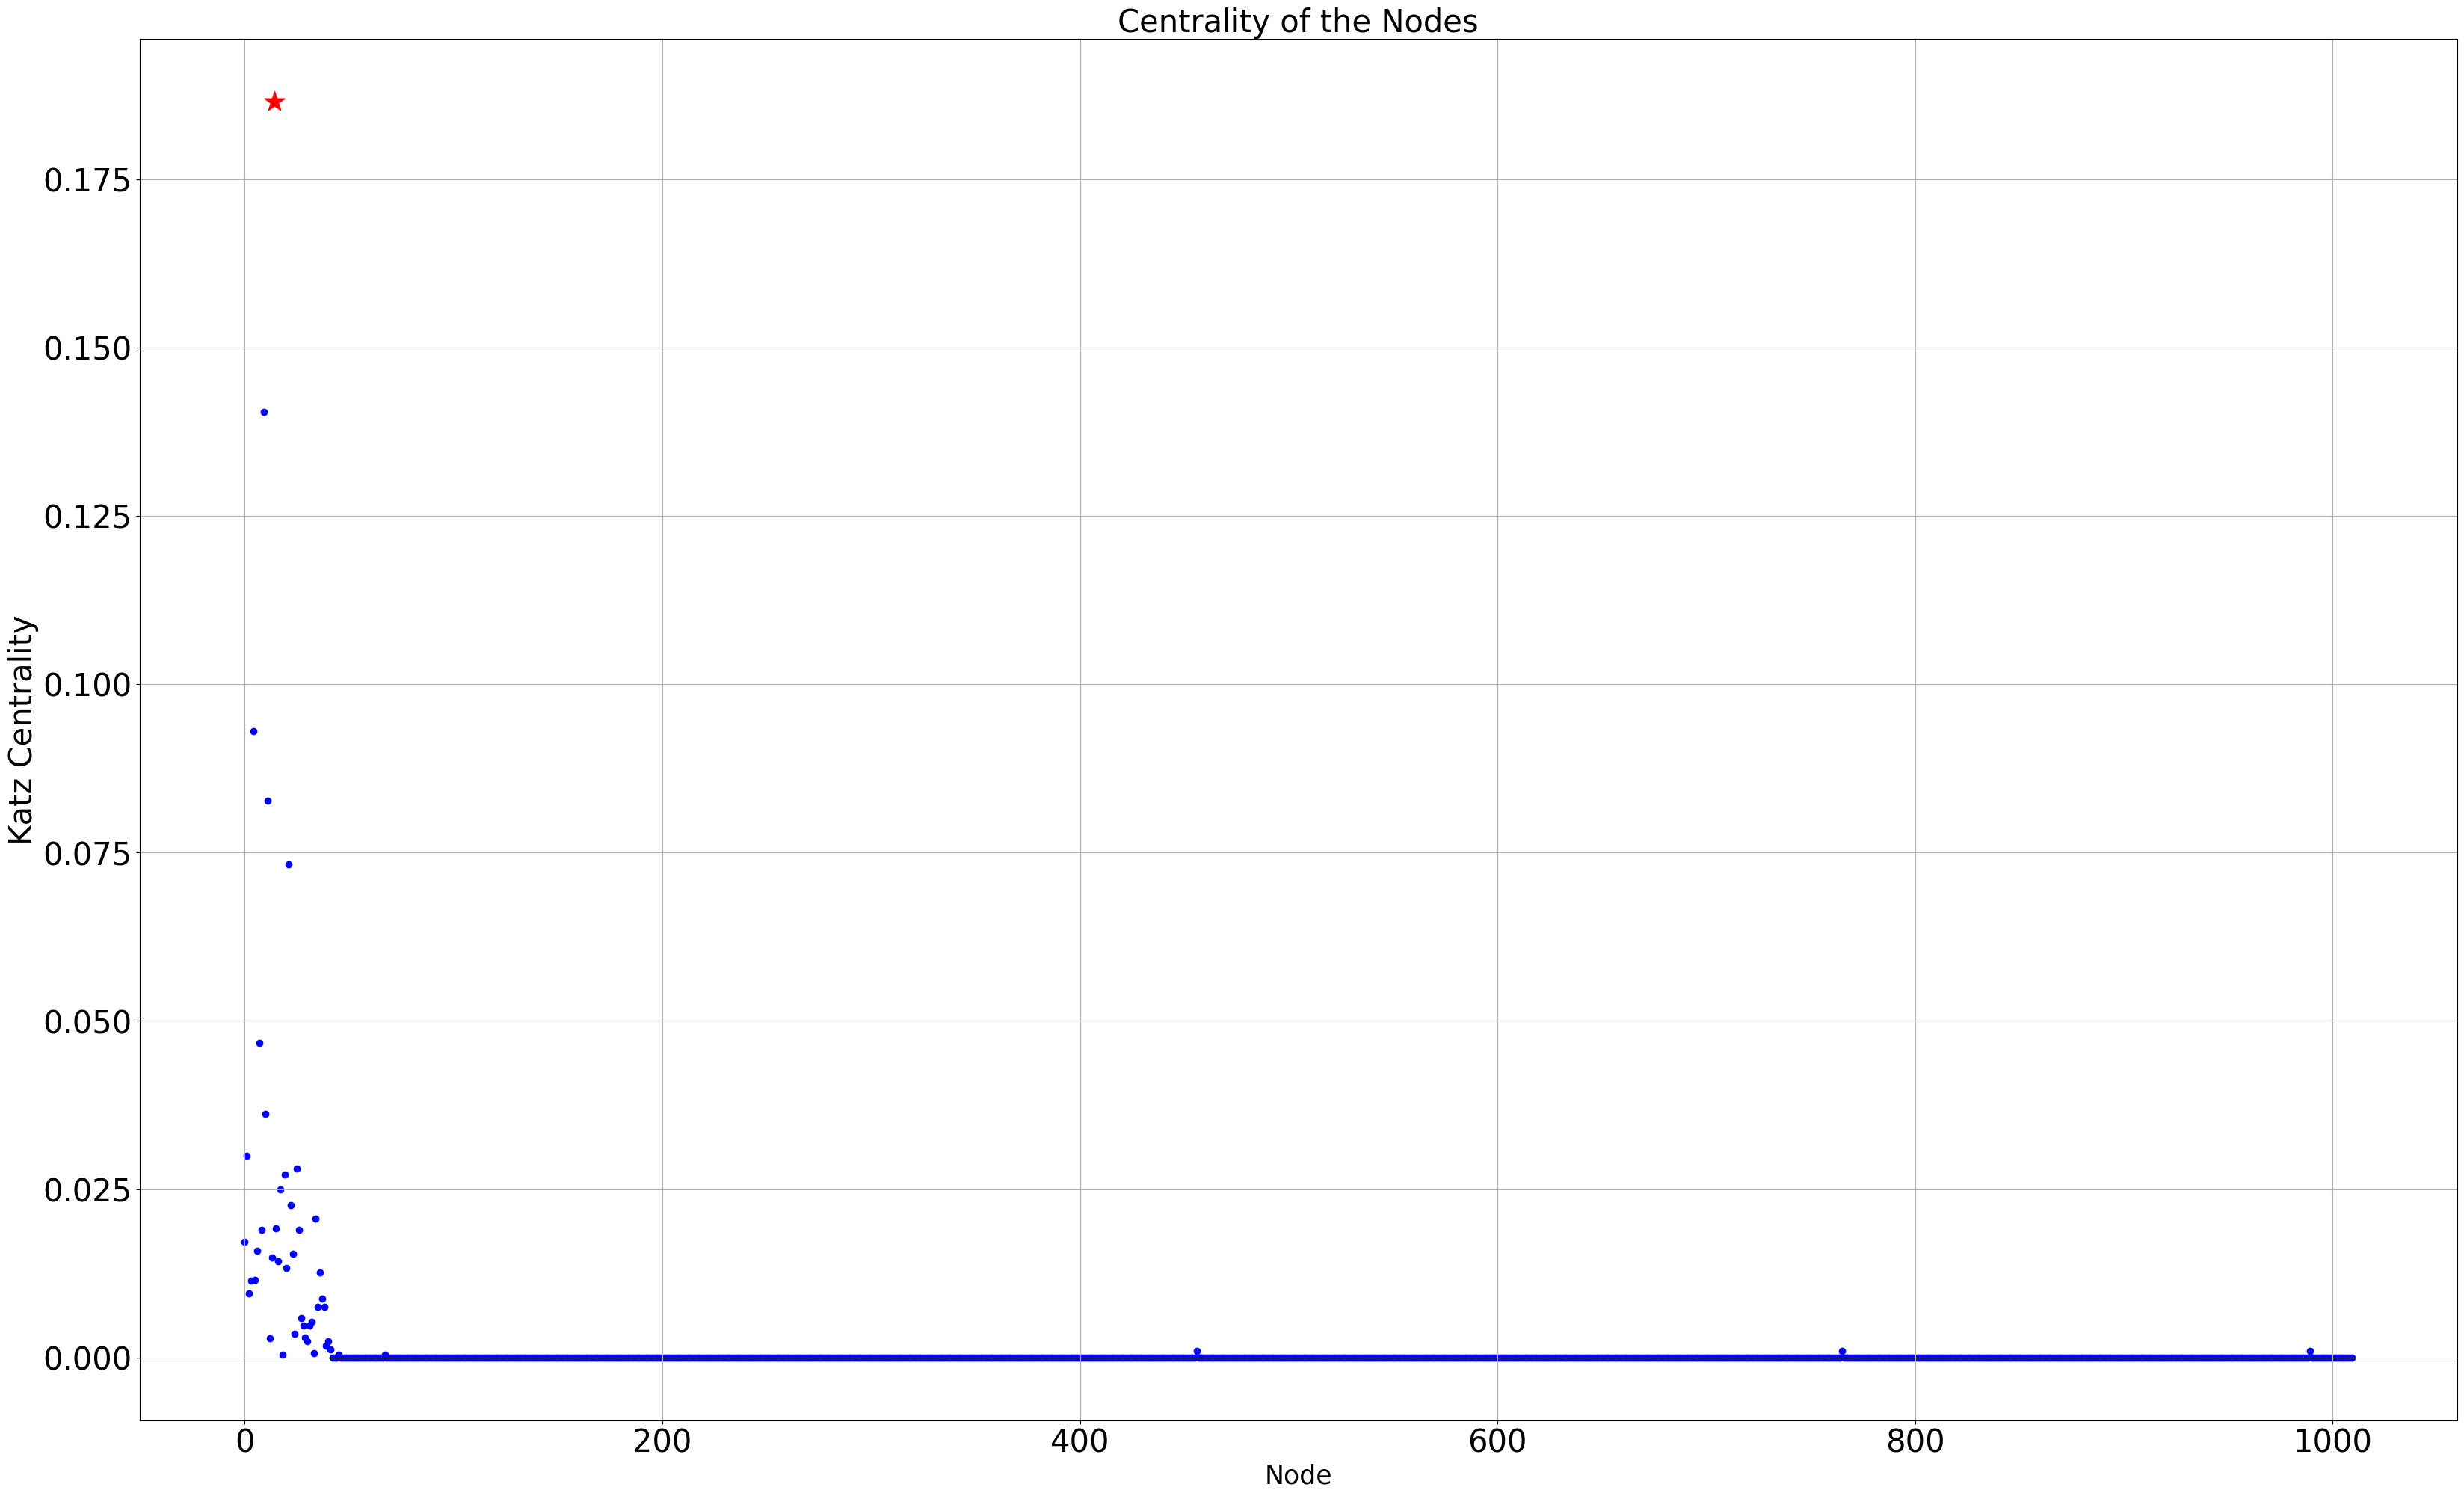

   Node ID  Katz Centrality
0     14.0         0.186559
1      9.0         0.140433
2      4.0         0.092997
3     11.0         0.082681
4     21.0         0.073236
5      7.0         0.046756
6     10.0         0.036212
7      1.0         0.029896
8     25.0         0.028088
9     19.0         0.027211


<Figure size 640x480 with 0 Axes>

In [37]:
# Suppose you want to copy 100 edges from G1 to G2
G = nx.Graph()
edges_to_copy = list(G1.edges())[:10000]  # Extract the first 100 edges from G1

# Add the selected edges to the second graph (G2)
G.add_edges_from(edges_to_copy)
try:
    centrality = nx.betweenness_centrality(G)
except nx.PowerIterationFailedConvergence as e:
    print("Power iteration failed to converge:", e)
k1=centrality
centrality_value(k1,3)
visualize_centrality(k1,3)
top10_centrality(k1,3)

df1.to_csv('Biodata.csv', index=False)
# Saving the figure.
plt.savefig("output.jpg")